In [ ]:
import sklearn
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from PIL import Image
from scipy.stats import gmean
from google.colab import files
import glob

In [ ]:
number_labels = np.zeros((12,8,8))
number_labels[0] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 1, 1, 1, 1, 0, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 0, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]]) # characters 0-9
number_labels[1] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[2] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 1, 1, 1, 0, 0, 0],[0, 1, 0, 0, 0, 1, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[3] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[4] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 1, 0, 1, 0, 0, 0],[0, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[5] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 0, 0],[0, 1, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 1, 1, 1, 1, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[6] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 0, 1, 1, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 0, 0],[0, 1, 0, 0, 0, 1, 0, 0],[0, 1, 1, 1, 1, 1, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[7] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 1, 0, 0],[0, 0, 0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 0, 1, 0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[8] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 1, 1, 1, 1, 1, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 1, 1, 1, 1, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 0, 0, 0, 0, 1, 0],[0, 1, 1, 1, 1, 1, 1, 0]])
number_labels[9] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 1, 1, 0],[0, 0, 0, 1, 0, 0, 1, 0],[0, 0, 0, 1, 0, 0, 1, 0],[0, 0, 0, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 1, 0],[0, 0, 0, 1, 1, 1, 1, 0],[0, 0, 0, 0, 0, 0, 0, 0]])
number_labels[10] = np.array([[0, 0, 0, 0, 0, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 1, 1, 0, 0, 0, 0],[0, 1, 1, 0, 0, 0, 0, 0],[1, 1, 1, 1, 1, 1, 1, 1],[0, 1, 1, 0, 0, 0, 0, 0],[0, 0, 1, 1, 0, 0, 0, 0],[0, 0, 0, 1, 1, 0, 0, 0]]) #left pointing arrow
number_labels[11] = np.transpose(number_labels[10]) #Upward pointing arrow

n = 4
font_size = 8*n
number_labels_scaled = np.zeros((12,font_size,font_size))
for i in range(len(number_labels)):
    number_labels_scaled[i] = np.kron(number_labels[i], np.ones((n,n)))

In [ ]:
def get_tile_x(image_number): #Gets the horizontal position of the tile (0 on the left)
    return np.mod(image_number,horizontal_number)

In [ ]:
def get_tile_y(image_number): #Gets the vertical position of the tile (0 at the top)
    return np.floor_divide(image_number,horizontal_number)

In [ ]:
def get_tile_point(image_number): #Gets the horizontal and vertical positions of the tile as a tuple of the form (hori, vert), 0,0 in top left
    return (np.mod(image_number,horizontal_number),np.floor_divide(image_number,horizontal_number))


In [ ]:
def get_tile_number(tile_point): #Gets the number of a tile from its point in the grid
    return(tile_point[0]+horizontal_number*tile_point[1])


In [ ]:
def check_brightness_position(image_number,point,x_size, y_size, bright): #Plots a square on the image so that it is possible to see exactly where is being searched
    image = ims_brightened[image_number]
    colours = [0, 0.8]
    #colour = colours[bright] #0 marks a dark square, 1 marks a bright square
    colour = 0.8
    x = point[0]
    y = point[1]
    image[y-y_size:y+y_size+1, x-x_size:x+x_size+1] = colour
    #brightness_array = np.array(brightness_array).flatten()
    #confidence = len(brightness_array[brightness_array>(40/256)])
    #image[y+y_size, (x-x_size):(x+x_size)] = 0.8
    #image[y-y_size, (x-x_size):(x+x_size)] = 0.8
    #image[(y-y_size):(y+y_size), x+x_size] = 0.8
    #image[(y-y_size):(y+y_size), x-x_size] = 0.8
    print("Image number: ", image_number, " Comparison location:", point, " Size: ", x_size, " x ", y_size , " rectangle drawn")
    #return np.median(brightness_array)

In [ ]:
def get_brightness(image_number,point,x_size, y_size): #Gets the mean brightness of a square extending size units out in each direction
    image = ims_brightened[image_number] #This takes the point in the form x-y, this is a mistake but is also fine
    x = point[0]
    y = point[1]
    #brightness_array = []
    #for i in range((2*y_size)+1):
    #    for j in range((2*x_size)+1):
    #        brightness_array.append(image[y-y_size+i][x-x_size+j])
    #        #print(y-size+i, x-size+j, image[y-size+i][x-size+j])

    brightness_array = image[y-y_size:y+y_size+1, x-x_size:x+x_size+1]
    brightness_array = np.array(brightness_array).flatten()
    if len(brightness_array[brightness_array>(70/256)]) != 0:
        mean_of_brights = np.mean(brightness_array[brightness_array>(70/256)])
        #confidence = np.sqrt(len(brightness_array[brightness_array>(40/256)]))
        confidence = len(brightness_array[brightness_array>(70/256)])
    else:
        mean_of_brights = 110/256
        confidence = 1

        #print("Image number: ", image_number, " Comparison location:", point, " Size: ", x_size, " x ", y_size , " Has 0 confidence")

    return mean_of_brights, confidence
    #return np.median(brightness_array)

In [ ]:
def check_get_brightness_position(image_1_point, image_2_point): #Replica of the point selection logic but instead marks the points

    tile_1_x = image_1_point[0] #Legacy from the version of this function which used image numbers
    tile_1_y = image_1_point[1]
    tile_2_x = image_2_point[0]
    tile_2_y = image_2_point[1]
    image_1_number = get_tile_number(image_1_point)
    image_2_number = get_tile_number(image_2_point)
    #tile_1_x = get_tile_x(image_1_number)
    #tile_1_y = get_tile_y(image_1_number)
    #tile_2_x = get_tile_x(image_2_number)
    #tile_2_y = get_tile_y(image_2_number)


    #Locations of the centres of the edges of any given tile
    right_edge = np.array((ims[0].shape[1]-1,ims[0].shape[0]/2))
    left_edge = np.array((0,ims[0].shape[0]/2))
    bottom_edge = np.array((ims[0].shape[1]/2,ims[0].shape[0]-1))
    top_edge = np.array((ims[0].shape[1]/2,0))

    #I apologise but this is going to be sign hell


    #Unless something very strange happens the limiting dimension of left-right comparison area sizes will be the width of the overlap area, and top-bottom sizes will be limited by the height
    overlap_area_width = horizontal_overlap + np.sign(tile_1_x-tile_2_x)*(horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x])
    overlap_area_height = vertical_overlap + np.sign(tile_1_y-tile_2_y)*(vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y])
    #The above only apply when the overlap is primarily left-right and top-bottom, respectively


    #Pre computing tuning values to keep them out of the if nest for clarity
    tuning_x = horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x] + horizontal_rowwise_tuning[tile_1_y] - horizontal_rowwise_tuning[tile_2_y]
    tuning_y = vertical_columnwise_tuning[tile_1_x] - vertical_columnwise_tuning[tile_2_x] + vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y]

    #tuning x and tuning y are the "leftness" and "upness" of the primary tile relative to the secondary
    #They should be ADDED to the primary edge-secondary edge vector because greater primary leftness means the vector needs to be more rightward
    #similarly greater primary upness means the primary edge-secondary edge vector needs a greater downward component
    #This vector flip is inherited from the tile positioning logic

    #When the tiles are placed directly next to eachother with edges aligned, this is the vector from primary edge point to secondary edge point
    nudge = np.array([(tile_2_x-tile_1_x), (tile_2_y-tile_1_y)])

    #Goal is to find the vector from the relevant edge of the primary tile to the relevant edge of the secondary tile
    #Find the midpoint of that vector
    #Find that point in both image coordinate systems

    if abs(tile_1_x-tile_2_x) == 1 and tile_1_y-tile_2_y == 0: #if tiles are left-right adjacent

        relative_y = tuning_y #the y component of the primary edge-secondary edge vector in stitched space
        relative_x = (np.sign(tile_1_x-tile_2_x)*overlap_area_width) + nudge[0] #the x component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        x_size_limit = int(np.floor((overlap_area_width-1)/2)) #if odd this needs to just be the floor of the half, but if even it needs to be 1 less than the floor of the half, this achieves that
        y_size_limit = int(np.floor(((ims[0].shape[0] - abs(tuning_y))-1)/2))
        if tile_1_x > tile_2_x: #tile 1 is on the right of tile 2

            tile_1_point = left_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = right_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_x < tile_2_x: #tile 1 is on the left of tile 2

            tile_1_point = right_edge + np.floor(edge_edge_vector/2)
            tile_2_point = left_edge - np.ceil(edge_edge_vector/2)

    elif abs(tile_1_y-tile_2_y) == 1 and tile_1_x-tile_2_x == 0: #if tiles are top-bottom adjacent

        relative_x = tuning_x #the x component of the primary edge-secondary edge vector in stitched space
        relative_y = (np.sign(tile_1_y-tile_2_y)*overlap_area_height) + nudge[1] #the y component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        y_size_limit = int(np.floor((overlap_area_height-1)/2))
        x_size_limit = int(np.floor(((ims[0].shape[1] - abs(tuning_x))-1)/2))
        if tile_1_y > tile_2_y: #tile 1 is below tile 2

            tile_1_point = top_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = bottom_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_y < tile_2_y: #tile 1 is above tile 2

            tile_1_point = bottom_edge + np.floor(edge_edge_vector/2)
            tile_2_point = top_edge - np.ceil(edge_edge_vector/2)

    else:
        print("WARNING: images ", image_1_number, " and ", image_2_number, " sent to get_brightness_factor do not share an edge")
        return 1

    #look_here = np.array((1,1)) - abs(nudge)
    #for i in range(5):
    #    tile_1_point_final = tile_1_point + (size_limit*2*look_here*(3-i))
    #    tile_2_point_final = tile_2_point + (size_limit*2*look_here*(3-i))
    #    tile_1_point_final = tuple(map(int, tile_1_point_final)) #Convert the tuples of floats made above into tuples of integers
    #    tile_2_point_final = tuple(map(int, tile_2_point_final))
    #    check_brightness_position(image_1_number, tile_1_point_final, size_limit, 1)
    #    check_brightness_position(image_2_number, tile_2_point_final, size_limit, 0)


    tile_1_point = tuple(map(int, tile_1_point)) #Convert the tuples of floats made above into tuples of integers
    tile_2_point = tuple(map(int, tile_2_point))
    check_brightness_position(image_1_number, tile_1_point, x_size_limit, y_size_limit, 1)
    check_brightness_position(image_2_number, tile_2_point, x_size_limit, y_size_limit, 0)


In [ ]:
def get_brightness_factor(image_1_point, image_2_point): #Gets the factor by which image 2's brightnesses must be scaled to match image 1

    tile_1_x = image_1_point[0] #Legacy from the version of this function which used image numbers
    tile_1_y = image_1_point[1]
    tile_2_x = image_2_point[0]
    tile_2_y = image_2_point[1]
    image_1_number = get_tile_number(image_1_point)
    image_2_number = get_tile_number(image_2_point)
    #tile_1_x = get_tile_x(image_1_number)
    #tile_1_y = get_tile_y(image_1_number)
    #tile_2_x = get_tile_x(image_2_number)
    #tile_2_y = get_tile_y(image_2_number)


    #Locations of the centres of the edges of any given tile
    right_edge = np.array((ims[0].shape[1]-1,ims[0].shape[0]/2))
    left_edge = np.array((0,ims[0].shape[0]/2))
    bottom_edge = np.array((ims[0].shape[1]/2,ims[0].shape[0]-1))
    top_edge = np.array((ims[0].shape[1]/2,0))

    #I apologise but this is going to be sign hell


    #Unless something very strange happens the limiting dimension of left-right comparison area sizes will be the width of the overlap area, and top-bottom sizes will be limited by the height
    overlap_area_width = horizontal_overlap + np.sign(tile_1_x-tile_2_x)*(horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x])
    overlap_area_height = vertical_overlap + np.sign(tile_1_y-tile_2_y)*(vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y])
    #The above only apply when the overlap is primarily left-right and top-bottom, respectively


    #Pre computing tuning values to keep them out of the if nest for clarity
    tuning_x = horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x] + horizontal_rowwise_tuning[tile_1_y] - horizontal_rowwise_tuning[tile_2_y]
    tuning_y = vertical_columnwise_tuning[tile_1_x] - vertical_columnwise_tuning[tile_2_x] + vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y]

    #tuning x and tuning y are the "leftness" and "upness" of the primary tile relative to the secondary
    #They should be ADDED to the primary edge-secondary edge vector because greater primary leftness means the vector needs to be more rightward
    #similarly greater primary upness means the primary edge-secondary edge vector needs a greater downward component
    #This vector flip is inherited from the tile positioning logic

    #When the tiles are placed directly next to eachother with edges aligned, this is the vector from primary edge point to secondary edge point
    nudge = np.array([(tile_2_x-tile_1_x), (tile_2_y-tile_1_y)])

    #Goal is to find the vector from the relevant edge of the primary tile to the relevant edge of the secondary tile
    #Find the midpoint of that vector
    #Find that point in both image coordinate systems

    if abs(tile_1_x-tile_2_x) == 1 and tile_1_y-tile_2_y == 0: #if tiles are left-right adjacent

        relative_y = tuning_y #the y component of the primary edge-secondary edge vector in stitched space
        relative_x = (np.sign(tile_1_x-tile_2_x)*overlap_area_width) + nudge[0] #the x component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        x_size_limit = int(np.floor((overlap_area_width-1)/2)) #if odd this needs to just be the floor of the half, but if even it needs to be 1 less than the floor of the half, this achieves that
        y_size_limit = int(np.floor(((ims[0].shape[0] - abs(tuning_y))-1)/2))
        if tile_1_x > tile_2_x: #tile 1 is on the right of tile 2

            tile_1_point = left_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = right_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_x < tile_2_x: #tile 1 is on the left of tile 2

            tile_1_point = right_edge + np.floor(edge_edge_vector/2)
            tile_2_point = left_edge - np.ceil(edge_edge_vector/2)

    elif abs(tile_1_y-tile_2_y) == 1 and tile_1_x-tile_2_x == 0: #if tiles are top-bottom adjacent

        relative_x = tuning_x #the x component of the primary edge-secondary edge vector in stitched space
        relative_y = (np.sign(tile_1_y-tile_2_y)*overlap_area_height) + nudge[1] #the y component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        y_size_limit = int(np.floor((overlap_area_height-1)/2))
        x_size_limit = int(np.floor(((ims[0].shape[1] - abs(tuning_x))-1)/2))
        if tile_1_y > tile_2_y: #tile 1 is below tile 2

            tile_1_point = top_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = bottom_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_y < tile_2_y: #tile 1 is above tile 2

            tile_1_point = bottom_edge + np.floor(edge_edge_vector/2)
            tile_2_point = top_edge - np.ceil(edge_edge_vector/2)

    else:
        print("WARNING: images ", image_1_number, " and ", image_2_number, " sent to get_brightness_factor do not share an edge")
        return 1

    #look_here = np.array((1,1)) - abs(nudge)
    #for i in range(5):
    #    tile_1_point_final = tile_1_point + (size_limit*2*look_here*(3-i))
    #    tile_2_point_final = tile_2_point + (size_limit*2*look_here*(3-i))
    #    tile_1_point_final = tuple(map(int, tile_1_point_final)) #Convert the tuples of floats made above into tuples of integers
    #    tile_2_point_final = tuple(map(int, tile_2_point_final))
    #    check_brightness_position(image_1_number, tile_1_point_final, size_limit, 1)
    #    check_brightness_position(image_2_number, tile_2_point_final, size_limit, 0)


    tile_1_point = tuple(map(int, tile_1_point)) #Convert the tuples of floats made above into tuples of integers
    tile_2_point = tuple(map(int, tile_2_point))
    tile_1_brightness, tile_1_confidence = get_brightness(image_1_number, tile_1_point, x_size_limit, y_size_limit)
    tile_2_brightness, tile_2_confidence = get_brightness(image_2_number, tile_2_point, x_size_limit, y_size_limit)
    if tile_1_confidence == 1 or tile_2_confidence == 1:
      print(image_1_point, image_2_point, " Factor comparison has at least 1 no confidence brightness test")
      return 1,1
    else:
      return tile_2_brightness/tile_1_brightness, (tile_1_confidence+tile_2_confidence)/2





In [ ]:
#get_brightness_factor(get_tile_point(15), get_tile_point(26))

In [ ]:
def get_brightness_offset(image_1_point, image_2_point): #Gets the factor by which image 2's brightnesses must be increased to match image 1

    tile_1_x = image_1_point[0] #Legacy from the version of this function which used image numbers
    tile_1_y = image_1_point[1]
    tile_2_x = image_2_point[0]
    tile_2_y = image_2_point[1]
    image_1_number = get_tile_number(image_1_point)
    image_2_number = get_tile_number(image_2_point)
    #tile_1_x = get_tile_x(image_1_number)
    #tile_1_y = get_tile_y(image_1_number)
    #tile_2_x = get_tile_x(image_2_number)
    #tile_2_y = get_tile_y(image_2_number)


    #Locations of the centres of the edges of any given tile
    right_edge = np.array((ims[0].shape[1]-1,ims[0].shape[0]/2))
    left_edge = np.array((0,ims[0].shape[0]/2))
    bottom_edge = np.array((ims[0].shape[1]/2,ims[0].shape[0]-1))
    top_edge = np.array((ims[0].shape[1]/2,0))

    #I apologise but this is going to be sign hell


    #Unless something very strange happens the limiting dimension of left-right comparison area sizes will be the width of the overlap area, and top-bottom sizes will be limited by the height
    overlap_area_width = horizontal_overlap + np.sign(tile_1_x-tile_2_x)*(horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x])
    overlap_area_height = vertical_overlap + np.sign(tile_1_y-tile_2_y)*(vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y])
    #The above only apply when the overlap is primarily left-right and top-bottom, respectively


    #Pre computing tuning values to keep them out of the if nest for clarity
    tuning_x = horizontal_columnwise_tuning[tile_1_x] - horizontal_columnwise_tuning[tile_2_x] + horizontal_rowwise_tuning[tile_1_y] - horizontal_rowwise_tuning[tile_2_y]
    tuning_y = vertical_columnwise_tuning[tile_1_x] - vertical_columnwise_tuning[tile_2_x] + vertical_rowwise_tuning[tile_1_y] - vertical_rowwise_tuning[tile_2_y]

    #tuning x and tuning y are the "leftness" and "upness" of the primary tile relative to the secondary
    #They should be ADDED to the primary edge-secondary edge vector because greater primary leftness means the vector needs to be more rightward
    #similarly greater primary upness means the primary edge-secondary edge vector needs a greater downward component
    #This vector flip is inherited from the tile positioning logic

    #When the tiles are placed directly next to eachother with edges aligned, this is the vector from primary edge point to secondary edge point
    nudge = np.array([(tile_2_x-tile_1_x), (tile_2_y-tile_1_y)])

    #Goal is to find the vector from the relevant edge of the primary tile to the relevant edge of the secondary tile
    #Find the midpoint of that vector
    #Find that point in both image coordinate systems

    if abs(tile_1_x-tile_2_x) == 1 and tile_1_y-tile_2_y == 0: #if tiles are left-right adjacent

        relative_y = tuning_y #the y component of the primary edge-secondary edge vector in stitched space
        relative_x = (np.sign(tile_1_x-tile_2_x)*overlap_area_width) + nudge[0] #the x component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        x_size_limit = int(np.floor((overlap_area_width-1)/2)) #if odd this needs to just be the floor of the half, but if even it needs to be 1 less than the floor of the half, this achieves that
        y_size_limit = int(np.floor(((ims[0].shape[0] - abs(tuning_y))-1)/2))
        if tile_1_x > tile_2_x: #tile 1 is on the right of tile 2

            tile_1_point = left_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = right_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_x < tile_2_x: #tile 1 is on the left of tile 2

            tile_1_point = right_edge + np.floor(edge_edge_vector/2)
            tile_2_point = left_edge - np.ceil(edge_edge_vector/2)

    elif abs(tile_1_y-tile_2_y) == 1 and tile_1_x-tile_2_x == 0: #if tiles are top-bottom adjacent

        relative_x = tuning_x #the x component of the primary edge-secondary edge vector in stitched space
        relative_y = (np.sign(tile_1_y-tile_2_y)*overlap_area_height) + nudge[1] #the y component
        edge_edge_vector = np.array((relative_x, relative_y)) #Vector from the relevant edge of the primary tile to the relevant edge of the secondary tile in stitched space
        y_size_limit = int(np.floor((overlap_area_height-1)/2))
        x_size_limit = int(np.floor(((ims[0].shape[1] - abs(tuning_x))-1)/2))
        if tile_1_y > tile_2_y: #tile 1 is below tile 2

            tile_1_point = top_edge + np.floor(edge_edge_vector/2) #in a case where this vector is odd, these must be rounded to avoid looking for fractional pixels,
            tile_2_point = bottom_edge - np.ceil(edge_edge_vector/2) #without floor and ceil the target pixels would be next to eachother instead of on top

        if tile_1_y < tile_2_y: #tile 1 is above tile 2

            tile_1_point = bottom_edge + np.floor(edge_edge_vector/2)
            tile_2_point = top_edge - np.ceil(edge_edge_vector/2)

    else:
        print("WARNING: images ", image_1_number, " and ", image_2_number, " sent to get_brightness_factor do not share an edge")
        return 1

    #look_here = np.array((1,1)) - abs(nudge)
    #for i in range(5):
    #    tile_1_point_final = tile_1_point + (size_limit*2*look_here*(3-i))
    #    tile_2_point_final = tile_2_point + (size_limit*2*look_here*(3-i))
    #    tile_1_point_final = tuple(map(int, tile_1_point_final)) #Convert the tuples of floats made above into tuples of integers
    #    tile_2_point_final = tuple(map(int, tile_2_point_final))
    #    check_brightness_position(image_1_number, tile_1_point_final, size_limit, 1)
    #    check_brightness_position(image_2_number, tile_2_point_final, size_limit, 0)


    tile_1_point = tuple(map(int, tile_1_point)) #Convert the tuples of floats made above into tuples of integers
    tile_2_point = tuple(map(int, tile_2_point))
    tile_1_brightness, tile_1_confidence = get_brightness(image_1_number, tile_1_point, x_size_limit, y_size_limit)
    tile_2_brightness, tile_2_confidence = get_brightness(image_2_number, tile_2_point, x_size_limit, y_size_limit)
    if tile_1_confidence == 1 or tile_2_confidence == 1:
      print(tile_1_point, tile_2_point, " Factor comparison has at least 1 no confidence brightness test")
      return 0,1
    else:
      return tile_2_brightness-tile_1_brightness, (tile_1_confidence+tile_2_confidence)/2


In [ ]:
def do_tile_factor(image_point, done_tracker): #Calibrates the brightness of a given tile
    working_ratios = []
    working_confidences = []
    adjustment_list = np.array([np.array([0, -1]), np.array([1, 0]), np.array([0, 1]), np.array([-1, 0])])

    for i in range(4):
        neighbour_in_question_point = image_point+adjustment_list[i] #consider a neighbour
        if neighbour_in_question_point[0] < horizontal_number and neighbour_in_question_point[0] >=0 and neighbour_in_question_point[1] <vertical_number and neighbour_in_question_point[1] >= 0:
            if done_tracker[neighbour_in_question_point[0], neighbour_in_question_point[1]] == 1: #if it has been done
                ratio, confidence = get_brightness_factor(image_point, neighbour_in_question_point) #list the factor between the tile and neighbour
                working_ratios.append(ratio)
                working_confidences.append(confidence)
                #check_get_brightness_position(neighbour_in_question_point, image_point) #debugging tool which marks where the brightness factor finder is looking
    working_ratios = np.array(working_ratios)
    working_confidences = np.array(working_confidences)
    overall_ratio = np.sum(working_ratios*working_confidences)/np.sum(working_confidences)

    #if len(working_ratios)>=1:
    #    overall_ratio = np.median(working_ratios)
    #   print(overall_ratio)
    #else:
    #    overall_ratio = 1
    #    print("BADBADBADBAD")

    #take median, this is simple but might work fairly nicely, the nuclear option would be to least squares fit, which in the case of 1 or 2 neighbours (most common) is identical, and this may help avoid outliers in 3 or 4-neighbour cases
    ims_brightened[get_tile_number(image_point)] = ims[get_tile_number(image_point)]*overall_ratio

    done_tracker[image_point[0], image_point[1]] += 1 #Mark tile as done
    brightness_tracker[image_point[0], image_point[1]] += overall_ratio #debugging tool


    return done_tracker

In [ ]:
def do_tile_offset(image_point, done_tracker): #Calibrates the brightness of a given tile
    working_offsets = []
    working_confidences = []
    adjustment_list = np.array([np.array([0, -1]), np.array([1, 0]), np.array([0, 1]), np.array([-1, 0])])

    for i in range(4):
        neighbour_in_question_point = image_point+adjustment_list[i] #consider a neighbour
        if neighbour_in_question_point[0] < horizontal_number and neighbour_in_question_point[0] >=0 and neighbour_in_question_point[1] <vertical_number and neighbour_in_question_point[1] >= 0:
            if done_tracker[neighbour_in_question_point[0], neighbour_in_question_point[1]] == 1: #if it has been done
                offset, confidence = get_brightness_offset(image_point, neighbour_in_question_point) #list the factor between the tile and neighbour
                working_offsets.append(offset)
                working_confidences.append(confidence)
                #check_get_brightness_position(neighbour_in_question_point, image_point) #debugging tool which marks where the brightness factor finder is looking
    working_offsets = np.array(working_offsets)
    working_confidences = np.array(working_confidences)
    overall_offset = np.sum(working_offsets*working_confidences)/np.sum(working_confidences)

    #if len(working_ratios)>=1:
    #    overall_ratio = np.median(working_ratios)
    #   print(overall_ratio)
    #else:
    #    overall_ratio = 1
    #    print("BADBADBADBAD")

    #take median, this is simple but might work fairly nicely, the nuclear option would be to least squares fit, which in the case of 1 or 2 neighbours (most common) is identical, and this may help avoid outliers in 3 or 4-neighbour cases
    ims_brightened[get_tile_number(image_point)] = ims[get_tile_number(image_point)]+overall_offset

    done_tracker[image_point[0],image_point[1]] += 1 #Mark tile as done
    brightness_tracker[image_point[0], image_point[1]] += overall_offset #debugging tool


    return done_tracker

In [ ]:
def find_done_neighbour_numbers(done_tracker):
    #Yes I'm iterating over the whole thing instead of being selective what of it
    neighbour_tracker = np.zeros((horizontal_number, vertical_number))
    neighbour_tracker = neighbour_tracker + shift2d(done_tracker, 1, 0, fill_value = 0)
    neighbour_tracker = neighbour_tracker + shift2d(done_tracker, -1, 0, fill_value = 0)
    neighbour_tracker = neighbour_tracker + shift2d(done_tracker, 0, 1, fill_value = 0)
    neighbour_tracker = neighbour_tracker + shift2d(done_tracker, 0, -1, fill_value = 0)

    #clean up, since done tiles might otherwise be the tiles with the most neighbours
    neighbour_tracker = neighbour_tracker*(1-done_tracker)
    return neighbour_tracker

In [ ]:
def shift2d(arr, num1, num2, fill_value=np.nan): #only one direction at a time please
    result = np.empty_like(arr)
    if num1 > 0:
        result[:num1, :] = fill_value
        result[num1:, :] = arr[:-num1, :]
    elif num1 < 0:
        result[num1:, :] = fill_value
        result[:num1, :] = arr[-num1:, :]
    if num2 > 0:
        result[:, :num2] = fill_value
        result[:, num2:] = arr[:, :-num2]
    elif num2 < 0:
        result[:, num2:] = fill_value
        result[:, :num2] = arr[:, -num2:]
    elif num1 == 0 and num2 == 0:
        result[:] = arr
    return result

In [ ]:
def get_origins(inboard_layout):
    origin_numbers = []
    origin_layout = layout.copy()
    for i in range(origin_layout.shape[0]-2):
        for j in range(origin_layout.shape[1]-2):
            origin_layout[i+1, j+1] = np.sum(inboard_layout[i:i+3, j:j+3])
    valid_origins = origin_layout==9
    origin_points = np.argwhere((valid_origins == 1))
    for i in origin_points:
        origin_numbers.append(get_tile_number(i))

    return origin_numbers

In [ ]:
def get_ignores(black_layout):
    ignore_numbers = []
    ignore_layout = layout.copy()
    for i in range(ignore_layout.shape[0]):
        for j in range(ignore_layout.shape[1]):
            ignore_layout[i, j] = np.sum(black_layout[i-1+(i==0):i+2-(i==ignore_layout.shape[0]-1), j-1+(j==0):j+2-(j==ignore_layout.shape[1]-1)])

            if i == 0 or i == ignore_layout.shape[0]-1:
              ignore_layout[i, j] = ignore_layout[i, j]+ 3
            if j == 0 or j == ignore_layout.shape[1]-1:
              ignore_layout[i, j] = ignore_layout[i, j]+ 3
            if (i == 0 or i == ignore_layout.shape[0]-1) and (j == 0 or j == ignore_layout.shape[1]-1):
              ignore_layout[i, j] = ignore_layout[i, j]-1
    valid_ignores = ignore_layout==9
    ignore_points = np.argwhere((valid_ignores == 1))
    for i in ignore_points:
        ignore_numbers.append(get_tile_number(i))

    return ignore_numbers, valid_ignores

In [ ]:
def propagate_brightness_geo_factor(origins, ignores, number_of_runs_to_average = 25):
    brightness_tracker_set = np.zeros((number_of_runs_to_average*len(origins), horizontal_number, vertical_number))
    for j in range(len(origins)):
        #print("I am doing origin: ", origins[j])
        start_tile_number = origins[j]
        for i in range(number_of_runs_to_average):
          #print("I am doing repeat: ", i)
          global ims_brightened
          ims_brightened = ims.copy()
          done_tracker = np.zeros((horizontal_number*vertical_number))
          done_tracker[start_tile_number] = 1
          done_tracker[ignores] = 1
          done_tracker = done_tracker.reshape(horizontal_number, vertical_number, order = 'F')
          #print(done_tracker)

          global brightness_tracker
          brightness_tracker = np.zeros((horizontal_number*vertical_number))
          brightness_tracker[start_tile_number] = 1
          brightness_tracker[ignores] = 1
          brightness_tracker = brightness_tracker.reshape(horizontal_number, vertical_number, order = 'F')

          #for i in range(10):
          while np.min(done_tracker) == 0:
            neighbour_array = find_done_neighbour_numbers(done_tracker)
              #print(neighbour_array)
              #tile_with_most_neighbours = np.unravel_index(neighbour_array.argmax(), neighbour_array.shape)
              #print(tile_with_most_neighbours)
              #find list of indices of tiles with highest number of neighbours, instead of just the first instance which produces a top-left bias
            inboard_neighbours = neighbour_array*inboard_layout
            edge_neighbours = neighbour_array*edge_layout
            black_neighbours = neighbour_array*black_layout

            if np.max(inboard_neighbours) >0:
                options = np.argwhere((inboard_neighbours == np.max(inboard_neighbours)))
            elif np.max(edge_neighbours) >0:
                options = np.argwhere((edge_neighbours == np.max(edge_neighbours)))
            else:
                options = np.argwhere((black_neighbours == np.max(black_neighbours)))


            #options = np.argwhere((neighbour_array == np.max(neighbour_array)))
            #print(options)
            selected = np.array(options[np.random.randint(0, options.shape[0])])
            #print(selected)
            #print("before do tile")
            #print(done_tracker)
            done_tracker = do_tile_factor(selected, done_tracker)
            #print("after do tile")
            #print(done_tracker)

            #print(done_tracker)
            #print(brightness_tracker)
          token_number = i+(number_of_runs_to_average*j)
          brightness_tracker_set[token_number] =  brightness_tracker
          print(token_number, "steps completed of ", number_of_runs_to_average*len(origins), " Current time:", time.strftime("%H:%M:%S"))


    #global overall_brightness_tracker
    #overall_brightness_tracker = np.transpose(gmean(brightness_tracker_set[brightness_tracker_set!=0], 0))
    overall_brightness_tracker = np.zeros((vertical_number, horizontal_number))
    for i in range(horizontal_number):
      for j in range(vertical_number):
        overall_brightness_tracker[j,i] = gmean(brightness_tracker_set[:, i, j][brightness_tracker_set[:, i, j]!=0])
    print(overall_brightness_tracker)
    return overall_brightness_tracker

    #    primary_x = get_tile_x(start_tile)
    #    primary_y = get_tile_y(start_tile)
    #    side_codes = np.array(["Top", "Right", "Bottom", "Left"])
    #    #top-right-bottom-left
    #    edge_buds = np.array([np.array([primary_x, primary_y-1]), np.array([primary_x+1, primary_y]), np.array([primary_x, primary_y+1]), np.array([primary_x-1, primary_y])])
    #    #progress
    #    print(edge_buds)
    #    for i in range(4): #build the initial edges
    #        build_new_edge(edge_buds[i], side_codes[i])
    #
    #    build_corners(edge_buds) #build the corners




        #print(done_tracker)

In [ ]:
def propagate_brightness_arith_factor(origins, ignores, number_of_runs_to_average = 25):
    brightness_tracker_set = np.zeros((number_of_runs_to_average*len(origins), horizontal_number, vertical_number))
    for j in range(len(origins)):
        start_tile_number = origins[j]
        for i in range(number_of_runs_to_average):

            global ims_brightened
            ims_brightened = ims.copy()
            done_tracker = np.zeros((horizontal_number*vertical_number))
            done_tracker[start_tile_number] = 1
            done_tracker[ignores] = 1
            done_tracker = done_tracker.reshape(horizontal_number, vertical_number, order = 'F')

            global brightness_tracker
            brightness_tracker = np.zeros((horizontal_number*vertical_number))
            brightness_tracker[start_tile_number] = 1
            brightness_tracker[ignores] = 1
            brightness_tracker = brightness_tracker.reshape(horizontal_number, vertical_number, order = 'F')

            #for i in range(10):
            while np.min(done_tracker) == 0:
                neighbour_array = find_done_neighbour_numbers(done_tracker)
                #print(neighbour_array)
                #tile_with_most_neighbours = np.unravel_index(neighbour_array.argmax(), neighbour_array.shape)
                #print(tile_with_most_neighbours)
                #find list of indices of tiles with highest number of neighbours, instead of just the first instance which produces a top-left bias
                inboard_neighbours = neighbour_array*inboard_layout
                edge_neighbours = neighbour_array*edge_layout
                black_neighbours = neighbour_array*black_layout

                if np.max(inboard_neighbours) >0:
                    options = np.argwhere((inboard_neighbours == np.max(inboard_neighbours)))
                elif np.max(edge_neighbours) >0:
                    options = np.argwhere((edge_neighbours == np.max(edge_neighbours)))
                else:
                    options = np.argwhere((black_neighbours == np.max(black_neighbours)))


                #options = np.argwhere((neighbour_array == np.max(neighbour_array)))
                #print(options)
                selected = np.array(options[np.random.randint(0, options.shape[0])])
                #print(selected)
                done_tracker = do_tile_factor(selected, done_tracker)
                #print(done_tracker)
            #print(brightness_tracker)
            token_number = i+(number_of_runs_to_average*j)
            brightness_tracker_set[token_number] =  brightness_tracker
            #print(brightness_tracker_set)
            print(token_number, "steps completed of ", number_of_runs_to_average*len(origins), " Current time:", time.strftime("%H:%M:%S"))


    #global overall_brightness_tracker
    #overall_brightness_tracker = np.transpose(np.mean(brightness_tracker_set[brightness_tracker_set!=0], 0))
    overall_brightness_tracker = np.zeros((vertical_number, horizontal_number))
    for i in range(horizontal_number):
      for j in range(vertical_number):
        overall_brightness_tracker[j,i] = np.mean(brightness_tracker_set[:, i, j][brightness_tracker_set[:, i, j]!=0])
    print(overall_brightness_tracker)
    return overall_brightness_tracker

    #    primary_x = get_tile_x(start_tile)
    #    primary_y = get_tile_y(start_tile)
    #    side_codes = np.array(["Top", "Right", "Bottom", "Left"])
    #    #top-right-bottom-left
    #    edge_buds = np.array([np.array([primary_x, primary_y-1]), np.array([primary_x+1, primary_y]), np.array([primary_x, primary_y+1]), np.array([primary_x-1, primary_y])])
    #    #progress
    #    print(edge_buds)
    #    for i in range(4): #build the initial edges
    #        build_new_edge(edge_buds[i], side_codes[i])
    #
    #    build_corners(edge_buds) #build the corners




        #print(done_tracker)

In [ ]:
def propagate_brightness_offset(origins, ignores, number_of_runs_to_average = 25):
    brightness_tracker_set = np.zeros((number_of_runs_to_average*len(origins), horizontal_number, vertical_number))
    for j in range(len(origins)):
        start_tile_number = origins[j]
        for i in range(number_of_runs_to_average):

            global ims_brightened
            ims_brightened = ims.copy()
            done_tracker = np.zeros((horizontal_number*vertical_number))
            done_tracker[start_tile_number] = 1
            done_tracker[ignores] = 1
            done_tracker = done_tracker.reshape(horizontal_number, vertical_number, order = 'F')

            global brightness_tracker
            brightness_tracker = np.zeros((horizontal_number*vertical_number))
            brightness_tracker[start_tile_number] = 0
            brightness_tracker[ignores] = 0.0000000000001
            brightness_tracker = brightness_tracker.reshape(horizontal_number, vertical_number, order = 'F')


            #for i in range(10):
            while np.min(done_tracker) == 0:
                neighbour_array = find_done_neighbour_numbers(done_tracker)
                #print(neighbour_array)
                #tile_with_most_neighbours = np.unravel_index(neighbour_array.argmax(), neighbour_array.shape)
                #print(tile_with_most_neighbours)
                #find list of indices of tiles with highest number of neighbours, instead of just the first instance which produces a top-left bias
                inboard_neighbours = neighbour_array*inboard_layout
                edge_neighbours = neighbour_array*edge_layout
                black_neighbours = neighbour_array*black_layout

                if np.max(inboard_neighbours) >0:
                    options = np.argwhere((inboard_neighbours == np.max(inboard_neighbours)))
                elif np.max(edge_neighbours) >0:
                    options = np.argwhere((edge_neighbours == np.max(edge_neighbours)))
                else:
                    options = np.argwhere((black_neighbours == np.max(black_neighbours)))


                #options = np.argwhere((neighbour_array == np.max(neighbour_array)))
                #print(options)
                selected = np.array(options[np.random.randint(0, options.shape[0])])
                #print(selected)
                done_tracker = do_tile_offset(selected, done_tracker)
                #print(done_tracker)
            #print(brightness_tracker)
            token_number = i+(number_of_runs_to_average*j)
            brightness_tracker_set[token_number] =  brightness_tracker
            print(token_number, "steps completed of ", number_of_runs_to_average*len(origins), " Current time:", time.strftime("%H:%M:%S"))


    #global overall_brightness_tracker
    #overall_brightness_tracker = np.transpose(np.mean(brightness_tracker_set[:, i, j], 0))
    overall_brightness_tracker = np.zeros((vertical_number, horizontal_number))
    for i in range(horizontal_number):
      for j in range(vertical_number):
        overall_brightness_tracker[j,i] = np.mean(brightness_tracker_set[:, i, j][brightness_tracker_set[:, i, j]!=0])

    print(overall_brightness_tracker)
    return overall_brightness_tracker

    #    primary_x = get_tile_x(start_tile)
    #    primary_y = get_tile_y(start_tile)
    #    side_codes = np.array(["Top", "Right", "Bottom", "Left"])
    #    #top-right-bottom-left
    #    edge_buds = np.array([np.array([primary_x, primary_y-1]), np.array([primary_x+1, primary_y]), np.array([primary_x, primary_y+1]), np.array([primary_x-1, primary_y])])
    #    #progress
    #    print(edge_buds)
    #    for i in range(4): #build the initial edges
    #        build_new_edge(edge_buds[i], side_codes[i])
    #
    #    build_corners(edge_buds) #build the corners




        #print(done_tracker)

In [ ]:
#Image import for the stitcher, while I believe this could be done with full resolution images and the code would function, it is untested
#Primarily for computational power (runtime and critically memory) issues

#This is the same classifier as in the paired PCA pre-processing, but slightly less aggressive and with no regard for bright tiles or keeping the masks
#This program should only need the classification, so keeping the masks is a waste of memory
#The classification for edge here is also less strict on the basis that while with the PCA you almost exclusively want tiles which
#are entirely plagioclase, here a 70% plag tile is only marginally less useful than a 90-100% tile, and the increased variety in
#path for the propagator will aid in smoothing

from google.colab import drive
drive.mount('/content/drive', force_remount = True)
import os
from natsort import os_sorted
import time

ims = []
sorted_directory = os_sorted(os.listdir('/content/drive/MyDrive/John5_iteratively_processed'))
for i in range(len(sorted_directory)):
  path = '/content/drive/MyDrive/John5_iteratively_processed/'+sorted_directory[i]
  ims.append(plt.imread(path))
  print(i)


#ims = [plt.imread(path) for path in glob.glob("/content/drive/MyDrive/brightness_matcher_testing/*.png")]
ims = np.array(ims)
inboard_tile_numbers = [] #Numbers for the tiles which are considered "inboard", those which are at least 70% sample
black_tile_numbers = [] #Numbers for the tiles which are considered "black", those which are at least 90% empty space without plag
edge_tile_numbers = [] #Numbers for the tiles which are considered "edges", those which are between
holy_ims = ims.copy()

black_threshold_for_classification = 70/256

#manual_ignores = [357, 378] #For John2
#manual_ignores = np.array([1, 2, 15, 435, 436, 449, 450, 451, 463, 464, 465, 466, 475, 476])-1 #For John4
manual_ignores = np.array([1, 23, 24, 25, 48, 49, 72, 96, 120, 384, 408, 409, 432, 433, 456, 457, 479, 480, 481, 482, 503, 504])-1 #For John5
#manual_ignores = [0,442, 459, 460] # For John8

ims[manual_ignores] = ims[manual_ignores]*0.1

for i in range(len(ims)):
    black_mask = ims[i]<black_threshold_for_classification
    #print(np.mean(black_mask))
    if np.mean(black_mask) > 0.9:
        black_tile_numbers.append(i)
    elif np.mean(black_mask) <0.3:
        inboard_tile_numbers.append(i)
    else:
        edge_tile_numbers.append(i)


layout = np.zeros((horizontal_number, vertical_number))
inboard_layout = layout.copy()
for i in inboard_tile_numbers:
    point = get_tile_point(i)
    #print("Inboard:", point)
    inboard_layout[point] = 1

edge_layout = layout.copy()
for i in edge_tile_numbers:
    point = get_tile_point(i)
    #print("Edge:", point)
    edge_layout[point] = 1

black_layout = layout.copy()
for i in black_tile_numbers:
    point = get_tile_point(i)
    #print("Black:", point)
    black_layout[point] = 1
use_synth_tiles = 0
if use_synth_tiles ==1:
  ims, synth_stit = make_synth_set(0)

checkerboard = 0
if checkerboard == 1:
  for i in range(len(ims)):
    ims[i] = ims[i]*((np.mod(i,2)/10)+1)

acceptable_origins = get_origins(inboard_layout)
acceptable_ignores, ignores_layout = get_ignores(black_layout)


Mounted at /content/drive
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270


Below are the definitions of the relevant variables for the 9 main crystal samples.

Relative positions of tiles have to be placed by eye as they are not reliably uniformly spaced, using the following parameters:

Horizontal/vertical number = Dimension of the sample in units of tiles
Horizontal/vertical overlap = Standard thickness of the overlapping region
Systematic row/columnwise horizontal/vertical tuning= Systematic relative offset normal to the overlap direction, positive is up/left
Inst horiztonal/vertical row/columnwise tuning = Row/column specific offset of best fit, relative to the tile in the positive directions (up and left)

Earlier tuned crystals had the overall tuning values found directly, rather than found as a sum of instantaneous and systematic offsets, the latter approach is much faster and easier

Manual ignores are designated tiles which contain sections of sample holder or otherwise irrelevant material, they are greatly reduced in brightness so as to avoid the program believing them to be plagioclase.
Path is the path to the folder containing pngs of the images one desires to stitch.


NOTE: You will need to change the default paths here

In [ ]:
# @title
def init_crystal(crystal): #Initialises crystal specific variables

    global horizontal_overlap
    global vertical_overlap
    global horizontal_number
    global vertical_number
    global horizontal_rowwise_tuning
    global vertical_rowwise_tuning
    global horizontal_columnwise_tuning
    global vertical_columnwise_tuning
    global manual_ignores
    global geo_factor_brightness_tracker
    global arith_factor_brightness_tracker
    global offset_brightness_tracker
    global ims

    if crystal == 1:

        #For John1


        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John1/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John1/Preprocessed/*.png"))]
        ims = np.array(ims)


        #Tuning and positioning parameters

        horizontal_overlap = 68
        vertical_overlap = 38
        horizontal_number = 11
        vertical_number = 19
        horizontal_rowwise_tuning = [0,12,20,18,18,13,5,0,-13,-21,-32,-40,-44,-44,-51,-59,-62,-65,-65] #Greater means further to the left
        vertical_rowwise_tuning = [0,0,0,14,14,29,35,40,57,62,75,84,88,99,102,113,120,124,134] #Greater means higher
        horizontal_columnwise_tuning = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #Greater means further to the left
        vertical_columnwise_tuning = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] #Greater means higher


        #Brightness parameters 26/02/24

        offset_brightness_tracker = np.array([[-0.02247553,  0.03499372,  0.07711404,  0.05924695,  0.0370277 ,
             0.00097262,  0.01164935,         0,         0,         0,
                    0],
           [-0.0348341 ,  0.08037408,  0.07878862,  0.0640674 ,  0.05011515,
             0.03566052,  0.00189736,         0,         0,         0,
                    0],
           [ 0.00825896,  0.08830489,  0.07412546,  0.06162268,  0.04537625,
             0.03254698,  0.00010474,  0.00205273,         0,         0,
                    0],
           [ 0.07395002,  0.08343102,  0.07081736,  0.05635407,  0.04013596,
             0.02614807,  0.01392574, -0.00664454,         0,         0,
                    0],
           [ 0.06803326,  0.07758157,  0.06498095,  0.05157069,  0.03730654,
             0.02090205,  0.01025436, -0.00042796,         0,         0,
                    0],
           [ 0.0251293 ,  0.07129131,  0.05746735,  0.04611701,  0.03239942,
             0.01669187,  0.00529948, -0.00585868, -0.00323145,         0,
                    0],
           [-0.0114019 ,  0.06243767,  0.05444373,  0.04267654,  0.02880328,
             0.01359246, -0.00050482, -0.01129165, -0.00998769,         0,
                    0],
           [-0.01040902,  0.05926746,  0.04900189,  0.03812341,  0.0247402 ,
             0.01013495, -0.00501735, -0.01546083, -0.0173894 ,  0.00412275,
                    0],
           [-0.0081044 ,  0.05417919,  0.04375918,  0.03386023,  0.01952105,
             0.00512182, -0.00943747, -0.02207518, -0.03299394, -0.03514293,
            -0.0116194 ],
           [-0.05126358,  0.05147821,  0.04126688,  0.02932523,  0.01473841,
             0.00113618, -0.01384296, -0.02749735, -0.04072949, -0.05174579,
            -0.00189621],
           [-0.00455905,  0.03539192,  0.03671454,  0.02356654,  0.00939053,
            -0.00286491, -0.01810667, -0.03311852, -0.04555273, -0.05759749,
            -0.06581801],
           [        0, -0.00291242,  0.0323155 ,  0.02099587,  0.00660857,
            -0.00697499, -0.02244862, -0.03772076, -0.05223381, -0.06508273,
            -0.07421948],
           [        0,  0.00404978, -0.00498166,  0.01687894,  0.00258268,
            -0.0119657 , -0.0272323 , -0.04251839, -0.05678706, -0.06893911,
            -0.07913867],
           [        0,         0,  0.00035798,  0.01044869, -0.00131214,
            -0.01570506, -0.03102071, -0.0464999 , -0.06128599, -0.07433254,
            -0.08492698],
           [        0,         0,         0,  0.01805129, -0.00567356,
            -0.01891304, -0.03400294, -0.04989197, -0.06476245, -0.0790124 ,
            -0.09016634],
           [        0,         0,         0, -0.00377103,  0.00031877,
            -0.02320384, -0.03820415, -0.05415233, -0.06871681, -0.08353307,
            -0.09529781],
           [        0,         0,         0,         0, -0.0008018 ,
            -0.02803137, -0.04266723, -0.0566794 , -0.07071305, -0.08745469,
            -0.098777  ],
           [        0,         0,         0,         0,         0,
             0.00248917, -0.04571923, -0.06052354, -0.0764554 , -0.09191237,
            -0.10212778],
           [        0,         0,         0,         0,        0,
                    0,  0.01688571, -0.01420095, -0.08138529, -0.09621584,
            -0.00177349]])

        geo_factor_brightness_tracker = np.array([[1.99400573, 1.01868699, 1.01845795, 1.01550651, 1.01156511,
        1.11785792, 1.04721211, 1.        , 1.        , 1.        ,
        1.        ],
       [1.0268166 , 1.02077928, 1.01699505, 1.01381135, 1.01062991,
        1.00920648, 0.99832427, 1.        , 1.        , 1.        ,
        1.        ],
       [1.02190085, 1.02090479, 1.01612498, 1.01354383, 1.0106287 ,
        1.01036674, 1.01627049, 0.99245042, 1.        , 1.        ,
        1.        ],
       [1.01663113, 1.01852882, 1.0149435 , 1.0117345 , 1.00843046,
        1.00780307, 1.00753904, 0.95135768, 1.        , 1.        ,
        1.        ],
       [1.01466753, 1.01735172, 1.01357131, 1.01118959, 1.00922755,
        1.00417306, 1.00607553, 1.04943453, 1.        , 1.        ,
        1.        ],
       [1.01658477, 1.01721458, 1.01272096, 1.00960689, 1.00794872,
        1.00327786, 1.00385703, 0.99667718, 0.9933765 , 1.        ,
        1.        ],
       [1.13755937, 1.0166858 , 1.01199551, 1.00956313, 1.00684926,
        1.00342572, 1.00041105, 0.99994444, 0.97098272, 1.        ,
        1.        ],
       [1.08795023, 1.01436986, 1.01095586, 1.0087247 , 1.00684009,
        1.00324751, 0.99840028, 0.99874694, 0.9614706 , 1.02160246,
        1.        ],
       [1.06503342, 1.01312363, 1.01217217, 1.0092246 , 1.00580328,
        1.00101115, 0.99720819, 0.99551515, 0.99373341, 1.00189436,
        0.87291475],
       [1.02244411, 1.01327267, 1.01259653, 1.01025036, 1.00497788,
        0.99961149, 0.99632098, 0.99307649, 0.98904204, 0.9903335 ,
        0.47769102],
       [1.03127255, 1.01247607, 1.01123892, 1.00720115, 1.00490876,
        0.99798314, 0.99419636, 0.99136415, 0.98958954, 0.99181666,
        0.99512575],
       [1.        , 0.94009532, 1.01127778, 1.00864605, 1.00433309,
        0.9983494 , 0.99291653, 0.99061725, 0.9879746 , 0.9857089 ,
        0.98760786],
       [1.        , 1.04575576, 1.01629685, 1.00793924, 1.00181964,
        0.99679431, 0.99232529, 0.98949954, 0.98800044, 0.98583907,
        0.98801198],
       [1.        , 1.        , 0.98983742, 1.0044916 , 1.00135915,
        0.9956268 , 0.99269076, 0.9885237 , 0.98662086, 0.98379883,
        0.98500856],
       [1.        , 1.        , 1.        , 1.04531286, 0.99930024,
        0.99636927, 0.99261285, 0.98954282, 0.98663003, 0.98314254,
        0.98283195],
       [1.        , 1.        , 1.        , 1.02267936, 0.90173029,
        0.9955685 , 0.99179927, 0.98915953, 0.98594996, 0.98224243,
        0.98021118],
       [1.        , 1.        , 1.        , 1.        , 1.03149584,
        0.99311078, 0.99098666, 0.98796785, 0.98490294, 0.98101149,
        0.98086533],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.02166772, 0.99038748, 0.98560079, 0.98149679, 0.97994574,
        0.97856317],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.81225194, 1.05704812, 0.97956109, 0.9761633 ,
        1.04590853]]) #09/03/24, reprocessed tiles, 200 runs per origin

        arith_factor_brightness_tracker = np.array([[0.93438186, 1.24748923, 1.21517941, 1.17988679, 1.14260777,
            1.06169512, 1.04642491, 1.        , 1.        , 1.        ,
            1.        ],
           [1.08694194, 1.24255005, 1.20502918, 1.16605487, 1.13108488,
            1.10030251, 1.01879918, 1.        , 1.        , 1.        ,
            1.        ],
           [1.26396367, 1.23210699, 1.1930352 , 1.1558365 , 1.11921246,
            1.08857496, 1.01714868, 1.00728262, 1.        , 1.        ,
            1.        ],
           [1.24998288, 1.21890863, 1.17988475, 1.14264114, 1.10602334,
            1.07301671, 1.04545431, 0.9859719 , 1.        , 1.        ,
            1.        ],
           [1.23459721, 1.20508532, 1.1666601 , 1.13094131, 1.09615788,
            1.05945358, 1.0340329 , 1.00212795, 1.        , 1.        ,
            1.        ],
           [1.21992351, 1.1912868 , 1.15374753, 1.11794502, 1.08408381,
            1.04889462, 1.0214025 , 0.99630599, 0.98651047, 1.        ,
            1.        ],
           [1.12512693, 1.17780116, 1.14175505, 1.10722359, 1.07302422,
            1.03924198, 1.00656693, 0.98136101, 0.96005054, 1.        ,
            1.        ],
           [1.07760361, 1.16335796, 1.12879586, 1.09544894, 1.06233182,
            1.02920399, 0.99530048, 0.97056032, 0.94861922, 1.00232892,
            1.        ],
           [1.04082426, 1.14916952, 1.11755477, 1.08455578, 1.05034068,
            1.01724186, 0.98490663, 0.95627195, 0.93103968, 0.92104635,
            0.946308  ],
           [1.01509177, 1.13761809, 1.10740309, 1.0737169 , 1.0385937 ,
            1.00703065, 0.9750584 , 0.94436879, 0.91642966, 0.89399869,
            0.97590183],
           [1.02768318, 1.11743195, 1.09418797, 1.06020323, 1.02676797,
            0.99728236, 0.96483165, 0.93423775, 0.90645625, 0.88260121,
            0.86304914],
           [1.        , 1.02538251, 1.08241241, 1.0520248 , 1.01818374,
            0.98732808, 0.95514882, 0.92492785, 0.89602061, 0.86847658,
            0.8493747 ],
           [1.        , 1.01438741, 1.00611299, 1.04159456, 1.00813058,
            0.97645979, 0.94501404, 0.9149511 , 0.88733303, 0.86061889,
            0.84130789],
           [1.        , 1.        , 1.00615708, 1.02761092, 0.99858061,
            0.96674465, 0.93656816, 0.90569686, 0.87777403, 0.85050719,
            0.83080098],
           [1.        , 1.        , 1.        , 1.08716772, 0.98731792,
            0.95851454, 0.92756358, 0.89786792, 0.8696123 , 0.841352  ,
            0.82104259],
           [1.        , 1.        , 1.        , 0.99077606, 1.00293178,
            0.94797392, 0.91791416, 0.88907702, 0.86112239, 0.83248394,
            0.81141634],
           [1.        , 1.        , 1.        , 1.        , 0.99212297,
            0.93720343, 0.90797937, 0.88040315, 0.85296315, 0.82401158,
            0.80436571],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.00400951, 0.9002221 , 0.87040853, 0.84198182, 0.81554401,
            0.79683574],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.0429905 , 0.93089194, 0.83184744, 0.8071837 ,
            0.98650542]])



    if crystal == 2:

        #For John2

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John2/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John2/Preprocessed/*.png"))]
        ims = np.array(ims)

        manual_ignores = [357, 378]
        ims[manual_ignores] = ims[manual_ignores]*0.1


        #Tuning and positioning parameters#

        horizontal_overlap = 76
        vertical_overlap = 38
        horizontal_number = 21
        vertical_number = 19
        horizontal_rowwise_tuning = [0,14,18,15,7,6,1,-4,-17,-28,-40,-50,-56,-60,-61,-69,-72, -75, -78] #Greater means further to the left
        vertical_rowwise_tuning = [0,10,30,37,50,65,71,88,92,104,113,123,140,146,160,169, 180, 192, 199] #Greater means higher
        #comment                       [1,   2,  3,  4,   5,   6,   7,   8,   9,   10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21
        horizontal_columnwise_tuning = [0,   0,  -1, -1, -2,  -2,  -2,  -3,  -3,  -3,   -5,   -8,   -14,   -18, -22,  -24,  -27,  -28,  -31,   -31,   -34]
        vertical_columnwise_tuning =   [0,   0,  -1,  -1, -1,  -1,  -1,  -2,  -2,  -2,   -2,   -4,   -5,   -6,   -7,   -5,   -10,   -6,   -6,   -6,   -6]

        #Brightness parameters 27/02/24, 20 repeats per origin

        arith_factor_brightness_tracker = np.array([[1.        , 1.        , 0.92286264, 1.02023699, 1.02912208,
            1.02842345, 1.02235791, 1.01980763, 1.00617834, 1.01990898,
            1.03427368, 1.02516899, 1.12993187, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.        , 1.        , 1.01143775, 1.03276823, 1.02955156,
            1.02553227, 1.02218444, 1.01738188, 1.01457387, 1.01426401,
            1.00274208, 1.00327113, 1.01682378, 1.05943326, 1.03334997,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.01787021, 0.99448779, 1.03086512, 1.03209728, 1.02797877,
            1.02449367, 1.0204469 , 1.01619152, 1.01388761, 1.01103589,
            1.00696981, 1.00317265, 1.00031764, 0.99971796, 1.00447742,
            1.15740511, 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.28136569, 1.03445983, 1.03558855, 1.03160574, 1.02855923,
            1.02467677, 1.01998953, 1.01551248, 1.01189604, 1.00926215,
            1.00693446, 1.00378158, 1.00174296, 0.99836026, 0.99999344,
            0.99421916, 0.92238203, 1.13277182, 1.        , 1.        ,
            1.        ],
           [1.14803226, 1.03790789, 1.03469825, 1.03090629, 1.02719335,
            1.0241192 , 1.01896454, 1.01400719, 1.01000175, 1.0070959 ,
            1.00405427, 1.00167553, 0.99892688, 0.99646414, 0.99322785,
            0.98998781, 0.99063278, 0.97993015, 0.9777159 , 1.10903124,
            0.76689319],
           [1.03718878, 1.03884887, 1.03429158, 1.03058226, 1.02662769,
            1.02311631, 1.01876488, 1.01327737, 1.00836429, 1.00506955,
            1.00349085, 0.99931748, 0.9966961 , 0.99425114, 0.99095418,
            0.98788031, 0.98439509, 0.98122491, 0.97902911, 0.97965477,
            0.99981423],
           [1.03580338, 1.03735605, 1.03399764, 1.03094138, 1.02743821,
            1.02358489, 1.01952674, 1.01364768, 1.00804172, 1.00267828,
            1.00120236, 0.99792778, 0.99519162, 0.99251057, 0.98891848,
            0.98634121, 0.98333664, 0.9797907 , 0.97617476, 0.97427771,
            0.97584584],
           [1.03925604, 1.03575889, 1.03322166, 1.03021431, 1.02676751,
            1.02350142, 1.01953034, 1.0158589 , 1.00917836, 1.00158076,
            0.99843581, 0.99772455, 0.99446096, 0.99089871, 0.98701643,
            0.98469413, 0.98176363, 0.97813617, 0.97477296, 0.97053858,
            0.97321671],
           [1.03855697, 1.0348502 , 1.03208529, 1.02858532, 1.02546555,
            1.02125141, 1.01756027, 1.01286959, 1.00878123, 1.00345139,
            0.99691291, 0.99270693, 0.99012693, 0.98793471, 0.98566068,
            0.98281861, 0.98050632, 0.97706533, 0.97357014, 0.96986079,
            0.9712727 ],
           [1.03796283, 1.03336375, 1.02995597, 1.0273984 , 1.02380035,
            1.02005922, 1.01651679, 1.01141748, 1.00721251, 1.00281616,
            0.99775417, 0.99366341, 0.98999014, 0.98701532, 0.98416122,
            0.98116233, 0.97802129, 0.97468125, 0.97141938, 0.96816839,
            0.96875069],
           [1.0366208 , 1.032816  , 1.02958845, 1.02638659, 1.02249685,
            1.01800554, 1.0148806 , 1.01124069, 1.00663685, 1.00205918,
            0.99719588, 0.99308418, 0.9888439 , 0.98516828, 0.98184716,
            0.97891185, 0.97617402, 0.97317682, 0.97002982, 0.96741758,
            0.96693983],
           [1.03524672, 1.03230297, 1.02793975, 1.02384743, 1.02200574,
            1.01822391, 1.01588118, 1.01167538, 1.00705913, 1.00213076,
            0.99610209, 0.99177805, 0.98872706, 0.98611061, 0.98208679,
            0.97826862, 0.97500939, 0.97161633, 0.96812347, 0.96378057,
            0.96412993],
           [1.12315537, 1.02824685, 1.02711178, 1.02238533, 1.0212106 ,
            1.01816996, 1.01522446, 1.01127232, 1.00865769, 1.00411371,
            0.99720511, 0.99369532, 0.99025432, 0.98690751, 0.98112313,
            0.97777463, 0.97466017, 0.97189754, 0.96760998, 0.9634632 ,
            0.96148937],
           [1.11940361, 1.03920189, 1.03065159, 1.02375604, 1.02053519,
            1.0187699 , 1.0142636 , 1.01048847, 1.00658048, 1.00333583,
            0.99667227, 0.99296932, 0.98895465, 0.98542373, 0.98137485,
            0.97769954, 0.97382393, 0.9703001 , 0.96654325, 0.96243031,
            0.96003641],
           [1.        , 0.95005489, 0.92250488, 1.02306801, 1.02079397,
            1.01630782, 1.01252899, 1.00811723, 1.00391857, 1.00040247,
            0.9949343 , 0.99351775, 0.98809145, 0.98395675, 0.98158933,
            0.97669341, 0.97289243, 0.96931188, 0.96583546, 0.96227418,
            0.95994921],
           [1.        , 1.        , 1.        , 1.09859138, 1.02001501,
            1.01541894, 1.01289911, 1.0081832 , 1.00324519, 0.99885447,
            0.99488214, 0.99197984, 0.98716   , 0.98390122, 0.97950467,
            0.97629531, 0.97240952, 0.96866012, 0.96558235, 0.96169708,
            0.98164219],
           [1.        , 1.        , 1.        , 0.82316917, 1.02638041,
            1.01373688, 1.01026314, 1.00571828, 1.00069377, 0.99671304,
            0.99404883, 0.988894  , 0.98540935, 0.98113411, 0.97697066,
            0.97373243, 0.96988455, 0.96622871, 0.96508251, 0.93993486,
            0.99396064],
           [1.        , 1.        , 1.        , 1.        , 0.97362602,
            0.97562409, 0.99106058, 1.00809115, 1.00256648, 0.99863207,
            0.99646825, 0.99010773, 0.98772265, 0.98203329, 0.97672909,
            0.97372726, 0.97014002, 0.96804588, 0.96410249, 1.00746442,
            1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.01775284, 0.92844741, 0.94618973, 1.04469906,
            0.98392867, 1.02664188, 0.94755001, 0.981805  , 0.97558304,
            0.9738006 , 0.96958888, 1.2567682 , 0.96793843, 1.        ,
            1.        ]])

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 0.92297587, 1.02046483, 1.02897204,
            1.02826227, 1.02216007, 1.0195896 , 1.0060645 , 1.01979172,
            1.02677158, 1.02051436, 1.12926921, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.        , 1.        , 1.0115595 , 1.03261897, 1.02938543,
            1.02534771, 1.0219816 , 1.01715423, 1.01434728, 1.01403161,
            1.00254811, 1.00306344, 1.01668821, 1.05942729, 1.03344813,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.01768337, 0.99439789, 1.03080747, 1.03195699, 1.02782942,
            1.02431666, 1.0202375 , 1.01593962, 1.01363441, 1.01079222,
            1.00673611, 1.0029605 , 1.0001316 , 0.99953982, 1.00432671,
            1.15618364, 1.        , 1.        , 1.        , 1.        ,
            1.        ],
           [1.2818556 , 1.03434431, 1.03546225, 1.03148178, 1.02843876,
            1.02452914, 1.01979995, 1.01527074, 1.01166922, 1.00905194,
            1.00674425, 1.00359898, 1.00157519, 0.9981828 , 0.99981095,
            0.99397793, 0.92024272, 1.1291692 , 1.        , 1.        ,
            1.        ],
           [1.148104  , 1.03778674, 1.03457387, 1.0307895 , 1.02708725,
            1.02400045, 1.01881637, 1.01380574, 1.00981266, 1.00689613,
            1.00388112, 1.00150785, 0.99875958, 0.9962736 , 0.99303249,
            0.98979175, 0.99042933, 0.97969643, 0.97753039, 1.11002487,
            0.76548958],
           [1.03717726, 1.03873002, 1.03416381, 1.03046152, 1.02651666,
            1.02299689, 1.01863336, 1.01311869, 1.00822642, 1.00490607,
            1.00334213, 0.99916726, 0.99653285, 0.99405686, 0.99074742,
            0.98766689, 0.98416955, 0.98097765, 0.97878981, 0.9794256 ,
            0.99957491],
           [1.03573241, 1.03724181, 1.03387245, 1.03081814, 1.02732497,
            1.02346938, 1.01939061, 1.013484  , 1.00786444, 1.00247368,
            1.00101649, 0.99775434, 0.99500661, 0.99229975, 0.98870144,
            0.98611968, 0.98311412, 0.97954636, 0.97593847, 0.97404554,
            0.97562039],
           [1.03918664, 1.03564422, 1.03309571, 1.03008495, 1.02664252,
            1.02337677, 1.01941747, 1.01571928, 1.00898747, 1.00136107,
            0.99821539, 0.99753627, 0.99425981, 0.99066938, 0.98679016,
            0.98446324, 0.98153456, 0.97789483, 0.97453874, 0.97031098,
            0.97299225],
           [1.03845135, 1.03473124, 1.03194796, 1.02843313, 1.02529668,
            1.0210625 , 1.01739967, 1.01268818, 1.00857053, 1.00324375,
            0.996687  , 0.99251213, 0.98991302, 0.98770788, 0.98543441,
            0.98258637, 0.98027086, 0.97682552, 0.97333765, 0.96963971,
            0.97105294],
           [1.03783558, 1.033241  , 1.02982307, 1.02725104, 1.02363692,
            1.01988239, 1.01636285, 1.01125695, 1.00705899, 1.00266803,
            0.99755218, 0.99347142, 0.98978763, 0.98679778, 0.98393811,
            0.98093127, 0.97779356, 0.97445049, 0.9711889 , 0.96795001,
            0.96853097],
           [1.03647069, 1.03268237, 1.02945301, 1.02623863, 1.02233289,
            1.01783292, 1.01471512, 1.01107528, 1.00647211, 1.00189831,
            0.99699749, 0.9928798 , 0.98863576, 0.98494936, 0.98162303,
            0.97867748, 0.97594752, 0.97294727, 0.9698    , 0.96719312,
            0.96671494],
           [1.0350826 , 1.03216311, 1.02780086, 1.02370031, 1.02185105,
            1.0180582 , 1.01572311, 1.01151907, 1.0069049 , 1.00197178,
            0.99591632, 0.99156808, 0.98850924, 0.98588663, 0.98185552,
            0.9780394 , 0.97478757, 0.97139071, 0.96789268, 0.96355017,
            0.96390042],
           [1.12226692, 1.02810747, 1.02696856, 1.02224184, 1.02107207,
            1.01803508, 1.01509514, 1.01114122, 1.00852183, 1.00395003,
            0.99701608, 0.99349293, 0.99002773, 0.98663385, 0.98084653,
            0.97751999, 0.97442731, 0.97167124, 0.96737466, 0.9632305 ,
            0.96125714],
           [1.11742439, 1.03903783, 1.03051493, 1.02362506, 1.0204165 ,
            1.01867111, 1.01415311, 1.01036758, 1.00644773, 1.00316913,
            0.99646929, 0.99274684, 0.98873171, 0.98517241, 0.98112362,
            0.97744561, 0.97357961, 0.97006455, 0.96629548, 0.96219432,
            0.95980299],
           [1.        , 0.94607479, 0.92008999, 1.02293529, 1.02067858,
            1.01619688, 1.01240505, 1.00799094, 1.00378027, 1.00023876,
            0.99473715, 0.9932874 , 0.9878549 , 0.98371263, 0.98134994,
            0.97645086, 0.97265195, 0.96908097, 0.96558515, 0.96203539,
            0.95971595],
           [1.        , 1.        , 1.        , 1.09859601, 1.01990792,
            1.01530788, 1.01278382, 1.00806337, 1.00312207, 0.9987319 ,
            0.9947321 , 0.99179386, 0.98695016, 0.98365313, 0.9792508 ,
            0.97605754, 0.97217801, 0.96843944, 0.96534365, 0.96146282,
            0.98122605],
           [1.        , 1.        , 1.        , 0.82416333, 1.02643153,
            1.01363215, 1.01015509, 1.00560582, 1.00057703, 0.99658811,
            0.99390756, 0.98871396, 0.98520376, 0.9809177 , 0.97674351,
            0.97350149, 0.96965922, 0.96601075, 0.96485726, 0.93832549,
            0.99344497],
           [1.        , 1.        , 1.        , 1.        , 0.97364916,
            0.97296889, 0.99101933, 1.00797732, 1.00244447, 0.99849693,
            0.99631357, 0.98992475, 0.9875188 , 0.98181285, 0.97649872,
            0.97348844, 0.96990958, 0.96782713, 0.96400866, 1.00868706,
            1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.01728162, 0.9281964 , 0.94407387, 1.04065463,
            0.98378806, 1.02680394, 0.94767582, 0.98159675, 0.97535951,
            0.97356711, 0.96941351, 1.24859878, 0.96651766, 1.        ,
            1.        ]])

        offset_brightness_tracker = np.array([[            0,             0, -2.06911459e-02,
             3.62213939e-03,  1.21002387e-02,  1.22086116e-02,
             9.31260555e-03,  7.94695830e-03,  1.71784314e-03,
             6.18591282e-03,  3.00005864e-04,  1.21480068e-03,
             3.19871182e-02,             0,             0,
                        0,             0,             0,
                        0,             0,             0],
           [            0,             0,  5.19907545e-04,
             1.39343151e-02,  1.28617876e-02,  1.10451564e-02,
             9.54307181e-03,  7.28669849e-03,  5.89079304e-03,
             5.88997413e-03,  5.70003658e-04,  1.06638830e-03,
             5.16738084e-03,  1.50005751e-02,  9.36524150e-03,
                        0,             0,             0,
                        0,             0,             0],
           [ 6.26684105e-03, -2.79531976e-03,  1.28816806e-02,
             1.41038818e-02,  1.22012639e-02,  1.07031330e-02,
             8.88574945e-03,  6.92060225e-03,  5.91550158e-03,
             4.61053061e-03,  2.69907089e-03,  1.05866261e-03,
            -1.19839469e-04, -1.94662707e-04,  1.90450529e-03,
             2.79807801e-02,             0,             0,
                        0,             0,             0],
           [ 4.96177979e-02,  1.40250155e-02,  1.58495158e-02,
             1.40073054e-02,  1.25998130e-02,  1.08333335e-02,
             8.66865633e-03,  6.66204628e-03,  5.10466655e-03,
             3.91588376e-03,  2.87804613e-03,  1.52575352e-03,
             7.84680365e-04, -6.88728728e-04,  2.63925765e-04,
            -1.50453036e-03, -2.76502622e-02,  3.43564879e-02,
                        0,             0,             0],
           [ 1.34564845e-02,  1.67928714e-02,  1.53986691e-02,
             1.38153793e-02,  1.20586903e-02,  1.06411187e-02,
             8.27553811e-03,  6.01919529e-03,  4.24532075e-03,
             2.91968318e-03,  1.54938711e-03,  6.57469420e-04,
            -4.03805176e-04, -1.45454614e-03, -2.87142516e-03,
            -4.34238527e-03, -3.81751043e-03, -8.77724589e-03,
            -8.03106044e-03,  2.54346766e-02, -1.47307146e-01],
           [ 1.48142388e-02,  1.73016630e-02,  1.52426605e-02,
             1.36908915e-02,  1.18818700e-02,  1.02913968e-02,
             8.25868608e-03,  5.71861554e-03,  3.48751447e-03,
             1.97628145e-03,  1.30939402e-03, -3.54134522e-04,
            -1.35415758e-03, -2.43161750e-03, -3.95041055e-03,
            -5.36736342e-03, -6.97334179e-03, -8.35459134e-03,
            -9.28022328e-03, -8.62987510e-03,  1.48309250e-02],
           [ 1.54280738e-02,  1.65912353e-02,  1.52043872e-02,
             1.38355869e-02,  1.22605790e-02,  1.05595854e-02,
             8.66045386e-03,  5.94767893e-03,  3.28773485e-03,
             8.41457357e-04,  2.73602427e-04, -9.41896872e-04,
            -2.01874431e-03, -3.19367988e-03, -4.88007735e-03,
            -6.08766311e-03, -7.41039660e-03, -9.02549022e-03,
            -1.07102394e-02, -1.16146394e-02, -1.05259590e-02],
           [ 1.69078431e-02,  1.57413835e-02,  1.48163635e-02,
             1.34717735e-02,  1.19094979e-02,  1.05080979e-02,
             8.68006817e-03,  7.01949320e-03,  3.81446170e-03,
             3.88504887e-04, -9.90367427e-04, -9.78916645e-04,
            -2.30995774e-03, -3.90872531e-03, -5.75555765e-03,
            -6.84401938e-03, -8.07025402e-03, -9.88143480e-03,
            -1.14812173e-02, -1.34745682e-02, -1.20058840e-02],
           [ 1.59919168e-02,  1.50854344e-02,  1.42030834e-02,
             1.26288773e-02,  1.11888787e-02,  9.37064681e-03,
             7.70218038e-03,  5.68938596e-03,  3.79486491e-03,
             1.36939407e-03, -1.66000305e-03, -3.32782874e-03,
            -4.31883390e-03, -5.35324457e-03, -6.41966665e-03,
            -7.67197465e-03, -8.73844292e-03, -1.04540652e-02,
            -1.21056224e-02, -1.37690122e-02, -1.28950766e-02],
           [ 1.58858601e-02,  1.42025966e-02,  1.30623848e-02,
             1.19858091e-02,  1.03199873e-02,  8.73167771e-03,
             7.17165273e-03,  5.08451244e-03,  3.13573074e-03,
             1.13545017e-03, -1.21618537e-03, -2.88490464e-03,
            -4.42240490e-03, -5.74203745e-03, -7.09280273e-03,
            -8.53037533e-03, -1.00285318e-02, -1.16582951e-02,
            -1.31755392e-02, -1.46565295e-02, -1.41935137e-02],
           [ 1.56309578e-02,  1.41331907e-02,  1.28858426e-02,
             1.14497208e-02,  9.67384831e-03,  7.71768056e-03,
             6.50361583e-03,  4.99905267e-03,  2.88164411e-03,
             7.92640261e-04, -1.46043386e-03, -3.13847834e-03,
            -5.01714344e-03, -6.66142853e-03, -8.24408948e-03,
            -9.64480093e-03, -1.09192995e-02, -1.23717364e-02,
            -1.37659117e-02, -1.49282361e-02, -1.49452577e-02],
           [ 1.49868997e-02,  1.38376690e-02,  1.19035262e-02,
             1.01080635e-02,  9.27845916e-03,  7.84432024e-03,
             6.94230752e-03,  5.20545500e-03,  3.05448177e-03,
             8.21578289e-04, -1.95214214e-03, -3.75901377e-03,
            -5.06663367e-03, -6.23799507e-03, -8.10431665e-03,
            -9.94389701e-03, -1.15076593e-02, -1.31275697e-02,
            -1.47964991e-02, -1.67825815e-02, -1.65064523e-02],
           [ 1.53351697e-02,  1.17972010e-02,  1.14813537e-02,
             9.21924234e-03,  8.68655922e-03,  7.72209399e-03,
             6.67048686e-03,  4.97523964e-03,  3.80251684e-03,
             1.83390829e-03, -1.30716702e-03, -2.78460663e-03,
            -4.31571453e-03, -5.76141043e-03, -8.41232570e-03,
            -1.00965220e-02, -1.16061088e-02, -1.29631305e-02,
            -1.50010354e-02, -1.69828659e-02, -1.79880235e-02],
           [ 4.40482560e-06,  1.55800031e-02,  1.29788289e-02,
             9.79428886e-03,  8.30094635e-03,  7.91607931e-03,
             6.13890855e-03,  4.62938726e-03,  2.88520705e-03,
             1.49968285e-03, -1.46232872e-03, -3.12008704e-03,
            -4.92439985e-03, -6.52362590e-03, -8.21619257e-03,
            -1.00092784e-02, -1.19631422e-02, -1.37084955e-02,
            -1.55289159e-02, -1.75099360e-02, -1.86840560e-02],
           [            0, -2.05378277e-02, -3.88906343e-02,
             9.28233278e-03,  8.49704054e-03,  6.80737773e-03,
             5.36682339e-03,  3.48722491e-03,  1.68874126e-03,
             1.70054063e-04, -2.22031094e-03, -2.80845984e-03,
            -5.28893588e-03, -7.11731191e-03, -7.99035055e-03,
            -1.02838583e-02, -1.22655476e-02, -1.40510016e-02,
            -1.56626268e-02, -1.74986675e-02, -1.85638568e-02],
           [            0,             0,             0,
             1.23128961e-02,  8.13330105e-03,  6.54273786e-03,
             5.59185024e-03,  3.59852892e-03,  1.48168438e-03,
            -4.72565074e-04, -2.19156459e-03, -3.44894469e-03,
            -5.72393523e-03, -7.17474673e-03, -9.01017893e-03,
            -1.04456478e-02, -1.24142809e-02, -1.41216376e-02,
            -1.57317260e-02, -1.73563439e-02, -9.01101700e-04],
           [            0,             0,             0,
            -1.28200036e-01,  1.00994662e-02,  5.55081208e-03,
             4.33162285e-03,  2.55096178e-03,  3.53483354e-04,
            -1.38233409e-03, -2.47829995e-03, -4.79080571e-03,
            -6.40998434e-03, -8.41307398e-03, -1.02362665e-02,
            -1.16678670e-02, -1.34277270e-02, -1.50588425e-02,
            -1.55889332e-02, -3.54484656e-02, -1.12550933e-03],
           [            0,             0,             0,
                        0, -7.72403852e-03, -7.78222965e-03,
            -2.94316571e-03,  3.71344105e-03,  1.37974827e-03,
            -3.21035796e-04, -1.17331272e-03, -3.93413079e-03,
            -5.01792847e-03, -7.72958180e-03, -1.01120432e-02,
            -1.15747441e-02, -1.32646417e-02, -1.39418542e-02,
            -1.61329639e-02,  1.95314290e-02,             0],
           [            0,             0,             0,
                        0,             0,             0,
             6.42239900e-03, -2.70753037e-02, -1.77148715e-02,
             6.79296407e-03, -8.39234716e-03,  7.77442456e-03,
            -1.26143027e-02, -6.97530826e-03, -1.02381608e-02,
            -1.12584332e-02, -1.35528946e-02,  4.99883271e-02,
            -1.06776840e-02,             0,             0]])


    if crystal == 3:

        #For John3

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John3/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John3/Preprocessed/*.png"))]
        ims = np.array(ims)


        #Tuning and positioning parameters

        horizontal_overlap = 68
        vertical_overlap = 48
        horizontal_number = 18
        vertical_number = 18
        horizontal_rowwise_tuning = [0,-3,-6, -8, -11, -13, -16, -19, -22, -25, -28, -31, -35, -38, -40, -43, -46, -48] #Greater means further to the left
        vertical_rowwise_tuning = [0,0,-6, -9, -13, -17, -18, -23, -22, -25, -27, -29, -36, -38, -43, -48, -49, -55] #Greater means higher
        #comment                      [1,   2,   3,   4,   5,   6,   7,   8,   9,   10,   11,   12,   13,   14,   15,   16,   17,   18]
        horizontal_columnwise_tuning =[0,   -1,   -4,  -7, -10, -12,-12, -13,  -16,  -18, -21,  -23,  -29,  -32,  -36,  -38,   -38, -39]
        vertical_columnwise_tuning =  [0,   -3,   -4, -5,  -7,  -8,  -8,  -9,  -16,  -16,  -18,  -16,  -17,  -17, -16,   -17,   -17,   -19]

        #Brightness parameters 28/02/24 25 repeats per origin

        offset_brightness_tracker = np.array([[        0,         0,  0.01098813, -0.065615  ,  0.09535757,
            -0.10585374, -0.00096045, -0.02316203,         0,         0,
                    0,         0,         0,        0,         0,
                    0,         0,         0],
           [        0, -0.0081868 , -0.06074132,  0.1099866 ,  0.09392876,
             0.07872575,  0.02238817,  0.0101037 , -0.01314126,         0,
                    0,         0,         0,         0,         0,
                    0,         0,         0],
           [ 0.00036677, -0.05960863,  0.08773185,  0.10581426,  0.09072009,
             0.07430827,  0.05967989,  0.04048626,  0.02592577,  0.01443175,
             0.00768799,         0,         0,         0,         0,
                    0,         0,         0],
           [ 0.00142071,  0.01028123,  0.1153443 ,  0.10086038,  0.08594608,
             0.07054292,  0.05398549,  0.0356074 ,  0.02275003,  0.01312416,
             0.00084632, -0.02031382,  0.00779374, -0.00587494,         0,
                    0,         0,         0],
           [-0.03092309,  0.11023831,  0.11074829,  0.09677139,  0.08213493,
             0.06708148,  0.05142712,  0.03459605,  0.02188257,  0.01110825,
            -0.00160097, -0.01399617, -0.02635774, -0.03531265,  0.00901994,
                    0,         0,         0],
           [-0.02049233,  0.12019861,  0.10829157,  0.09242132,  0.07752305,
             0.06353474,  0.04904143,  0.03439437,  0.02174831,  0.00936982,
            -0.00357182, -0.0174302 , -0.0318347 , -0.04431913, -0.05114934,
            -0.01278874,  0.00654363,         0],
           [ 0.08631015,  0.11605223,  0.1034622 ,  0.0879015 ,  0.07235292,
             0.05889237,  0.04386927,  0.02974404,  0.01875597,  0.00588669,
            -0.00701794, -0.02048058, -0.03513693, -0.05037073, -0.06385244,
            -0.07712027, -0.08283218,  0.00446582],
           [ 0.07994267,  0.1115242 ,  0.09882898,  0.08401476,  0.06810349,
             0.05307315,  0.03705544,  0.02157905,  0.0137235 ,  0.00313778,
            -0.00972271, -0.0231715 , -0.03880359, -0.05391287, -0.06787816,
            -0.08286896, -0.09428376, -0.10324473],
           [ 0.07378765,  0.10436354,  0.09221125,  0.0793466 ,  0.06327015,
             0.04797038,  0.03160318,  0.01580773,  0.00771254,  0.00296431,
            -0.01167281, -0.02750246, -0.0428381 , -0.05848895, -0.07401369,
            -0.08868657, -0.10032805, -0.10882254],
           [ 0.07013935,  0.09927986,  0.08752124,  0.07507445,  0.05971041,
             0.0442022 ,  0.02795233,  0.01288552,  0.00323757, -0.00178226,
            -0.01679625, -0.03236624, -0.04714617, -0.06214387, -0.07875701,
            -0.09451019, -0.10589591, -0.10903476],
           [ 0.02694536,  0.09187015,  0.08319102,  0.07122115,  0.05608668,
             0.04159197,  0.02638846,  0.01278446,  0.00094928, -0.00873824,
            -0.02210502, -0.03752662, -0.05313118, -0.06753202, -0.08376206,
            -0.09902513, -0.11194613, -0.11467119],
           [-0.03261026,  0.03928164,  0.07807874,  0.06521214,  0.05272749,
             0.03829306,  0.02349017,  0.00903533, -0.00428741, -0.01542756,
            -0.02747763, -0.0430023 , -0.05711722, -0.07278443, -0.08912918,
            -0.10504669, -0.11756584, -0.12023212],
           [-0.00241245, -0.00601133,  0.06389911,  0.06156278,  0.0477502 ,
             0.0343205 ,  0.01953281,  0.00467037, -0.00827882, -0.02032512,
            -0.03234823, -0.04831171, -0.06242694, -0.07789376, -0.09374769,
            -0.1101277 , -0.12141872, -0.12077811],
           [        0, -0.00769773, -0.06987497,  0.02831458,  0.04354981,
             0.02970202,  0.01537187,  0.00127087, -0.01136027, -0.02463517,
            -0.03711098, -0.05126737, -0.06574701, -0.0813403 , -0.09675482,
            -0.11326501, -0.12555844, -0.13678242],
           [        0,         0, -0.00442701, -0.00981706, -0.00378947,
             0.02251486,  0.00874686, -0.00304328, -0.01716601, -0.0267725 ,
            -0.03901269, -0.05528376, -0.06987576, -0.08572118, -0.10066493,
            -0.11603649, -0.13006728, -0.14119318],
           [        0,         0,         0,         0,  0.00333845,
             0.00268731,  0.00054937, -0.00863234, -0.00426956, -0.02770861,
            -0.04194668, -0.05858691, -0.07346005, -0.08982503, -0.10394994,
            -0.11955181, -0.13282864, -0.1421713 ],
           [        0,         0,         0,         0,         0,
                    0, -0.00605544,  0.00671465, -0.00034797, -0.03044853,
            -0.0455839 , -0.0606457 , -0.07609931, -0.09040298, -0.10413145,
            -0.12061353, -0.13523134, -0.01694609],
           [        0,         0,         0,         0,         0,
                    0,         0,         0,  0.00664912, -0.00832208,
            -0.04711487, -0.06272755, -0.07858179, -0.09234418, -0.10726464,
            -0.12169538, -0.13560961,  0.00189564]])

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.11798959, 1.2774484 , 1.25390463,
            1.21859886, 1.03514609, 0.92225119, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [1.        , 0.96716451, 1.29383168, 1.28371652, 1.24415687,
            1.20979156, 1.1766261 , 1.13961801, 0.97176869, 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [1.02681023, 1.01043051, 1.31228777, 1.27213072, 1.23241875,
            1.19520659, 1.15947922, 1.1271569 , 1.09874049, 1.0886125 ,
            1.04749403, 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [0.98940841, 1.33342656, 1.29806358, 1.25915614, 1.21953327,
            1.18317958, 1.14549055, 1.1101756 , 1.08037411, 1.05048217,
            1.01962672, 0.95792017, 1.01562687, 0.97866837, 1.        ,
            1.        , 1.        , 1.        ],
           [0.96037651, 1.32278955, 1.28489245, 1.24595624, 1.20817955,
            1.17133635, 1.13540623, 1.10146423, 1.06994915, 1.03825739,
            1.00770031, 0.97790137, 0.94977847, 0.92887455, 1.02814969,
            1.        , 1.        , 1.        ],
           [1.32984166, 1.3122072 , 1.27267957, 1.2339768 , 1.19629429,
            1.16056305, 1.12592759, 1.09147016, 1.05910844, 1.0274299 ,
            0.99677914, 0.96612043, 0.93668328, 0.91185946, 0.89266568,
            0.95216211, 1.01637574, 1.        ],
           [1.33413269, 1.29836586, 1.25916753, 1.22007255, 1.18323952,
            1.14916282, 1.11452855, 1.08133747, 1.05063247, 1.01741537,
            0.98723507, 0.95806179, 0.92853813, 0.8994608 , 0.87421522,
            0.84985729, 0.83389722, 0.94452069],
           [1.32735527, 1.28644752, 1.24761343, 1.2098132 , 1.1725843 ,
            1.13681966, 1.10213352, 1.0702316 , 1.03808803, 1.01109062,
            0.97973397, 0.95070361, 0.92076325, 0.89263347, 0.86625888,
            0.83890756, 0.81693308, 0.79828652],
           [1.31422044, 1.27240462, 1.233476  , 1.19783435, 1.16055683,
            1.12487397, 1.08975999, 1.05775775, 1.02594913, 1.003881  ,
            0.97299364, 0.94181666, 0.91247832, 0.88341354, 0.85636764,
            0.83038155, 0.80720998, 0.7903009 ],
           [1.29870039, 1.25869002, 1.22177877, 1.18642105, 1.15010105,
            1.11444327, 1.07951497, 1.04866836, 1.01814376, 0.99446248,
            0.96293407, 0.93251747, 0.90444608, 0.87581519, 0.84770942,
            0.82128527, 0.79871239, 0.78789214],
           [1.27841053, 1.2436304 , 1.2121627 , 1.1759325 , 1.13926606,
            1.10486136, 1.07063519, 1.0389035 , 1.00856069, 0.98330344,
            0.95278781, 0.92301113, 0.89368285, 0.86618769, 0.83905734,
            0.81348801, 0.79014164, 0.77931766],
           [0.94691792, 1.23142555, 1.20010149, 1.16486892, 1.12972857,
            1.09501639, 1.06155167, 1.02869489, 0.99734273, 0.97151119,
            0.94193731, 0.91295646, 0.88573003, 0.85701296, 0.82985865,
            0.80393356, 0.78110788, 0.77053639],
           [1.02181252, 1.21587211, 1.18785685, 1.15302977, 1.1182121 ,
            1.08417479, 1.05108973, 1.0186517 , 0.98784231, 0.96065868,
            0.93270296, 0.90309895, 0.87551492, 0.84784514, 0.82145956,
            0.79524227, 0.77529867, 0.76702991],
           [1.        , 0.99520467, 1.12811628, 1.13987464, 1.10875167,
            1.07293258, 1.04060134, 1.00947699, 0.97958291, 0.95083711,
            0.92415308, 0.89678096, 0.86886083, 0.84125074, 0.81520711,
            0.78914779, 0.7680358 , 0.75011485],
           [1.        , 1.        , 0.97937796, 0.98363701, 1.09268521,
            1.06102127, 1.02632489, 1.00125884, 0.97138729, 0.94428617,
            0.91751896, 0.88737281, 0.85995149, 0.83284002, 0.80794507,
            0.78265428, 0.75953895, 0.74267868],
           [1.        , 1.        , 1.        , 1.        , 1.01999375,
            1.03632817, 1.01664759, 0.99063325, 0.97644265, 0.93849935,
            0.90979736, 0.87964426, 0.85226688, 0.82497861, 0.80114697,
            0.77500357, 0.75487757, 0.73912888],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 0.9866042 , 1.0253534 , 0.98574532, 0.9305622 ,
            0.90093537, 0.87279635, 0.84431179, 0.81922288, 0.79565418,
            0.76951092, 0.74912698, 0.89150167],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.02264759, 0.94165848,
            0.89452591, 0.86569075, 0.83702714, 0.81219293, 0.78790795,
            0.76580872, 0.74562332, 0.92666802]])

        arith_factor_brightness_tracker = np.array([[1.        , 1.        , 1.11785052, 1.2882524 , 1.26512289,
            1.22884541, 1.03506537, 0.92220198, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [1.        , 0.96737721, 1.30375933, 1.2953659 , 1.25542201,
            1.22066913, 1.18718647, 1.14871141, 0.9719623 , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [1.02687936, 1.01058816, 1.32412357, 1.28369185, 1.24359232,
            1.20601884, 1.17001775, 1.137228  , 1.108111  , 1.08964566,
            1.04749272, 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        ],
           [0.99007529, 1.34503048, 1.30987723, 1.27063565, 1.2306601 ,
            1.19397833, 1.1559599 , 1.12022561, 1.09010345, 1.0602117 ,
            1.02900443, 0.96068734, 1.01568985, 0.97891522, 1.        ,
            1.        , 1.        , 1.        ],
           [0.9612023 , 1.33467944, 1.2966431 , 1.25736812, 1.21931964,
            1.18224064, 1.14597585, 1.11165027, 1.07999602, 1.04818325,
            1.0174235 , 0.98736409, 0.95877609, 0.93642841, 1.02859353,
            1.        , 1.        , 1.        ],
           [1.34034118, 1.32428891, 1.28439299, 1.24532966, 1.2073529 ,
            1.17140452, 1.13653569, 1.10184565, 1.06932605, 1.03742608,
            1.00651623, 0.97553859, 0.94576771, 0.92058378, 0.89983642,
            0.95260042, 1.01634959, 1.        ],
           [1.34612497, 1.31030681, 1.27078693, 1.23136452, 1.19420075,
            1.15993299, 1.12504275, 1.09166844, 1.06086288, 1.0274768 ,
            0.99698437, 0.96739377, 0.93749039, 0.90799564, 0.88234459,
            0.85763728, 0.84064587, 0.94481396],
           [1.33934069, 1.29822231, 1.25910019, 1.22102412, 1.18342631,
            1.14738064, 1.11234492, 1.08019467, 1.04797674, 1.0210284 ,
            0.98928994, 0.95969929, 0.92948164, 0.90097813, 0.87420001,
            0.84650088, 0.82420912, 0.80512997],
           [1.32594056, 1.28389117, 1.24459644, 1.208942  , 1.17128712,
            1.13524336, 1.09961265, 1.06711565, 1.03498226, 1.01282052,
            0.98214213, 0.95062556, 0.92100457, 0.89160596, 0.86427111,
            0.83791042, 0.81441639, 0.79708201],
           [1.31008806, 1.27003096, 1.23295324, 1.19748701, 1.16087436,
            1.12487835, 1.08947332, 1.05826355, 1.02751197, 1.00354697,
            0.97188336, 0.94119433, 0.91287444, 0.88385361, 0.85550173,
            0.82874732, 0.80580011, 0.79453045],
           [1.28904996, 1.25471369, 1.22329602, 1.18696572, 1.15003296,
            1.11535554, 1.08080436, 1.04882903, 1.01824752, 0.99248149,
            0.9616525 , 0.93162329, 0.90203101, 0.87414225, 0.8467511 ,
            0.82082553, 0.79716583, 0.78592056],
           [0.94856604, 1.24239081, 1.21112521, 1.17578163, 1.14046627,
            1.10547036, 1.07166835, 1.03846026, 1.00679139, 0.98063876,
            0.95066448, 0.92143239, 0.89391534, 0.86484359, 0.83742892,
            0.81121817, 0.78807701, 0.77710584],
           [1.02203686, 1.22561785, 1.19868773, 1.16387547, 1.12880258,
            1.0945323 , 1.06109796, 1.02827592, 0.997121  , 0.9695776 ,
            0.94126481, 0.91144319, 0.88348656, 0.85548587, 0.82885466,
            0.80238526, 0.78222067, 0.77317558],
           [1.        , 0.99535616, 1.13207754, 1.15022832, 1.11912183,
            1.08314893, 1.05050231, 1.01901188, 0.98887351, 0.95980339,
            0.93267515, 0.90497807, 0.87668685, 0.84875554, 0.82245013,
            0.79616731, 0.77484128, 0.75669857],
           [1.        , 1.        , 0.97969687, 0.98392844, 1.10226041,
            1.07107384, 1.03615583, 1.01081862, 0.9800896 , 0.95269712,
            0.92567696, 0.89534508, 0.86755385, 0.84017332, 0.8150434 ,
            0.78947093, 0.76616283, 0.74913527],
           [1.        , 1.        , 1.        , 1.        , 1.02017175,
            1.03688924, 1.02584555, 1.00004957, 0.9771403 , 0.94666705,
            0.91777569, 0.88738372, 0.85965977, 0.83213393, 0.80802822,
            0.78164749, 0.76139145, 0.74539621],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 0.98655781, 1.02521435, 0.9860155 , 0.93840434,
            0.90864547, 0.88024276, 0.85142892, 0.8260565 , 0.8022358 ,
            0.77590717, 0.75545234, 0.89198517],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.02261824, 0.9418179 ,
            0.90176937, 0.87282925, 0.84388679, 0.81876543, 0.79438818,
            0.77214942, 0.75175923, 0.92695142]])

    if crystal == 4:

        #For John4

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John4/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John4/Preprocessed/*.png"))]
        ims = np.array(ims)

        manual_ignores = np.array([1, 2, 15, 435, 436, 449, 450, 451, 463, 464, 465, 466, 475, 476])-1
        ims[manual_ignores] = ims[manual_ignores]*0.1

        #Tuning and positioning parameters

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 14
        vertical_number = 34
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0, 0, 1, 0,-2,-2,-1,-1,-1, 0, 0, 0, -3, -2] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0, 0, 0, 0, 0, 0, 0, 0,-1, 0, 0, 0, 0, 0] #Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0,-1,-2,-3,-2,-2,-2,-3,-3,-3,-4,-3,-3,-3,-3,-3,-3,-4,-3,-3,-3,-2,-3,-3,-3,-3,-3,-2,-2,-2,-3,-3,-3,-2]
        inst_vertical_rowwise_tuning =  [0,-1,-1,-1, 5,-3, 3,-1,-1, 4,-2, 3, 1,-1, 4,-3, 3,-1,-1, 4,-4, 1, 2,-1, 5,-4, 1, 0, 0, 3,-3, 2,-1,-2]

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append(np.sum(inst_horizontal_rowwise_tuning[0:i+1]))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append(np.sum(inst_vertical_columnwise_tuning[0:i+1]))


        #Brightness parameters 03/03/24 25x repeats per origin

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.        , 1.00737476,
            1.08219831, 1.0285116 , 1.06043276, 1.03840433, 1.03877954,
            0.96700774, 0.93486259, 1.        , 1.        ],
           [1.        , 1.        , 1.05102687, 1.06330282, 1.00685809,
            1.18238757, 1.15407889, 1.12874183, 1.09450975, 1.06742025,
            1.04172923, 1.01741547, 1.10764143, 1.01783781],
           [1.        , 1.        , 1.22384814, 1.23210919, 1.2048803 ,
            1.17306876, 1.14400952, 1.11548644, 1.08614281, 1.05801617,
            1.03088938, 1.00451002, 0.98361255, 0.9974441 ],
           [1.        , 1.04840274, 1.25769049, 1.22981351, 1.19517033,
            1.16205972, 1.13293438, 1.10494924, 1.07635721, 1.04937769,
            1.02241157, 0.99572004, 0.97189709, 0.95305995],
           [1.        , 1.00509397, 1.25019159, 1.22070965, 1.18599596,
            1.15205218, 1.12383699, 1.09558628, 1.06755023, 1.04026999,
            1.01406813, 0.98847432, 0.96155336, 0.94304999],
           [1.        , 1.0346801 , 1.24403655, 1.21094322, 1.17555481,
            1.14312418, 1.11449725, 1.08663919, 1.05906829, 1.03250252,
            1.00513086, 0.97979219, 0.95437819, 0.93554393],
           [1.        , 1.03171681, 1.2378393 , 1.20179415, 1.16802324,
            1.13517354, 1.10449986, 1.0780123 , 1.05057977, 1.02455177,
            0.9974659 , 0.97278854, 0.94736413, 0.92843371],
           [1.        , 1.02510155, 1.22869542, 1.1936423 , 1.1600412 ,
            1.12900664, 1.09797178, 1.07032987, 1.04235356, 1.01579175,
            0.9894205 , 0.96525397, 0.94085075, 0.92058976],
           [1.        , 1.01302158, 1.2176858 , 1.18426899, 1.15174521,
            1.12027639, 1.08828633, 1.06021849, 1.03290723, 1.00544755,
            0.97972135, 0.95623337, 0.93111829, 0.91037715],
           [1.        , 1.16578847, 1.20679007, 1.17348591, 1.1412048 ,
            1.10954871, 1.07926946, 1.05155664, 1.02363283, 0.99745   ,
            0.97175302, 0.94827287, 0.92331854, 0.90324467],
           [1.        , 1.06886739, 1.19570924, 1.16372968, 1.1319284 ,
            1.09960073, 1.07071042, 1.04244632, 1.01559478, 0.98947857,
            0.96459378, 0.94184474, 0.91649773, 0.89840506],
           [1.03862187, 1.20930857, 1.18372077, 1.15271491, 1.12072942,
            1.0894661 , 1.0606685 , 1.03297799, 1.00591779, 0.98084645,
            0.95656752, 0.93194118, 0.90830161, 0.89287642],
           [1.23659881, 1.21203062, 1.17335029, 1.14244402, 1.11148427,
            1.08110935, 1.0520803 , 1.0249036 , 0.99783259, 0.97261394,
            0.94786104, 0.9237374 , 0.89955265, 0.88498397],
           [1.23305407, 1.19945318, 1.16331058, 1.13150692, 1.09994337,
            1.07076332, 1.0425749 , 1.01722047, 0.9900502 , 0.96412663,
            0.9392506 , 0.91488536, 0.89209904, 0.87661392],
           [1.22548788, 1.18807492, 1.15217222, 1.12140109, 1.09188274,
            1.06189564, 1.033544  , 1.00800818, 0.98317041, 0.95735575,
            0.93218725, 0.90816158, 0.88544086, 0.8709249 ],
           [1.21597227, 1.17775254, 1.14293325, 1.1106532 , 1.08199392,
            1.05346497, 1.02558486, 0.99884094, 0.973754  , 0.94904758,
            0.92426327, 0.90012074, 0.87843849, 0.86390611],
           [1.20382332, 1.16565956, 1.13227489, 1.10050218, 1.07231727,
            1.04444948, 1.01700659, 0.99054118, 0.96534416, 0.94165941,
            0.91710584, 0.89260051, 0.87082335, 0.85528879],
           [1.19281759, 1.15622349, 1.12344829, 1.09111239, 1.0647633 ,
            1.03526751, 1.00912217, 0.98304695, 0.95737304, 0.9334809 ,
            0.90953219, 0.88512916, 0.86457505, 0.84888023],
           [1.1773735 , 1.14318007, 1.11045499, 1.08054767, 1.05450691,
            1.02669931, 0.99885131, 0.97408552, 0.95051963, 0.9262438 ,
            0.90155602, 0.8776153 , 0.85945829, 0.96225642],
           [1.16825718, 1.13496641, 1.10325082, 1.07258594, 1.04553164,
            1.01805295, 0.99118453, 0.96629795, 0.94273272, 0.91908379,
            0.89311644, 0.86916105, 0.84893614, 0.91526426],
           [1.15847714, 1.12527949, 1.09265304, 1.0626261 , 1.03672044,
            1.00940705, 0.98395033, 0.95869236, 0.93416224, 0.910629  ,
            0.88436197, 0.8605541 , 0.84208733, 0.84037218],
           [1.14901879, 1.11504479, 1.08219857, 1.05465059, 1.02798053,
            1.00107332, 0.97481155, 0.9496388 , 0.92550896, 0.90242639,
            0.87821542, 0.85400266, 0.83297041, 0.81892771],
           [1.13663268, 1.1044078 , 1.07263507, 1.04717326, 1.02006262,
            0.99378253, 0.96805687, 0.94200608, 0.91866893, 0.89401404,
            0.86985726, 0.84677163, 0.82572875, 0.80947048],
           [1.1230012 , 1.09510137, 1.06368717, 1.03823586, 1.01253559,
            0.98579725, 0.96032187, 0.93478444, 0.90993262, 0.88491635,
            0.85996601, 0.83729444, 0.81977483, 0.80592812],
           [1.02808702, 1.08551072, 1.05572208, 1.03059404, 1.0041457 ,
            0.97742186, 0.95157311, 0.92551377, 0.90072632, 0.87654178,
            0.85151073, 0.82904732, 0.8145938 , 0.90889152],
           [0.98742883, 1.01295249, 1.04998682, 1.02213115, 0.99605302,
            0.96975726, 0.94433553, 0.9180033 , 0.89292248, 0.86788338,
            0.84280275, 0.81985115, 0.80495384, 0.99843092],
           [1.        , 1.02939756, 1.04046669, 1.01405076, 0.98791773,
            0.96126399, 0.93595443, 0.90976865, 0.88453966, 0.86011037,
            0.83422426, 0.81258988, 0.7974767 , 1.05989493],
           [1.        , 0.94143916, 1.03271029, 1.00591044, 0.97953874,
            0.95394921, 0.92825819, 0.90200853, 0.87644936, 0.85203803,
            0.82697155, 0.80529279, 0.78926262, 0.90822213],
           [1.        , 0.97525454, 1.02285323, 0.99744236, 0.97118967,
            0.94528715, 0.91998835, 0.89329381, 0.86828217, 0.84436706,
            0.81989235, 0.79961246, 0.78200474, 0.92992004],
           [1.        , 1.00461978, 1.01431339, 0.98996014, 0.96383645,
            0.93794082, 0.91126198, 0.88658036, 0.8620355 , 0.83755379,
            0.81262531, 0.79433164, 0.99431747, 1.12164708],
           [1.        , 1.        , 1.04488869, 1.01710843, 1.03173037,
            0.93171827, 0.90407999, 0.87916736, 0.85544894, 0.83131662,
            0.80945933, 0.79560694, 0.98308347, 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.01667835,
            0.91917155, 0.89854719, 0.87316205, 0.84720129, 0.82516842,
            0.80751232, 0.96052167, 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.01502558,
            0.91669361, 0.88943036, 0.86307575, 0.84105533, 0.837679  ,
            1.01206395, 1.01511939, 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            0.97018619, 0.87948759, 0.85349445, 0.83332742, 0.96693905,
            1.        , 1.        , 1.        , 1.        ]])

        arith_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.        , 1.00740758,
            1.08249474, 1.0287633 , 1.06038302, 1.03877674, 1.03912701,
            0.96719351, 0.93505111, 1.        , 1.        ],
           [1.        , 1.        , 1.0510785 , 1.06379381, 1.00711995,
            1.1860601 , 1.15770523, 1.13228742, 1.09790737, 1.07072123,
            1.04494146, 1.02047448, 1.10817204, 1.01764966],
           [1.        , 1.        , 1.22560528, 1.23612089, 1.20880247,
            1.17673683, 1.14761998, 1.11903539, 1.08956856, 1.06131567,
            1.03409321, 1.00761118, 0.98657348, 0.99756453],
           [1.        , 1.05100955, 1.26179391, 1.23391811, 1.1990868 ,
            1.16575677, 1.13653135, 1.10849699, 1.07981956, 1.05277104,
            1.02568303, 0.99890018, 0.97498643, 0.95602879],
           [1.        , 1.00553124, 1.25441757, 1.2248583 , 1.18998787,
            1.15582837, 1.12746458, 1.09913827, 1.07104017, 1.04371101,
            1.01741466, 0.99164876, 0.96466808, 0.9460962 ],
           [1.        , 1.03478309, 1.24827233, 1.21511099, 1.17957568,
            1.14696114, 1.1181219 , 1.09016916, 1.06258885, 1.03599622,
            1.00853514, 0.98304977, 0.95751923, 0.93857667],
           [1.        , 1.03140857, 1.24214349, 1.20595774, 1.17205955,
            1.13906412, 1.10822037, 1.08152371, 1.05410488, 1.028058  ,
            1.00089102, 0.976075  , 0.95049271, 0.93147191],
           [1.        , 1.02468973, 1.23299728, 1.19782213, 1.16407228,
            1.13293517, 1.10179078, 1.07405999, 1.04598981, 1.01933534,
            0.99286757, 0.96854404, 0.94401374, 0.92361864],
           [1.        , 1.01290754, 1.22196471, 1.18847114, 1.15581539,
            1.12420896, 1.09211032, 1.06395446, 1.0365615 , 1.00899243,
            0.9831528 , 0.95958407, 0.934333  , 0.91341732],
           [1.        , 1.16740043, 1.21101457, 1.17766546, 1.14526184,
            1.11346355, 1.08308139, 1.05528255, 1.02726789, 1.00101713,
            0.97519015, 0.95163948, 0.92659647, 0.90632676],
           [1.        , 1.06932675, 1.19986243, 1.1678791 , 1.13597241,
            1.10350519, 1.07452815, 1.04619115, 1.01928385, 0.9930637 ,
            0.96808874, 0.94523899, 0.91980112, 0.90154898],
           [1.03840232, 1.21315936, 1.18783479, 1.15688573, 1.1247932 ,
            1.09338064, 1.0645123 , 1.03674288, 1.00962286, 0.98447026,
            0.96006427, 0.93533585, 0.91158998, 0.89604347],
           [1.24074437, 1.21631223, 1.17747821, 1.14658653, 1.11554667,
            1.08504784, 1.0559249 , 1.02868061, 1.00154769, 0.97625116,
            0.95136997, 0.92714298, 0.90281508, 0.88812092],
           [1.23743565, 1.20374927, 1.16747174, 1.13563646, 1.10398065,
            1.07470101, 1.04638317, 1.02098579, 0.99375185, 0.96775829,
            0.94277867, 0.91829088, 0.89538153, 0.87978689],
           [1.2299216 , 1.19240413, 1.15632911, 1.12550027, 1.09592748,
            1.06587342, 1.03739292, 1.0117885 , 0.98682988, 0.96094541,
            0.93568756, 0.91155916, 0.8887051 , 0.87404541],
           [1.22042074, 1.18211117, 1.14711113, 1.11470155, 1.08599957,
            1.05741332, 1.02943341, 1.00265521, 0.97745165, 0.95261194,
            0.92772267, 0.90350303, 0.88166587, 0.86700133],
           [1.20820373, 1.16994773, 1.13637423, 1.10456811, 1.07630378,
            1.04836132, 1.02082669, 0.99432467, 0.9690138 , 0.94520742,
            0.92051551, 0.89594308, 0.8740435 , 0.85835339],
           [1.19721001, 1.16052765, 1.1276387 , 1.09516276, 1.06877943,
            1.03918549, 1.01297716, 0.98682812, 0.96102704, 0.93701313,
            0.91293353, 0.88842372, 0.86776122, 0.85194932],
           [1.1816117 , 1.14737319, 1.11455005, 1.08453298, 1.05848137,
            1.03063785, 1.00273795, 0.97789262, 0.95419545, 0.9297769 ,
            0.90498075, 0.88089745, 0.86263068, 0.96243055],
           [1.17249264, 1.13914071, 1.10732159, 1.07651514, 1.04945801,
            1.02193968, 0.99500639, 0.97004304, 0.94634664, 0.92259179,
            0.89652493, 0.87241885, 0.85207809, 0.91669959],
           [1.16264564, 1.12938828, 1.0966349 , 1.06648123, 1.04052593,
            1.01320923, 0.98766677, 0.96234878, 0.93771374, 0.91407449,
            0.88772045, 0.86378045, 0.84509049, 0.84297523],
           [1.15316074, 1.11909888, 1.08611692, 1.05847215, 1.03174759,
            1.00486154, 0.97850594, 0.95326582, 0.92903583, 0.90582866,
            0.88148557, 0.85714856, 0.83593771, 0.82179468],
           [1.14063577, 1.10836663, 1.07646801, 1.05093295, 1.02370685,
            0.99745241, 0.97166101, 0.94555306, 0.92212583, 0.89734647,
            0.87304992, 0.8498087 , 0.82865429, 0.81231541],
           [1.12689203, 1.09897285, 1.06744294, 1.04189614, 1.01612403,
            0.98939805, 0.96385426, 0.93821136, 0.91328646, 0.88814685,
            0.86306148, 0.84025008, 0.82268173, 0.80867371],
           [1.02900526, 1.08930567, 1.05942239, 1.03419829, 1.00763741,
            0.98090705, 0.95500294, 0.92884612, 0.90396756, 0.87969446,
            0.85455408, 0.83196733, 0.81745275, 0.90945164],
           [0.98823971, 1.01318305, 1.05364897, 1.02569579, 0.99950033,
            0.97318188, 0.94769124, 0.92131032, 0.89613367, 0.87100033,
            0.84583857, 0.82276   , 0.80773898, 0.99939521],
           [1.        , 1.02938897, 1.04408015, 1.0175867 , 0.99134891,
            0.96463695, 0.93922708, 0.91297844, 0.8876694 , 0.86316716,
            0.8372278 , 0.81547118, 0.80022616, 1.05979724],
           [1.        , 0.94152403, 1.03627098, 1.00937615, 0.98289864,
            0.95722199, 0.93143986, 0.90514291, 0.87951157, 0.85503523,
            0.82990526, 0.80806168, 0.7919442 , 0.90840622],
           [1.        , 0.97560612, 1.02624132, 1.00084139, 0.97447697,
            0.94848446, 0.92310749, 0.89636402, 0.87128672, 0.84730167,
            0.82275406, 0.80236091, 0.7846443 , 0.93006601],
           [1.        , 1.00492302, 1.01719205, 0.99327423, 0.96705144,
            0.94103336, 0.91428514, 0.88954151, 0.86491753, 0.84037825,
            0.81541566, 0.79700413, 0.99559468, 1.12231879],
           [1.        , 1.        , 1.04494487, 1.01669343, 1.0317516 ,
            0.93466126, 0.90699862, 0.88201553, 0.85821254, 0.83402921,
            0.81211215, 0.79803266, 0.98321881, 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.01703174,
            0.92189425, 0.90134623, 0.87586551, 0.84987818, 0.82779793,
            0.81000991, 0.96066004, 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.0150872 ,
            0.91894108, 0.89215245, 0.86575135, 0.84370525, 0.83982642,
            1.01205622, 1.01515686, 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            0.97075236, 0.88213281, 0.85611979, 0.83585668, 0.96671114,
            1.        , 1.        , 1.        , 1.        ]])

        offset_brightness_tracker = np.array([[ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  2.71971591e-03, -8.98169182e-03,
            -2.64719499e-02,  7.34225928e-03,  2.88938113e-03,
             5.53098987e-03, -1.22161289e-02, -1.83118423e-02,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.12465618e-02,
            -3.83462704e-03, -6.56836824e-02,  5.88223856e-02,
             5.87324194e-02,  4.76285861e-02,  3.42456574e-02,
             2.21099022e-02,  1.06735865e-02, -3.62745142e-04,
             2.27522402e-02, -2.82408658e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.31457261e-02,
             2.19779848e-02,  5.75214651e-02,  6.30492130e-02,
             5.52417094e-02,  4.42948726e-02,  3.15967762e-02,
             1.87454050e-02,  6.59513017e-03, -5.57105459e-03,
            -1.48181405e-02,  4.01368170e-03],
           [ 1.00000000e-13,  8.16790063e-03, -4.80692583e-02,
             8.72181531e-02,  7.09642884e-02,  5.80394624e-02,
             4.92171394e-02,  3.94266151e-02,  2.73856196e-02,
             1.55234471e-02,  3.27499588e-03, -9.05095132e-03,
            -2.00605316e-02, -2.91119079e-02],
           [ 1.00000000e-13, -2.39023403e-02,  7.91585631e-02,
             8.48244451e-02,  7.03309598e-02,  5.52731105e-02,
             4.63870255e-02,  3.58915977e-02,  2.39725810e-02,
             1.19186784e-02,  2.80052839e-05, -1.18898498e-02,
            -2.47442061e-02, -3.40636554e-02],
           [ 1.00000000e-13, -6.18932164e-02,  8.12702313e-02,
             8.07295893e-02,  6.54022490e-02,  4.98187448e-02,
             4.20708258e-02,  3.23338938e-02,  2.08422138e-02,
             9.10425180e-03, -3.47385975e-03, -1.53679890e-02,
            -2.73611775e-02, -3.64611131e-02],
           [ 1.00000000e-13, -6.78513285e-02,  7.96404012e-02,
             7.74003967e-02,  6.34678934e-02,  4.95246781e-02,
             3.83903918e-02,  2.89579840e-02,  1.77627978e-02,
             6.01031497e-03, -6.61214265e-03, -1.82739904e-02,
            -3.01246983e-02, -3.96962104e-02],
           [ 1.00000000e-13, -2.90376202e-02,  8.20542679e-02,
             7.69243288e-02,  6.00966896e-02,  5.07657820e-02,
             3.90756513e-02,  2.75711175e-02,  1.51462907e-02,
             2.63504222e-03, -9.90110172e-03, -2.14940961e-02,
            -3.30306880e-02, -4.37579113e-02],
           [ 1.00000000e-13, -5.85717803e-02,  7.44375766e-02,
             7.64991766e-02,  6.26906347e-02,  4.91605194e-02,
             3.59058502e-02,  2.35981160e-02,  1.12179162e-02,
            -1.93699835e-03, -1.42911127e-02, -2.58447964e-02,
            -3.80039479e-02, -4.92217049e-02],
           [ 1.00000000e-13, -1.38612390e-02,  7.80352285e-02,
             7.30695388e-02,  5.94650269e-02,  4.51734722e-02,
             3.20906504e-02,  1.97705127e-02,  6.97724949e-03,
            -5.51134497e-03, -1.80008817e-02, -2.96031387e-02,
            -4.21900432e-02, -5.29031219e-02],
           [ 1.00000000e-13, -2.20938401e-02,  6.76484164e-02,
             6.90587244e-02,  5.57359112e-02,  4.07696334e-02,
             2.85020160e-02,  1.57083871e-02,  3.63170941e-03,
            -9.05830517e-03, -2.12172656e-02, -3.26132220e-02,
            -4.55978431e-02, -5.54251734e-02],
           [-1.79259814e-02, -2.63995504e-02,  7.29858848e-02,
             6.52862882e-02,  5.13089326e-02,  3.61260261e-02,
             2.42791077e-02,  1.16835874e-02, -5.77046060e-04,
            -1.28210715e-02, -2.47348563e-02, -3.74764068e-02,
            -4.98105564e-02, -5.82440638e-02],
           [-8.29735379e-02,  8.55517257e-02,  6.92559023e-02,
             6.05475090e-02,  4.77088966e-02,  3.40438434e-02,
             2.10146515e-02,  8.85687369e-03, -4.02338628e-03,
            -1.65634545e-02, -2.89244830e-02, -4.15113375e-02,
            -5.41059170e-02, -6.18849386e-02],
           [ 7.18958579e-02,  8.12792115e-02,  6.59971219e-02,
             5.60037722e-02,  4.26734295e-02,  2.96400733e-02,
             1.67863735e-02,  5.60215272e-03, -7.62311097e-03,
            -2.05758654e-02, -3.33607977e-02, -4.62476220e-02,
            -5.83024757e-02, -6.69635739e-02],
           [ 6.96014392e-02,  7.75361809e-02,  6.04109171e-02,
             5.19517831e-02,  3.99798507e-02,  2.64866080e-02,
             1.34553873e-02,  1.75604364e-03, -1.01734500e-02,
            -2.34781324e-02, -3.66592724e-02, -4.96376530e-02,
            -6.18134902e-02, -6.94525265e-02],
           [ 7.30230707e-02,  7.52475280e-02,  6.03280240e-02,
             4.73837636e-02,  3.60553167e-02,  2.30595215e-02,
             1.01282376e-02, -2.24953826e-03, -1.47873427e-02,
            -2.74845985e-02, -4.04695948e-02, -5.38352737e-02,
            -6.52636669e-02, -7.28068103e-02],
           [ 6.63973239e-02,  6.97492359e-02,  5.49334140e-02,
             4.37226946e-02,  3.22033718e-02,  1.96002647e-02,
             6.35614595e-03, -6.00375786e-03, -1.88909778e-02,
            -3.09549376e-02, -4.37185945e-02, -5.76817483e-02,
            -6.96943012e-02, -7.74854353e-02],
           [ 6.86238311e-02,  6.74077190e-02,  5.39192336e-02,
             4.04562350e-02,  2.95576492e-02,  1.60127185e-02,
             3.67888484e-03, -9.17578686e-03, -2.27632992e-02,
            -3.50080671e-02, -4.74116806e-02, -6.09387803e-02,
            -7.30502560e-02, -8.15591057e-02],
           [ 6.16056818e-02,  6.09475680e-02,  4.70065368e-02,
             3.56039005e-02,  2.50114228e-02,  1.23166712e-02,
            -1.05414600e-03, -1.33826703e-02, -2.54352104e-02,
            -3.82810603e-02, -5.16619584e-02, -6.47601489e-02,
            -7.56516872e-02,  1.22753445e-02],
           [ 6.34144196e-02,  5.92341213e-02,  4.59319086e-02,
             3.25095583e-02,  2.09827112e-02,  8.43372357e-03,
            -4.60162546e-03, -1.71920875e-02, -2.95496197e-02,
            -4.19929220e-02, -5.62888134e-02, -6.92328184e-02,
            -8.12110643e-02, -3.10588486e-02],
           [ 6.17403896e-02,  5.54900033e-02,  4.14258658e-02,
             2.80796912e-02,  1.66898195e-02,  4.62921541e-03,
            -7.90503763e-03, -2.07644005e-02, -3.40253732e-02,
            -4.65880751e-02, -6.11148771e-02, -7.40673254e-02,
            -8.28163794e-02, -7.74379694e-02],
           [ 5.64485124e-02,  5.12074633e-02,  3.67725622e-02,
             2.49143390e-02,  1.29298955e-02,  6.78304443e-04,
            -1.24000605e-02, -2.55338489e-02, -3.85445027e-02,
            -5.08981315e-02, -6.35220003e-02, -7.69831825e-02,
            -8.83580672e-02, -9.61037220e-02],
           [ 5.23953104e-02,  4.54555179e-02,  3.16465091e-02,
             2.15664486e-02,  9.12634544e-03, -2.68151768e-03,
            -1.54125350e-02, -2.93007473e-02, -4.17894030e-02,
            -5.53260389e-02, -6.81964054e-02, -8.08517847e-02,
            -9.26011519e-02, -1.02499142e-01],
           [ 3.91857125e-02,  3.99834398e-02,  2.64433981e-02,
             1.71200692e-02,  6.05809186e-03, -6.31526407e-03,
            -1.93486049e-02, -3.24861264e-02, -4.61676699e-02,
            -6.02647356e-02, -7.43949498e-02, -8.65902782e-02,
            -9.67410952e-02, -1.02468669e-01],
           [-7.23203286e-03,  3.22663452e-02,  2.43338789e-02,
             1.46255882e-02,  2.56733374e-03, -1.01238713e-02,
            -2.36034653e-02, -3.70951512e-02, -5.08542263e-02,
            -6.48298343e-02, -7.94433077e-02, -9.16353543e-02,
            -1.00030323e-01, -2.90077496e-02],
           [-5.70210046e-03, -8.97837539e-03,  2.33871541e-02,
             1.14477563e-02, -9.20379120e-04, -1.37551724e-02,
            -2.69311065e-02, -4.10565766e-02, -5.49882787e-02,
            -6.96760284e-02, -8.48293832e-02, -9.74895805e-02,
            -1.04832398e-01, -1.40529955e-02],
           [ 1.00000000e-13, -1.93086281e-03,  1.94660978e-02,
             8.29676496e-03, -4.36363335e-03, -1.77216876e-02,
            -3.09006177e-02, -4.51764689e-02, -5.93716156e-02,
            -7.40358098e-02, -9.01111987e-02, -1.02063742e-01,
            -1.09603356e-01,  2.59860389e-02],
           [ 1.00000000e-13, -1.38513778e-02,  1.71885554e-02,
             5.00018593e-03, -8.05378032e-03, -2.10567973e-02,
            -3.43743385e-02, -4.92239158e-02, -6.40957683e-02,
            -7.87340819e-02, -9.43698469e-02, -1.05646128e-01,
            -1.14361260e-01, -6.17403850e-03],
           [ 1.00000000e-13, -1.42520781e-02,  1.17171344e-02,
             1.51811455e-03, -1.14571268e-02, -2.49565116e-02,
            -3.84866928e-02, -5.37813440e-02, -6.85598039e-02,
            -8.30738814e-02, -9.77519949e-02, -1.09084743e-01,
            -1.18835490e-01, -1.92505776e-02],
           [ 1.00000000e-13,  1.16349640e-03, -5.72243016e-03,
            -2.16527459e-03, -1.46889390e-02, -2.77141894e-02,
            -4.22031282e-02, -5.66139437e-02, -7.09578179e-02,
            -8.60922608e-02, -1.01810477e-01, -1.11342187e-01,
             2.92016777e-02, -5.60588950e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.08219790e-02,
            -3.83687831e-03,  6.53547434e-03, -2.93413277e-02,
            -4.49210320e-02, -5.96863101e-02, -7.27799878e-02,
            -8.78115173e-02, -1.01379604e-01, -1.05757004e-01,
            -2.70369586e-03,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  7.70791004e-03, -3.34704567e-02,
            -4.61464946e-02, -6.06447079e-02, -7.66298940e-02,
            -9.08343499e-02, -1.00755623e-01,  1.01136886e-02,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  2.79753479e-03, -3.09616695e-02,
            -5.02575153e-02, -6.62771745e-02, -8.01433837e-02,
            -7.52526246e-02, -1.66722808e-03,  6.96739138e-03,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13, -4.40036204e-03,
            -5.52686902e-02, -7.17350811e-02, -8.35068603e-02,
            -6.95838909e-03,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13]])

    if crystal == 5:

        #For John5

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John5/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John5/Preprocessed/*.png"))]
        ims = np.array(ims)

        manual_ignores = np.array([1, 23, 24, 25, 48, 49, 72, 96, 120, 384, 408, 409, 432, 433, 456, 457, 479, 480, 481, 482, 503, 504])-1
        ims[manual_ignores] = ims[manual_ignores]*0.1


        #Tuning and positioning parameters

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 24
        vertical_number = 21
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0,-3, 3, 3, 1,-3, 1,-1, 0,-1, 0, 1, 0, 1,-2,-3,-2,-1, 0,-3, 0, 1, 0,-2] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0, 0,-1, 0, 0,-1, 0, 0, 0, 0, 0, 0, 0,-1,-1, 0,-1,-1,-1,-1, 0, 0, 0, 0] #Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0, 1, 0, 0, 0, 0, 0, 0,-1, 1,-1,-1, 0, 0, 0, 1, 1, 0, 1, 1, 0]
        inst_vertical_rowwise_tuning =  [0, 4,-2, 3, 1, 0, 5,-2, 2, 3,-2, 4,-3, 1, 2, 0, 5,-3, 2, 2,-3]

        systematic_rowwise_horizontal = -3
        systematic_columnwise_vertical = 0

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append((np.sum(inst_horizontal_rowwise_tuning[0:i+1]))+(systematic_rowwise_horizontal*i))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append((np.sum(inst_vertical_columnwise_tuning[0:i+1]))+(systematic_columnwise_vertical*i))

        #Brightness parameters 09/03/24 25x per origin

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.05043103, 1.14444995,
        1.13282859, 1.11706068, 1.09908715, 1.08475644, 1.06800843,
        1.05472952, 1.04049889, 1.10328963, 1.11109482, 0.90709604,
        1.00087188, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.96427459, 1.23515186, 1.14702393, 1.14323931,
        1.12457677, 1.10901474, 1.09245673, 1.07631017, 1.06047508,
        1.04669513, 1.03538529, 1.02540982, 1.00199205, 0.99837947,
        1.09272282, 1.64959061, 1.02241959, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.17449152, 1.17136869, 1.15507051, 1.14018073,
        1.12065409, 1.10420912, 1.08801691, 1.07180898, 1.05631465,
        1.04218777, 1.0289348 , 1.01708743, 1.00498789, 0.99290861,
        0.97880227, 0.96669078, 0.95343735, 0.93749694, 1.03095611,
        1.37596206, 1.06491796, 1.        , 1.        ],
       [1.18027825, 1.17940665, 1.16450859, 1.14844515, 1.13216773,
        1.11559702, 1.09948147, 1.08278256, 1.06662593, 1.05129466,
        1.03769277, 1.02318165, 1.00973066, 0.99775744, 0.98620531,
        0.97052538, 0.95827468, 0.94499778, 0.93025011, 0.92046348,
        0.91276386, 0.88148123, 0.98502056, 1.        ],
       [1.19115737, 1.17398714, 1.15813403, 1.14258404, 1.12725999,
        1.11156223, 1.09557361, 1.07949019, 1.06306696, 1.04776108,
        1.03476579, 1.02057862, 1.00802028, 0.99484143, 0.98067198,
        0.96707556, 0.95266481, 0.93880825, 0.9261069 , 0.91399489,
        0.90282907, 0.89587422, 0.90340042, 1.        ],
       [1.17491519, 1.16822834, 1.15196866, 1.13758891, 1.12170477,
        1.10677506, 1.09098682, 1.07539503, 1.06021027, 1.04597484,
        1.03094014, 1.01655284, 1.00452649, 0.99062978, 0.9760386 ,
        0.9629343 , 0.94838013, 0.93581625, 0.92352756, 0.91028518,
        0.89756215, 0.88507399, 0.88012812, 0.91705776],
       [1.17990602, 1.16275007, 1.14735646, 1.13210719, 1.11687859,
        1.10156368, 1.08589744, 1.07034941, 1.05570512, 1.04071121,
        1.02742926, 1.01299734, 0.99886015, 0.98534043, 0.97048827,
        0.95735106, 0.94388089, 0.93024257, 0.91737095, 0.90397085,
        0.89126977, 0.87932387, 0.87456867, 0.87764075],
       [1.17806834, 1.15853396, 1.14336601, 1.12716281, 1.11136578,
        1.09634168, 1.08027511, 1.06362588, 1.0495465 , 1.03433093,
        1.02067643, 1.00648733, 0.99295336, 0.97953998, 0.96546245,
        0.95183512, 0.93825831, 0.92443934, 0.91149908, 0.89893491,
        0.88677919, 0.87534188, 0.86953551, 0.92638048],
       [1.17026414, 1.15337831, 1.13746903, 1.12221516, 1.10746147,
        1.09317037, 1.07791122, 1.06235501, 1.04797261, 1.03330521,
        1.01709605, 1.00257243, 0.98796807, 0.97454695, 0.96125584,
        0.94696044, 0.93308133, 0.91977489, 0.90714882, 0.89543983,
        0.88340171, 0.87212013, 0.8675335 , 0.92559365],
       [1.16220719, 1.14733717, 1.13205042, 1.11714825, 1.10212521,
        1.08707909, 1.07199697, 1.05685884, 1.04147708, 1.02776415,
        1.0126775 , 0.99820846, 0.98375815, 0.9694486 , 0.95542298,
        0.94154867, 0.92828851, 0.91576607, 0.90309058, 0.89161624,
        0.88022359, 0.86807996, 0.85922018, 0.85654612],
       [1.15882169, 1.14155649, 1.12624298, 1.11178483, 1.09704066,
        1.08210712, 1.06699967, 1.05182261, 1.03668891, 1.02271731,
        1.00830177, 0.9931784 , 0.97895973, 0.96522372, 0.95079866,
        0.93755444, 0.92418583, 0.91183537, 0.8990615 , 0.88698116,
        0.87540399, 0.86337816, 0.85243781, 0.84587011],
       [1.18140896, 1.13760864, 1.12143303, 1.10591815, 1.09166852,
        1.07569977, 1.06080155, 1.04611761, 1.03159892, 1.01764755,
        1.00405394, 0.98480582, 0.97232437, 0.95936415, 0.94548078,
        0.93224565, 0.91906707, 0.90704151, 0.89432308, 0.88191726,
        0.87069441, 0.85878121, 0.84783233, 0.84169034],
       [1.22946996, 1.13287512, 1.11618843, 1.10146573, 1.08669301,
        1.0714316 , 1.05639204, 1.0417395 , 1.02724013, 1.01306655,
        0.99848419, 0.98315447, 0.96895922, 0.95511817, 0.94241825,
        0.92918325, 0.91612336, 0.90384211, 0.89152011, 0.88040782,
        0.86624981, 0.85409445, 0.84550131, 0.83924326],
       [1.01563349, 1.12821795, 1.1121315 , 1.09591692, 1.08074871,
        1.06598768, 1.0515779 , 1.03692335, 1.02334171, 1.00874082,
        0.9944042 , 0.9798561 , 0.96574143, 0.95227843, 0.93963428,
        0.92705932, 0.91481287, 0.90206942, 0.88858417, 0.87971145,
        0.91100795, 0.85248458, 0.84235733, 0.92093378],
       [1.01170853, 1.06507214, 1.10424877, 1.09026609, 1.07510292,
        1.06062102, 1.04546106, 1.03165908, 1.01706098, 1.00218983,
        0.98848426, 0.97388096, 0.95994431, 0.94704905, 0.93453804,
        0.92331377, 0.91111436, 0.89913194, 0.88659579, 0.88064318,
        0.92602285, 0.90093736, 1.01495297, 1.01780988],
       [1.        , 1.27894839, 0.96708558, 1.08711453, 1.0700943 ,
        1.05469861, 1.04017339, 1.02675987, 1.01288963, 0.99870438,
        0.98459136, 0.97013369, 0.95698969, 0.94393667, 0.9319627 ,
        0.9200424 , 0.90730598, 0.89679434, 0.88788337, 0.87679138,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.02638977, 1.06055057, 1.06241772,
        1.05236564, 1.03752124, 1.02258339, 1.00876971, 0.99459379,
        0.98107172, 0.96760591, 0.95408795, 0.94406883, 0.92979522,
        0.91812641, 0.90675824, 0.89595387, 0.88773745, 0.67720823,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.03708457,
        1.04017502, 1.03307185, 1.02200082, 1.00760122, 0.99257107,
        0.97782352, 0.96448859, 0.95134946, 0.93833093, 0.92508916,
        0.91432123, 0.90254314, 0.89400691, 0.88623069, 1.39393089,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.36788866, 0.87657042, 1.09396504, 0.98466985,
        0.97395286, 0.95894754, 0.94696787, 0.93316374, 0.91992209,
        0.9092324 , 0.90054736, 0.8872115 , 1.03350462, 1.03782521,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.9723221 ,
        0.93116924, 0.97293514, 0.96038508, 0.92929147, 0.91590654,
        0.90522987, 0.89818107, 0.91907919, 0.99495893, 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.98243059, 0.93226644, 0.91871449,
        0.90241496, 0.89569752, 0.94202178, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ]])


        #Brightness parameters 05/03/24 25x per origin
        offset_brightness_tracker = np.array([[ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         5.33205005e-03,  4.53499807e-02,  5.82700177e-02,
         5.07397032e-02,  4.47006989e-02,  3.64296568e-02,
         2.18495746e-02,  1.25841111e-02,  1.04761755e-02,
        -4.92115538e-03, -2.78212267e-02, -4.93052385e-03,
         5.56817625e-04,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  6.47994866e-02, -4.02204769e-02,
         2.63412314e-03,  6.31191361e-02,  5.85973817e-02,
         5.06286307e-02,  4.24929398e-02,  3.39946598e-02,
        -4.80561762e-01, -4.81896516e-01,  1.26002411e-02,
         5.73574260e-03, -4.59252900e-03, -7.82152374e-03,
        -6.39611582e-02,  1.50014325e-01, -3.45487374e-02,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13, -4.98085921e-02,  7.86424280e-02,
         4.74323191e-02,  6.79294009e-02,  5.88152073e-02,
         4.98688632e-02,  4.21530324e-02,  3.35424063e-02,
         2.51936256e-02,  1.71793697e-02,  9.41652204e-03,
         2.61357596e-03, -4.36254150e-03, -9.77938790e-03,
        -1.74191122e-02, -2.39543003e-02, -3.24691957e-02,
        -4.11467529e-02, -6.97078802e-03,  1.82321162e-01,
        -4.04322303e-02,  1.00000000e-13,  1.00000000e-13],
       [-1.25017550e-01,  7.74819913e-02,  8.21753792e-02,
         7.34702658e-02,  6.57201064e-02,  5.75991433e-02,
         4.98328270e-02,  4.11655832e-02,  3.24583292e-02,
         2.43518480e-02,  1.63383352e-02,  7.81314028e-03,
         1.32288124e-04, -6.72314751e-03, -1.23466453e-02,
        -2.19537994e-02, -2.92951367e-02, -3.72190402e-02,
        -4.65604202e-02, -5.24750937e-02, -5.69411859e-02,
        -7.97260966e-04,  3.70530659e-03,  1.00000000e-13],
       [ 5.86237003e-02,  8.48549591e-02,  8.06866469e-02,
         7.28776517e-02,  6.41680577e-02,  5.71136004e-02,
         4.86916195e-02,  4.02913888e-02,  3.14310584e-02,
         2.33586933e-02,  1.58244726e-02,  7.48295623e-03,
         2.46740573e-04, -7.64126765e-03, -1.55142597e-02,
        -2.40079544e-02, -3.28329277e-02, -4.13958071e-02,
        -4.85537319e-02, -5.58470396e-02, -6.34992607e-02,
        -6.74749877e-02, -5.85294389e-02,  1.00000000e-13],
       [ 2.71141034e-02,  8.56813923e-02,  7.85965683e-02,
         7.14868495e-02,  6.26436287e-02,  5.58711836e-02,
         4.67936151e-02,  3.85146763e-02,  3.02520459e-02,
         2.32854247e-02,  1.42818024e-02,  5.80608987e-03,
        -9.86588214e-04, -9.07580192e-03, -1.73613033e-02,
        -2.59188765e-02, -3.44613059e-02, -4.26902613e-02,
        -5.05065131e-02, -5.88646262e-02, -6.67605250e-02,
        -7.48662425e-02, -7.81323354e-02,  2.00851290e-02],
       [ 7.38034280e-02,  8.44764465e-02,  7.71209220e-02,
         6.98930617e-02,  6.20677091e-02,  5.41404856e-02,
         4.49371017e-02,  3.68208413e-02,  2.87773671e-02,
         2.15421488e-02,  1.31321873e-02,  4.96518589e-03,
        -3.25058456e-03, -1.14288001e-02, -2.02472112e-02,
        -2.82790507e-02, -3.70183008e-02, -4.58319072e-02,
        -5.36623768e-02, -6.24043970e-02, -7.05759841e-02,
        -7.79884331e-02, -8.06226901e-02,  1.64972265e-03],
       [ 7.03969239e-02,  8.34680770e-02,  7.64421390e-02,
         6.83202830e-02,  5.99111355e-02,  5.24052390e-02,
         4.32489633e-02,  3.35056356e-02,  2.64285592e-02,
         1.85257015e-02,  1.03564556e-02,  2.00019502e-03,
        -5.50624703e-03, -1.38221598e-02, -2.23293914e-02,
        -3.08963791e-02, -3.95930120e-02, -4.86691994e-02,
        -5.68007849e-02, -6.46207912e-02, -7.25694039e-02,
        -7.86172641e-02, -8.27238403e-02, -5.61360253e-03],
       [ 6.14908038e-02,  8.15139198e-02,  7.35442195e-02,
         6.59755900e-02,  5.83316847e-02,  5.19307531e-02,
         4.30524549e-02,  3.38407433e-02,  2.51146511e-02,
         1.83232301e-02,  9.44138238e-03,  4.95982960e-04,
        -7.66944518e-03, -1.59481604e-02, -2.40648035e-02,
        -3.29612173e-02, -4.18116803e-02, -5.06795221e-02,
        -5.91298273e-02, -6.61953001e-02, -7.38088503e-02,
        -8.02839363e-02, -8.22623930e-02,  1.68655825e-02],
       [ 7.20387351e-02,  7.88173900e-02,  7.18263603e-02,
         6.46388218e-02,  5.73676147e-02,  4.98795122e-02,
         4.12602965e-02,  3.23949381e-02,  2.35864697e-02,
         1.62677826e-02,  7.83404991e-03, -8.41961351e-04,
        -9.61787589e-03, -1.82335407e-02, -2.68149563e-02,
        -3.54791428e-02, -4.40299025e-02, -5.22956788e-02,
        -6.09726944e-02, -6.80588618e-02, -7.42033562e-02,
        -8.20050720e-02, -8.78107071e-02, -9.01818326e-02],
       [ 5.08382848e-02,  7.68368867e-02,  6.93069715e-02,
         6.07670559e-02,  5.58630042e-02,  4.82153463e-02,
         3.95339293e-02,  3.06309347e-02,  2.16657781e-02,
         1.42588864e-02,  5.70289192e-03, -2.57140690e-03,
        -1.15656694e-02, -2.00332063e-02, -2.89770738e-02,
        -3.70515860e-02, -4.56564544e-02, -5.40646376e-02,
        -6.25368006e-02, -7.05936028e-02, -7.70499455e-02,
        -8.43649544e-02, -9.18025981e-02, -9.68502216e-02],
       [-9.95522226e-02,  7.25029344e-02,  6.82323962e-02,
         6.02611907e-02,  5.33651042e-02,  4.56356920e-02,
         3.71009446e-02,  2.83745922e-02,  1.96197292e-02,
         1.19069539e-02,  3.82433498e-03, -6.33420981e-03,
        -1.46693571e-02, -2.27264400e-02, -3.12601095e-02,
        -3.94848010e-02, -4.79360289e-02, -5.60781186e-02,
        -6.47165497e-02, -7.29921941e-02, -7.87300031e-02,
        -8.67264480e-02, -9.41723547e-02, -9.66380444e-02],
       [ 1.65009965e-03,  6.11808940e-02,  6.68868158e-02,
         5.93077387e-02,  5.22370796e-02,  4.40027239e-02,
         3.54170691e-02,  2.67273873e-02,  1.85020612e-02,
         1.02599292e-02,  1.85014920e-03, -7.28764183e-03,
        -1.61080990e-02, -2.45941564e-02, -3.20584833e-02,
        -4.00892085e-02, -4.85365776e-02, -5.69956020e-02,
        -6.52626863e-02, -7.25772895e-02, -8.03875744e-02,
        -8.84381470e-02, -9.43570079e-02, -9.51600174e-02],
       [-4.81545063e-02,  1.56169578e-02,  6.52984193e-02,
         5.73149384e-02,  4.95053832e-02,  4.06658177e-02,
         3.29689836e-02,  2.49932922e-02,  1.70820199e-02,
         8.71265505e-03,  4.86075870e-04, -8.54657207e-03,
        -1.74537674e-02, -2.57668391e-02, -3.32384449e-02,
        -4.05229277e-02, -4.79418782e-02, -5.64581606e-02,
        -6.58539506e-02, -7.16650276e-02, -4.77926585e-02,
        -8.91582402e-02, -9.32591543e-02, -2.15951856e-03],
       [ 6.59177624e-03, -2.62299316e-02,  2.51623441e-02,
         5.49978106e-02,  4.61057890e-02,  3.86641366e-02,
         3.00887303e-02,  2.29052045e-02,  1.46501064e-02,
         6.01345871e-03, -2.22733284e-03, -1.12993226e-02,
        -2.00622060e-02, -2.81032874e-02, -3.55736410e-02,
        -3.97142647e-02, -4.77541089e-02, -5.54711209e-02,
        -6.47493541e-02, -6.68477332e-02,  6.44082010e-03,
        -1.29181457e-02,  3.02625773e-03, -1.62351041e-02],
       [ 1.00000000e-13,  4.43902236e-02, -1.23976509e-02,
         4.21302864e-02,  4.37212264e-02,  3.58974738e-02,
         2.78195460e-02,  2.09138742e-02,  1.27170493e-02,
         4.38821808e-03, -3.82965540e-03, -1.29030037e-02,
        -2.10866640e-02, -2.92857004e-02, -3.64879644e-02,
        -4.11318260e-02, -4.91458315e-02, -5.56386481e-02,
        -6.01191513e-02,  2.79670722e-04,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  1.00000000e-13, -4.51163198e-03,
        -2.56400962e-02,  4.00092734e-03,  3.09574861e-02,
         2.77011467e-02,  1.93788362e-02,  1.11707969e-02,
         2.91124826e-03, -5.09070796e-03, -1.36405614e-02,
        -2.19440815e-02, -2.89101082e-02, -3.65132484e-02,
        -4.25368200e-02, -4.93517403e-02, -5.46538364e-02,
        -5.91236861e-02, -7.47910877e-02,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  3.33226269e-03,  1.06341496e-04,
         6.07014148e-03,  1.86323927e-02,  1.06542279e-02,
         2.75671445e-03, -6.01730739e-03, -1.43889270e-02,
        -2.26021070e-02, -3.05356029e-02, -3.85916410e-02,
        -4.46968077e-02, -5.15528949e-02, -5.60714257e-02,
        -5.80112863e-02,  1.10678522e-01,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         9.18210199e-02, -1.06269693e-01,  2.46435854e-02,
        -2.05770217e-03, -8.17149879e-03, -1.66445937e-02,
        -2.40387868e-02, -3.16841932e-02, -4.00578522e-02,
        -4.69190480e-02, -5.18160560e-02, -5.83432731e-02,
         6.17247667e-02, -1.72231436e-01,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         4.10208130e-03, -1.89798965e-02,  1.10861169e-04,
         3.90310103e-03, -3.24912662e-02, -4.15028077e-02,
        -4.86071554e-02, -5.27024475e-02, -1.71240538e-02,
        -3.93178290e-02,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13],
       [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         5.20554382e-03, -2.26014020e-02, -3.61881238e-02,
        -4.93040451e-02, -5.13280285e-02,  1.85809694e-02,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
         1.00000000e-13,  1.00000000e-13,  1.00000000e-13]])

        arith_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.07458574, 1.17116529,
            1.15393549, 1.13400133, 1.11199491, 1.09374475, 1.07420693,
            1.05744764, 1.03826394, 1.014465  , 0.91410167, 0.9806978 ,
            1.00479141, 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.0727758 , 1.14224713, 1.17386125, 1.17071844,
            1.14730317, 1.12695615, 1.1065973 , 1.08654697, 0.53488887,
            0.53425854, 1.03466645, 1.02038236, 0.99419797, 0.98618064,
            1.02840385, 1.69468692, 0.97459207, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.2017979 , 1.20687942, 1.18609238, 1.16739908,
            1.14359143, 1.12258914, 1.10258446, 1.08289515, 1.06355802,
            1.04521909, 1.02797139, 1.01279502, 0.99647074, 0.98244465,
            0.96353188, 0.94791291, 0.93163763, 0.911932  , 1.0111159 ,
            1.37509511, 1.05118468, 1.        , 1.        ],
           [1.20054577, 1.21697415, 1.20120563, 1.1812181 , 1.16044577,
            1.13952858, 1.11925338, 1.09883969, 1.0788104 , 1.0597494 ,
            1.04170043, 1.02297888, 1.00607905, 0.98982623, 0.97517947,
            0.95599225, 0.94042858, 0.92480254, 0.90677925, 0.89392647,
            0.88343172, 0.89926731, 1.01226514, 1.        ],
           [1.23573187, 1.21574975, 1.19618692, 1.17594207, 1.15615006,
            1.13594525, 1.11577841, 1.09631242, 1.07608996, 1.05712488,
            1.03966419, 1.02115923, 1.00499199, 0.9872946 , 0.97026419,
            0.9529486 , 0.93584644, 0.91895615, 0.9034943 , 0.88793999,
            0.87426992, 0.86393167, 0.86611687, 1.        ],
           [1.22093053, 1.21141688, 1.1912278 , 1.17173515, 1.15115016,
            1.13174916, 1.11151614, 1.09256691, 1.07363058, 1.05610723,
            1.03589751, 1.01758418, 1.00203619, 0.98438956, 0.96680531,
            0.94936065, 0.93296349, 0.9166687 , 0.90142201, 0.88516811,
            0.87008799, 0.85564063, 0.84761788, 0.9730717 ],
           [1.2281304 , 1.20632714, 1.18671243, 1.16694523, 1.14727808,
            1.12740712, 1.10718781, 1.08853629, 1.07032061, 1.05225914,
            1.03264323, 1.01514999, 0.99696696, 0.97974694, 0.96170864,
            0.94533206, 0.92849066, 0.91160279, 0.89625252, 0.88021362,
            0.86505285, 0.85121093, 0.84493556, 0.99224569],
           [1.2260732 , 1.20277368, 1.18306866, 1.16261351, 1.14259665,
            1.12327171, 1.10282166, 1.08203748, 1.06462128, 1.04617888,
            1.02671744, 1.00895679, 0.99239951, 0.97531682, 0.95767692,
            0.94064843, 0.9239722 , 0.90705107, 0.89160872, 0.87649503,
            0.86157382, 0.84935416, 0.84075378, 0.94679743],
           [1.21621695, 1.19767592, 1.17698423, 1.1577564 , 1.13876453,
            1.12138877, 1.1014889 , 1.08141649, 1.06284597, 1.04461977,
            1.02446797, 1.00607879, 0.98809686, 0.9712585 , 0.95430256,
            0.93691818, 0.91995303, 0.90350628, 0.88793673, 0.87376467,
            0.85910192, 0.8459837 , 0.83963745, 1.0081147 ],
           [1.21559287, 1.19188805, 1.17261462, 1.15414231, 1.13482837,
            1.11555827, 1.09615401, 1.07657068, 1.05710011, 1.03966575,
            1.02083236, 1.0028208 , 0.98465113, 0.9669094 , 0.9493646 ,
            0.93244781, 0.91615806, 0.90049092, 0.88460444, 0.87019622,
            0.85668824, 0.8429002 , 0.831469  , 0.82408071],
           [1.20389344, 1.18704644, 1.16724942, 1.14810358, 1.13056282,
            1.11130878, 1.0917363 , 1.07214493, 1.05273923, 1.03529911,
            1.0167081 , 0.99876404, 0.98063028, 0.96339783, 0.94559794,
            0.92942198, 0.91291396, 0.89747734, 0.88174317, 0.86647082,
            0.8522711 , 0.83798824, 0.82480424, 0.81565629],
           [1.17102717, 1.18300195, 1.16379229, 1.14391885, 1.12548057,
            1.10558319, 1.0861768 , 1.06707577, 1.04805902, 1.03042212,
            1.01297896, 0.9918172 , 0.97496445, 0.95850712, 0.94117835,
            0.92493269, 0.90870374, 0.89358344, 0.87787996, 0.8621858 ,
            0.85004333, 0.83514424, 0.82144178, 0.81451914],
           [1.28010302, 1.17941023, 1.15961128, 1.14045261, 1.12154842,
            1.1019727 , 1.08275052, 1.06390235, 1.04518345, 1.02674018,
            1.00853386, 0.99004298, 0.97235576, 0.95481148, 0.93887858,
            0.92303457, 0.90672705, 0.8912475 , 0.87597346, 0.86198911,
            0.84690718, 0.83186544, 0.82030475, 0.81430512],
           [0.94160096, 1.17302806, 1.15655178, 1.13593313, 1.11625975,
            1.09690945, 1.07849727, 1.05977353, 1.04182292, 1.02332908,
            1.00539498, 0.98740888, 0.96948868, 0.9526813 , 0.9369458 ,
            0.92171786, 0.90609818, 0.89044314, 0.8738772 , 0.8630763 ,
            0.88429111, 0.82855756, 0.81913077, 0.92011398],
           [1.01489581, 1.02484283, 1.1463928 , 1.13133456, 1.11212131,
            1.09233319, 1.07335909, 1.05492542, 1.0365094 , 1.0175633 ,
            1.00025401, 0.98202195, 0.96447374, 0.94821765, 0.93229871,
            0.91919575, 0.90318171, 0.88847224, 0.87300311, 0.8671336 ,
            0.97476459, 0.92284788, 0.98034762, 0.92118702],
           [1.        , 1.19130517, 1.0780691 , 1.12636318, 1.10679168,
            1.08695073, 1.06822709, 1.05057651, 1.03251164, 1.01452152,
            0.99704139, 0.97878149, 0.96197947, 0.94536053, 0.93018738,
            0.91628173, 0.89999912, 0.88667515, 0.87578591, 0.89237118,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.        , 0.9949749 , 1.03201184, 1.0941296 ,
            1.08284706, 1.06625755, 1.04699845, 1.02906319, 1.01116231,
            0.99419062, 0.97692449, 0.95969211, 0.94555323, 0.92962322,
            0.91462499, 0.90013136, 0.88724552, 0.87648674, 0.73613949,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.02405772,
            1.03522448, 1.05647782, 1.04624834, 1.02760617, 1.01010045,
            0.99150906, 0.97445299, 0.95767781, 0.94162044, 0.92494548,
            0.91102605, 0.89626187, 0.88533436, 0.87742978, 1.47923409,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.40841403, 0.84271926, 1.0771809 , 1.00010376,
            0.98668541, 0.9688236 , 0.95342948, 0.93703275, 0.92046953,
            0.90628544, 0.89470075, 0.88066653, 0.94015894, 0.84675093,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.01897321,
            0.9499844 , 0.98341334, 1.00342638, 0.93289654, 0.91669921,
            0.90283125, 0.89327197, 0.91653733, 0.96742849, 1.        ,
            1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.02074301, 0.94162622, 0.92000556,
            0.90045373, 0.89443675, 1.02296784, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        ]])

    if crystal == 6:

        #For John6

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John6/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John6/Preprocessed/*.png"))]
        ims = np.array(ims)


        #Tuning and positioning parameters

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 18
        vertical_number = 12
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0, 0, 0, 0, 0,-2,-1,-1,-1,-1,-2,-1,-2,-2,-3,-2,-2,-5] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0, 0, 0, 0,-1, 0, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 0] #Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0,-1,-0,-0,-0, 0, 1, 0, 0, 0, 1, 0]
        inst_vertical_rowwise_tuning =  [0, 3,-2, 0, 0,-1, 2,-3, 1, 0,-3, 3]

        systematic_rowwise_horizontal = -3
        systematic_columnwise_vertical = 0

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append((np.sum(inst_horizontal_rowwise_tuning[0:i+1]))+(systematic_rowwise_horizontal*i))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append((np.sum(inst_vertical_columnwise_tuning[0:i+1]))+(systematic_columnwise_vertical*i))

        #Brightness parameters 05/03/24 50 repeats per origin

        geo_factor_brightness_tracker =np.array([[1.01989737, 1.01231422, 1.04243654, 1.03700582, 1.03316937,
            1.02552109, 0.97281852, 1.04318582, 1.        , 1.        ,
            1.02099165, 1.00210219, 1.00257722, 0.99699393, 1.02211006,
            0.98345989, 1.07832503, 1.        ],
           [1.04777391, 1.04801085, 1.04111009, 1.034771  , 1.02978353,
            1.02738249, 1.02410439, 1.02541415, 1.08301281, 1.08894365,
            1.00925282, 1.00178608, 0.99686569, 0.99436249, 0.98734397,
            0.98442896, 1.43178895, 1.        ],
           [1.04984541, 1.04327975, 1.03903367, 1.03422753, 1.0290695 ,
            1.02512157, 1.02155233, 1.02196904, 1.01268189, 1.01159786,
            1.00761346, 0.99990587, 0.99402401, 0.99255761, 0.98825237,
            0.9812104 , 0.99895207, 0.85367312],
           [1.04719802, 1.04216327, 1.03885881, 1.03292402, 1.02874355,
            1.0239036 , 1.02067477, 1.01770746, 1.0101624 , 1.00371879,
            0.99937978, 0.99463438, 0.99103781, 0.98343145, 0.9837838 ,
            0.97572984, 0.9858245 , 0.97725199],
           [1.04560044, 1.03881754, 1.0346891 , 1.03023701, 1.02604066,
            1.02136172, 1.01656116, 1.01310661, 1.00857489, 1.00326049,
            0.99942971, 0.99374681, 0.9889914 , 0.98334952, 0.98006581,
            0.973595  , 0.96908927, 0.96963894],
           [1.04471887, 1.0380832 , 1.03408636, 1.02862341, 1.02448849,
            1.02075166, 1.01567847, 1.01082997, 1.00728388, 1.00206207,
            0.99670466, 0.99177636, 0.98669143, 0.98174238, 0.97883442,
            0.97125269, 0.96455697, 0.96701887],
           [1.04131258, 1.03627897, 1.03295903, 1.02868541, 1.02417472,
            1.01984558, 1.01591057, 1.0109185 , 1.00741822, 1.00143734,
            0.99635187, 0.99163934, 0.98556415, 0.98137979, 0.98024297,
            0.96754259, 0.96064247, 0.96211587],
           [1.04390506, 1.0374172 , 1.03042672, 1.02691236, 1.02244164,
            1.01745397, 1.01278158, 1.00868865, 1.00434615, 0.99804884,
            0.99277315, 0.98737225, 0.97971113, 0.97382661, 0.95959383,
            0.9567149 , 0.95323097, 0.95519014],
           [1.78601689, 1.03488968, 1.03064754, 1.02529197, 1.02051399,
            1.01576518, 1.01093194, 1.00624709, 1.00141226, 0.99552573,
            0.99051695, 0.98454533, 0.97852208, 0.97110763, 0.96184873,
            0.95660892, 0.95146402, 0.95008801],
           [1.        , 1.1872339 , 1.02904246, 1.02424978, 1.01869374,
            1.01436507, 1.01047443, 1.00440216, 0.99900496, 0.99311511,
            0.98792468, 0.98180556, 0.97572938, 0.96926579, 0.96191101,
            0.95545361, 0.94968623, 0.94748988],
           [1.        , 0.93904359, 0.97563267, 1.02552463, 1.0175272 ,
            1.01517793, 1.01171764, 1.00253329, 0.99663554, 0.99169706,
            0.98637692, 0.98126292, 0.97450957, 0.96746913, 0.95979553,
            0.95337005, 0.94789233, 0.94398834],
           [1.        , 1.        , 0.87574256, 1.28334092, 1.01524546,
            1.01306574, 1.00039709, 0.9928376 , 0.99046203, 0.99139892,
            0.98693494, 0.98248241, 0.97356361, 0.96481201, 0.9555974 ,
            0.9509675 , 0.94500863, 0.90695728]])

        arith_factor_brightness_tracker = np.array([[1.01993608, 1.01237293, 1.04262996, 1.03718973, 1.03336456,
            1.02571513, 0.97261114, 1.04320084, 1.        , 1.        ,
            1.02026856, 1.00249972, 1.00299119, 0.99740711, 1.02244981,
            0.98358996, 1.07844297, 1.        ],
           [1.04796624, 1.04821248, 1.04130924, 1.03497181, 1.02999813,
            1.02760587, 1.02433698, 1.02553746, 1.08306187, 1.09915565,
            1.01487455, 1.00219507, 0.9972879 , 0.99479051, 0.98776743,
            0.98484763, 1.43230478, 1.        ],
           [1.05004461, 1.04348418, 1.03924455, 1.03444663, 1.02930509,
            1.02536207, 1.02179985, 1.02223017, 1.01298923, 1.01195793,
            1.00796991, 1.00030159, 0.99442166, 0.99297322, 0.98868814,
            0.98164242, 0.99925174, 0.86349711],
           [1.04738528, 1.04236863, 1.03906601, 1.03313643, 1.02897385,
            1.02414107, 1.02093321, 1.01800595, 1.01049872, 1.00412393,
            0.99977624, 0.99504277, 0.9914786 , 0.98388143, 0.98423325,
            0.97618221, 0.986159  , 0.97758894],
           [1.04578876, 1.0390229 , 1.0348931 , 1.03044111, 1.02625423,
            1.02156915, 1.01678909, 1.01336559, 1.00883815, 1.00362939,
            0.99980932, 0.99414735, 0.98942778, 0.98383735, 0.98059175,
            0.97409238, 0.96943178, 0.96998407],
           [1.04491806, 1.03828935, 1.03428806, 1.02881432, 1.02468901,
            1.02094561, 1.0158832 , 1.01106145, 1.00751101, 1.00237073,
            0.99704067, 0.99215529, 0.987142  , 0.98228193, 0.97946509,
            0.9718015 , 0.96493085, 0.96738343],
           [1.04151646, 1.03648785, 1.03315919, 1.02887744, 1.02438142,
            1.02005489, 1.0161311 , 1.01116491, 1.00765557, 1.00172595,
            0.99665118, 0.99199053, 0.98599893, 0.98198154, 0.98108682,
            0.96809255, 0.96096253, 0.96245176],
           [1.04410301, 1.03761613, 1.03061688, 1.02710251, 1.02265042,
            1.0176659 , 1.01300358, 1.00891944, 1.00456118, 0.99830433,
            0.99301475, 0.98762069, 0.97995675, 0.97410604, 0.95992381,
            0.95701536, 0.95345185, 0.9554412 ],
           [1.80110323, 1.03508708, 1.03083974, 1.02548943, 1.02072196,
            1.01597578, 1.01114685, 1.00645561, 1.00159445, 0.9957395 ,
            0.99071758, 0.98474908, 0.97873554, 0.97134675, 0.96208192,
            0.95680788, 0.95168235, 0.95031394],
           [1.        , 1.19159493, 1.02923895, 1.02445396, 1.01890618,
            1.01457794, 1.01066832, 1.00458981, 0.99916267, 0.99328601,
            0.98808587, 0.98196958, 0.97588501, 0.96944587, 0.96210624,
            0.95564186, 0.94989688, 0.9476986 ],
           [1.        , 0.94047244, 0.97551835, 1.0257237 , 1.01773026,
            1.01537162, 1.01188975, 1.00270608, 0.99678822, 0.99184619,
            0.98650928, 0.98139747, 0.97463731, 0.96762799, 0.95997777,
            0.95355816, 0.94808587, 0.94417988],
           [1.        , 1.        , 0.87682091, 1.28515721, 1.01544722,
            1.01325894, 1.00046355, 0.99285461, 0.99058286, 0.99153023,
            0.98703699, 0.98258106, 0.97366143, 0.96492105, 0.95573082,
            0.95111875, 0.94516475, 0.90695654]])

        offset_brightness_tracker = np.array([[ 5.45455965e-04, -8.53124985e-04,  1.74057830e-02,
             1.52532893e-02,  1.31702808e-02,  9.22090014e-03,
            -1.08879166e-02,  8.25581972e-03,  1.00000000e-13,
             1.00000000e-13,  9.72275331e-03,  1.26799191e-03,
             1.55167081e-03, -1.21632243e-03,  1.13797627e-02,
            -1.01106370e-02, -1.03718374e-01,  1.00000000e-13],
           [ 1.94234767e-02,  2.02676119e-02,  1.74757420e-02,
             1.47994313e-02,  1.26349266e-02,  1.14896154e-02,
             9.86523458e-03,  7.99175340e-03,  1.83884831e-02,
             1.71954449e-02, -1.58153766e-02,  1.14944306e-03,
            -1.23667159e-03, -2.52301099e-03, -5.88961455e-03,
            -6.97194416e-03,  1.04882251e-01,  1.00000000e-13],
           [ 2.11892527e-02,  1.82153769e-02,  1.66365987e-02,
             1.49488578e-02,  1.26724631e-02,  1.06835745e-02,
             9.03001061e-03,  9.18106054e-03,  5.41590269e-03,
             4.92797820e-03,  3.62015588e-03,  2.08453926e-04,
            -2.64561601e-03, -3.49166185e-03, -5.45630445e-03,
            -8.52888614e-03, -8.23371336e-03, -4.53555752e-02],
           [ 2.02216747e-02,  1.79726906e-02,  1.69375209e-02,
             1.44660891e-02,  1.28348920e-02,  1.05634165e-02,
             8.94796898e-03,  7.63226068e-03,  4.62498856e-03,
             1.56971916e-03, -2.78797407e-04, -2.45645382e-03,
            -4.16992870e-03, -7.87829853e-03, -7.58225366e-03,
            -1.13121376e-02, -6.19903200e-03, -1.01448795e-02],
           [ 1.95867655e-02,  1.66953282e-02,  1.52742101e-02,
             1.33670116e-02,  1.15219694e-02,  9.36301494e-03,
             7.22090770e-03,  5.78747308e-03,  3.92538786e-03,
             1.49711563e-03, -2.38369003e-04, -2.87113720e-03,
            -5.21142338e-03, -8.02158720e-03, -9.54356174e-03,
            -1.23996788e-02, -1.41928756e-02, -1.36868059e-02],
           [ 1.94188887e-02,  1.63995365e-02,  1.51502506e-02,
             1.26697549e-02,  1.08046973e-02,  9.22639885e-03,
             6.87708691e-03,  4.75220771e-03,  3.29744047e-03,
             1.03071329e-03, -1.51519456e-03, -3.87704082e-03,
            -6.36742429e-03, -8.83201806e-03, -1.00402558e-02,
            -1.34077063e-02, -1.63466576e-02, -1.49721853e-02],
           [ 1.78738267e-02,  1.57195879e-02,  1.46067335e-02,
             1.27070556e-02,  1.07113486e-02,  8.88972168e-03,
             7.14126549e-03,  4.94236650e-03,  3.42511629e-03,
             7.23914829e-04, -1.62386938e-03, -3.89105575e-03,
            -6.87195779e-03, -8.93587005e-03, -9.02342880e-03,
            -1.46441421e-02, -1.79087683e-02, -1.71469870e-02],
           [ 8.68076109e-03,  1.61589845e-02,  1.31428363e-02,
             1.17459414e-02,  9.93826125e-03,  7.73082504e-03,
             5.68529707e-03,  3.97798334e-03,  1.99407646e-03,
            -8.86048781e-04, -3.38672536e-03, -5.95320144e-03,
            -9.68588363e-03, -1.25257933e-02, -1.82453921e-02,
            -1.95986256e-02, -2.12183008e-02, -2.01135562e-02],
           [ 1.80288152e-01,  1.37201846e-02,  1.32355874e-02,
             1.08266772e-02,  8.96483785e-03,  6.87408222e-03,
             4.78057395e-03,  2.88284552e-03,  6.36898676e-04,
            -2.12840193e-03, -4.46127581e-03, -7.31800812e-03,
            -1.02169203e-02, -1.38456257e-02, -1.77392639e-02,
            -2.00347255e-02, -2.22293546e-02, -2.27888856e-02],
           [ 1.00000000e-13,  5.32107580e-02,  1.24572754e-02,
             1.04534358e-02,  7.98189402e-03,  6.26149203e-03,
             4.56078462e-03,  2.02761926e-03, -4.71354047e-04,
            -3.22609414e-03, -5.64106374e-03, -8.56409332e-03,
            -1.14830323e-02, -1.46840580e-02, -1.80726668e-02,
            -2.10518755e-02, -2.33488224e-02, -2.36764605e-02],
           [ 1.00000000e-13, -4.25383781e-02, -7.06963469e-03,
             1.10685923e-02,  7.53011179e-03,  6.62334816e-03,
             5.24309185e-03,  1.20645348e-03, -1.50816822e-03,
            -3.78631037e-03, -6.24502198e-03, -8.68626410e-03,
            -1.17641077e-02, -1.52179077e-02, -1.89390537e-02,
            -2.20518118e-02, -2.45292404e-02, -2.55195030e-02],
           [ 1.00000000e-13,  1.00000000e-13, -4.79546271e-02,
             6.83121385e-02,  6.36447456e-03,  5.49656822e-03,
            -1.40328526e-03, -3.58042533e-03, -4.09488885e-03,
            -3.79672234e-03, -5.84155588e-03, -7.84200849e-03,
            -1.18912307e-02, -1.62840635e-02, -2.09751180e-02,
            -2.32556914e-02, -2.56045280e-02, -2.39888801e-02]])

    if crystal == 7:

        #For John7

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John7/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John7/Preprocessed/*.png"))]
        ims = np.array(ims)


        #Tuning and positioning parameters

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 13
        vertical_number = 29
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0, 1,-1,-2, 0,-1,-4,-5,-3,-3,-3, 0, 0] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0, 0, 0,-2, 0, 0, 0,-2,-1, 0, 0, 0, 0] #Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0, 1, 0,-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,-1,-1, 0, 0, 1, 1, 0]
        inst_vertical_rowwise_tuning =  [0,-1, 4,-5, 3,-1, 0, 4,-4, 0, 0,-3, 4,-4, 1,-1,-1, 4, 4, 0, 0,-3, 1,-3, 0, 0,-2, 3,-5]

        systematic_rowwise_horizontal = -3
        systematic_columnwise_vertical = 0

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append((np.sum(inst_horizontal_rowwise_tuning[0:i+1]))+(systematic_rowwise_horizontal*i))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append((np.sum(inst_vertical_columnwise_tuning[0:i+1]))+(systematic_columnwise_vertical*i))

        #Brightness parameters 05/03/24 25x per origin

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.08055271, 1.12889552,
            1.13472261, 1.12071112, 1.09124301, 1.04951797, 1.        ,
            1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.048643  , 1.17739236, 1.19042443,
            1.15360068, 1.11681425, 1.08699798, 1.05314215, 1.01728951,
            1.        , 1.        , 1.        ],
           [1.        , 1.04285431, 1.19347992, 1.21930785, 1.18182511,
            1.14346236, 1.10631376, 1.07680114, 1.0443539 , 1.01750107,
            0.99573604, 0.9992071 , 1.        ],
           [1.        , 1.1257266 , 1.24845922, 1.20980882, 1.17188054,
            1.13405703, 1.09749701, 1.06401754, 1.03199304, 1.00130387,
            0.97789477, 0.96676093, 0.96190146],
           [1.14774009, 1.23520632, 1.23952286, 1.1999063 , 1.1617134 ,
            1.12520826, 1.08963941, 1.05386119, 1.02032771, 0.98746776,
            0.95846574, 0.95267634, 0.94065273],
           [1.26620204, 1.27194283, 1.23019496, 1.19053976, 1.15191363,
            1.11490813, 1.08022852, 1.04445526, 1.01148906, 0.97923505,
            0.94955208, 0.93781992, 0.92754581],
           [1.30960669, 1.26113849, 1.22045434, 1.18091583, 1.14286162,
            1.1050443 , 1.07125332, 1.03573133, 1.00221121, 0.97080139,
            0.94006168, 0.92049872, 0.92152789],
           [1.29891838, 1.25144052, 1.21104084, 1.17222918, 1.13452486,
            1.09768443, 1.06242931, 1.02863476, 0.99540623, 0.96357595,
            0.93330049, 0.9090695 , 0.93383599],
           [1.28400538, 1.24187463, 1.20163423, 1.16236383, 1.12458626,
            1.08906643, 1.05426589, 1.01986468, 0.98698145, 0.95544998,
            0.92531008, 0.89826505, 0.87583841],
           [1.27331791, 1.23178892, 1.19197851, 1.15343124, 1.11652961,
            1.08083198, 1.0455817 , 1.01175306, 0.97933191, 0.94805802,
            0.91880202, 0.89351677, 0.91556172],
           [1.26135591, 1.22280594, 1.18338496, 1.14490923, 1.10816637,
            1.0725147 , 1.03789591, 1.00448137, 0.97190842, 0.94051031,
            0.91239013, 0.8896425 , 0.92340388],
           [1.25157013, 1.21318885, 1.17370172, 1.13530987, 1.09901558,
            1.06356192, 1.02891874, 0.99506025, 0.9637026 , 0.93377558,
            0.90686498, 0.91030559, 0.92240227],
           [1.2546457 , 1.20333771, 1.16452169, 1.12637211, 1.08991756,
            1.05425295, 1.02024921, 0.98713129, 0.95537218, 0.9251644 ,
            0.9056241 , 0.94007872, 0.95306042],
           [1.24995685, 1.19225883, 1.15522683, 1.11722832, 1.08088744,
            1.04583605, 1.0125886 , 0.97958145, 0.94776646, 0.91763852,
            0.89789657, 0.96810361, 1.        ],
           [1.23065852, 1.18293063, 1.14580268, 1.10827605, 1.07204749,
            1.03764516, 1.00410944, 0.97210138, 0.94018748, 0.9106922 ,
            0.88983627, 0.97533714, 1.        ],
           [1.19032704, 1.17158951, 1.1362985 , 1.09898121, 1.06395283,
            1.02943503, 0.99592208, 0.96397689, 0.93301811, 0.9028379 ,
            0.90781447, 0.9596148 , 1.        ],
           [1.11078631, 1.13183584, 1.126813  , 1.09001676, 1.05537541,
            1.02130993, 0.98859775, 0.95611906, 0.92525207, 0.89535783,
            0.87649993, 0.90556923, 0.93128137],
           [1.        , 1.06460157, 1.1187996 , 1.08262657, 1.04726318,
            1.01344499, 0.98146431, 0.9492738 , 0.9182734 , 0.88858351,
            0.86540911, 0.89064333, 0.89612443],
           [1.        , 1.06999996, 1.11169415, 1.07494004, 1.04066344,
            1.0077509 , 0.97401659, 0.94215107, 0.91083783, 0.88127087,
            0.85488657, 0.88036781, 0.89375682],
           [1.        , 1.06253202, 1.10147589, 1.06622418, 1.03277764,
            0.99929472, 0.96650957, 0.93484361, 0.90402216, 0.87467626,
            0.84742257, 0.8317109 , 0.91051163],
           [1.        , 1.0527551 , 1.09077322, 1.05805446, 1.02492364,
            0.99165494, 0.95841634, 0.92716247, 0.89678595, 0.86759225,
            0.84045673, 0.81823052, 0.859567  ],
           [1.        , 1.05072718, 1.07917009, 1.04969456, 1.01631855,
            0.9834021 , 0.95098573, 0.91967031, 0.88964247, 0.86096146,
            0.83318701, 0.80887175, 0.84497331],
           [1.        , 1.02209565, 1.05222902, 1.04174448, 1.00815498,
            0.97514842, 0.94338851, 0.91280532, 0.88340595, 0.85460767,
            0.82653811, 0.80171986, 0.83506404],
           [1.        , 1.        , 1.0284764 , 1.03260687, 0.99924088,
            0.96723277, 0.93657175, 0.90587524, 0.87624814, 0.84744348,
            0.81976788, 0.79542471, 0.84488972],
           [1.        , 1.        , 1.02073167, 1.02771873, 0.99232323,
            0.95918105, 0.92862381, 0.89907665, 0.87055063, 0.8430655 ,
            0.81744523, 0.81541231, 0.86011601],
           [1.        , 1.        , 1.00011769, 1.01303068, 0.99073194,
            0.95047152, 0.92132854, 0.89222686, 0.86426875, 0.8367937 ,
            0.8107998 , 0.82286559, 0.88121453],
           [1.        , 1.        , 1.        , 0.99509788, 0.98764306,
            0.94845434, 0.9134482 , 0.88562497, 0.8571711 , 0.82963691,
            0.80618713, 0.98407234, 0.96628947],
           [1.        , 1.        , 1.        , 1.        , 0.9840716 ,
            0.95542335, 0.91358504, 0.87918184, 0.85279694, 0.82784937,
            0.91046278, 0.96540327, 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            0.96041588, 0.93523517, 0.89129617, 0.88662557, 0.89872539,
            0.90912004, 0.96719442, 1.        ]])

        arith_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.08226543, 1.13202078,
            1.13835107, 1.12417963, 1.09338653, 1.05013981, 1.        ,
            1.        , 1.        , 1.        ],
           [1.        , 1.        , 1.05123901, 1.18211832, 1.1958122 ,
            1.15883627, 1.12185355, 1.09172872, 1.05611235, 1.01743165,
            1.        , 1.        , 1.        ],
           [1.        , 1.04500677, 1.19850618, 1.22481381, 1.1872019 ,
            1.14865194, 1.11131636, 1.08164375, 1.04884643, 1.0196026 ,
            0.99621044, 0.99915658, 1.        ],
           [1.        , 1.13027755, 1.25413466, 1.21531568, 1.17722261,
            1.13921617, 1.10245509, 1.0687815 , 1.03663249, 1.00571765,
            0.98104353, 0.96831199, 0.96234925],
           [1.14973055, 1.24139127, 1.24515732, 1.20536214, 1.16701598,
            1.13034955, 1.09460274, 1.0586275 , 1.02493945, 0.99192291,
            0.96277909, 0.95504071, 0.94185537],
           [1.26976658, 1.27772418, 1.23578701, 1.1959454 , 1.15715222,
            1.11998546, 1.08514639, 1.04918134, 1.01605593, 0.98364698,
            0.95381619, 0.94077543, 0.92896519],
           [1.31465329, 1.26687882, 1.22601134, 1.18628463, 1.14805389,
            1.11007394, 1.07613107, 1.04042629, 1.00673904, 0.97517147,
            0.94427317, 0.92406888, 0.92294947],
           [1.30481569, 1.25716245, 1.21656713, 1.17757731, 1.1396923 ,
            1.10268871, 1.06726653, 1.03328438, 0.999908  , 0.96791812,
            0.93748005, 0.91298251, 0.93543043],
           [1.28986028, 1.24754378, 1.20711529, 1.16767016, 1.12971065,
            1.09404845, 1.05908668, 1.02449995, 0.99145483, 0.95976543,
            0.92943892, 0.90216986, 0.87964573],
           [1.27912304, 1.23739816, 1.19740393, 1.15868536, 1.1216081 ,
            1.08577346, 1.05036588, 1.01636226, 0.98377484, 0.95234802,
            0.92285618, 0.89739673, 0.91683699],
           [1.26710786, 1.22835749, 1.18875432, 1.15010426, 1.11319936,
            1.07740842, 1.04263489, 1.00905923, 0.97631439, 0.94477111,
            0.916342  , 0.8933696 , 0.92438729],
           [1.25726539, 1.21868803, 1.17902102, 1.14045607, 1.10400409,
            1.06841151, 1.03360851, 0.99957815, 0.9680767 , 0.93799763,
            0.91061315, 0.91199723, 0.92309039],
           [1.26028163, 1.2087863 , 1.16979924, 1.13147555, 1.09486196,
            1.05905583, 1.02490291, 0.99160699, 0.95970928, 0.92933795,
            0.90895562, 0.94069688, 0.95332693],
           [1.25543386, 1.19765289, 1.16046175, 1.12228213, 1.08577651,
            1.05056859, 1.0171662 , 0.98399993, 0.95204439, 0.92172356,
            0.9013352 , 0.96829214, 1.        ],
           [1.23532467, 1.18827627, 1.15099325, 1.11329869, 1.0769093 ,
            1.04236494, 1.00867915, 0.97652984, 0.94446831, 0.91478537,
            0.89334802, 0.97545149, 1.        ],
           [1.19340724, 1.1768643 , 1.14145549, 1.10396923, 1.0687636 ,
            1.03410325, 1.00045159, 0.96838111, 0.9372799 , 0.9069319 ,
            0.90957458, 0.95987845, 1.        ],
           [1.11180469, 1.13556902, 1.13195403, 1.09498087, 1.06014916,
            1.02592414, 0.99308565, 0.9604844 , 0.92947251, 0.89942808,
            0.8798769 , 0.90621943, 0.93141314],
           [1.        , 1.06605304, 1.12390929, 1.08756474, 1.05200348,
            1.0179961 , 0.9859128 , 0.95359347, 0.92245435, 0.89262441,
            0.86905329, 0.89153134, 0.89661557],
           [1.        , 1.07141006, 1.11676457, 1.0798508 , 1.04538698,
            1.01226686, 0.97841159, 0.94641491, 0.91497314, 0.8852755 ,
            0.85859259, 0.88136188, 0.89458888],
           [1.        , 1.06387517, 1.10641311, 1.07109039, 1.03745961,
            1.00378371, 0.97085708, 0.93905905, 0.90810275, 0.87861473,
            0.85111251, 0.83471435, 0.91206173],
           [1.        , 1.05399591, 1.09559838, 1.06285995, 1.02954866,
            0.99610935, 0.96272293, 0.93133061, 0.90080652, 0.87147075,
            0.84402816, 0.82157272, 0.860548  ],
           [1.        , 1.05183043, 1.0839607 , 1.05440791, 1.02089015,
            0.98781872, 0.95525364, 0.92379568, 0.89362261, 0.86481402,
            0.83683779, 0.81231454, 0.84667504],
           [1.        , 1.02249737, 1.05532491, 1.04642017, 1.01267778,
            0.97951933, 0.94760922, 0.91687427, 0.88731511, 0.85838224,
            0.83015698, 0.80517696, 0.83769425],
           [1.        , 1.        , 1.02984272, 1.0372148 , 1.00369296,
            0.97153441, 0.94071233, 0.90985781, 0.88008039, 0.85116202,
            0.82335047, 0.79888911, 0.84553476],
           [1.        , 1.        , 1.02176811, 1.03185634, 0.99667739,
            0.96338664, 0.93266242, 0.90292523, 0.87417593, 0.84644666,
            0.82055333, 0.81729786, 0.86064911],
           [1.        , 1.        , 1.00051215, 1.01554647, 0.99420151,
            0.95455893, 0.925229  , 0.89597385, 0.86782461, 0.84011256,
            0.81394422, 0.824392  , 0.88216462],
           [1.        , 1.        , 1.        , 0.99544415, 0.9894754 ,
            0.95160376, 0.91723383, 0.88924238, 0.86062191, 0.83290708,
            0.80922063, 0.98932857, 0.96755573],
           [1.        , 1.        , 1.        , 1.        , 0.98421294,
            0.95674122, 0.91664676, 0.88261728, 0.85604574, 0.8308033 ,
            0.91088207, 0.96644523, 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            0.9606702 , 0.93628595, 0.89325158, 0.88775762, 0.8989807 ,
            0.90989944, 0.96798357, 1.        ]])

        offset_brightness_tracker = np.array([[ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             4.42533531e-02,  7.33137385e-02,  7.72053331e-02,
             6.54174182e-02,  4.68477771e-02,  2.39324982e-02,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  2.70854134e-02,
             9.18625472e-02,  1.05401799e-01,  8.84580071e-02,
             7.11024567e-02,  5.83830898e-02,  3.88025854e-02,
             1.04398561e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13],
           [ 1.00000000e-13,  2.31054317e-02,  9.65252402e-02,
             1.20868698e-01,  1.03155061e-01,  8.29991654e-02,
             6.28476649e-02,  4.87688385e-02,  4.13553761e-02,
             2.41026995e-02,  1.64723536e-02,  5.34583126e-03,
             1.00000000e-13],
           [ 1.00000000e-13,  6.34453767e-02,  1.33701269e-01,
             1.17386018e-01,  9.78444610e-02,  7.84059908e-02,
             5.80545177e-02,  3.98415762e-02,  2.97000951e-02,
             1.17564628e-02,  3.77604580e-02,  1.78878004e-02,
             5.62696645e-03],
           [ 6.77367371e-02,  1.21515676e-01,  1.32118854e-01,
             1.12190941e-01,  9.30128707e-02,  7.34581692e-02,
             5.38405420e-02,  3.37279372e-02,  1.57617626e-02,
            -3.34422937e-03, -2.09533493e-02,  1.28787416e-02,
             7.24402787e-03],
           [ 1.24058382e-01,  1.47257812e-01,  1.27335861e-01,
             1.07933950e-01,  8.76106322e-02,  6.76745042e-02,
             4.84403117e-02,  2.81171792e-02,  9.23911474e-03,
            -8.65862628e-03, -2.64878843e-02, -1.13476603e-02,
             1.01225296e-02],
           [ 1.48333380e-01,  1.42504506e-01,  1.22507061e-01,
             1.02875616e-01,  8.26019954e-02,  6.21376640e-02,
             4.32958958e-02,  2.29619133e-02,  3.54223082e-03,
            -1.47453499e-02, -3.22331350e-02, -3.23632275e-02,
             3.61447668e-02],
           [ 1.55344808e-01,  1.38033343e-01,  1.18596811e-01,
             9.83401656e-02,  7.81479454e-02,  5.79794489e-02,
             3.80393009e-02,  1.89094527e-02, -1.35053702e-04,
            -1.89716756e-02, -3.76651891e-02, -5.06355584e-02,
             7.26979812e-02],
           [ 1.52442260e-01,  1.33244472e-01,  1.13755991e-01,
             9.32159817e-02,  7.28443046e-02,  5.31082540e-02,
             3.32574574e-02,  1.35896723e-02, -5.80032755e-03,
            -2.47285520e-02, -4.22307923e-02, -5.82429313e-02,
            -7.38666988e-02],
           [ 1.48199452e-01,  1.28254143e-01,  1.08830117e-01,
             8.85127158e-02,  6.84154648e-02,  4.84000912e-02,
             2.80970533e-02,  8.34229059e-03, -1.07953559e-02,
            -2.92944272e-02, -4.53827878e-02, -6.02194069e-02,
             4.64252958e-02],
           [ 1.43146618e-01,  1.23764893e-01,  1.04373750e-01,
             8.39496113e-02,  6.37549950e-02,  4.35910585e-02,
             2.34111740e-02,  3.86484070e-03, -1.56326117e-02,
            -3.38455858e-02, -4.64276969e-02, -5.90015233e-02,
             5.76185637e-02],
           [ 1.38908591e-01,  1.18895830e-01,  9.93321126e-02,
             7.87830849e-02,  5.86789047e-02,  3.84930574e-02,
             1.82462385e-02, -1.67970814e-03, -2.08941916e-02,
            -3.84063244e-02, -4.28550677e-02, -2.49019501e-04,
             1.51018959e-02],
           [ 1.32192255e-01,  1.13756084e-01,  9.44001805e-02,
             7.39067950e-02,  5.36873231e-02,  3.30924576e-02,
             1.31381303e-02, -6.59319263e-03, -2.57838662e-02,
            -4.29116254e-02, -3.51329837e-02,  2.21460662e-02,
             1.01911205e-02],
           [ 1.21649616e-01,  1.08331863e-01,  8.88139901e-02,
             6.89775887e-02,  4.87372727e-02,  2.82887100e-02,
             8.85754604e-03, -1.06795275e-02, -2.96139669e-02,
            -4.62481182e-02, -4.72389173e-02,  2.19111476e-02,
             1.00000000e-13],
           [ 1.07913782e-01,  1.03949139e-01,  8.39150954e-02,
             6.41094015e-02,  4.38325936e-02,  2.39635549e-02,
             4.14709634e-03, -1.50418932e-02, -3.30514621e-02,
            -5.05929790e-02, -5.29492050e-02,  3.13719866e-02,
             1.00000000e-13],
           [ 8.47818082e-02,  9.88156242e-02,  7.90362692e-02,
             5.90505979e-02,  3.94366897e-02,  1.93577766e-02,
            -6.85121600e-04, -2.01619191e-02, -3.86477954e-02,
            -5.68081349e-02, -1.04747154e-02,  7.11795093e-03,
             1.00000000e-13],
           [ 4.59475404e-02,  7.51656370e-02,  7.41881210e-02,
             5.43852868e-02,  3.48602604e-02,  1.49603256e-02,
            -4.61036582e-03, -2.41740271e-02, -4.38662335e-02,
            -6.22198722e-02, -6.51067146e-02,  2.30526713e-02,
             8.17206351e-03],
           [ 1.00000000e-13,  3.67793050e-02,  7.01297236e-02,
             5.01332382e-02,  3.05509623e-02,  1.06363959e-02,
            -8.42510244e-03, -2.77799835e-02, -4.72304453e-02,
            -6.66526864e-02, -7.80653819e-02,  5.06224002e-03,
             1.02258600e-02],
           [ 1.00000000e-13,  3.48796507e-02,  6.70178273e-02,
             4.62520887e-02,  2.71402238e-02,  7.81678077e-03,
            -1.27505469e-02, -3.24946167e-02, -5.24181715e-02,
            -7.15694200e-02, -8.68697801e-02, -2.63302684e-02,
             2.92326555e-02],
           [ 1.00000000e-13,  3.18306453e-02,  6.29835058e-02,
             4.19933674e-02,  2.33848226e-02,  3.72255817e-03,
            -1.53267685e-02, -3.59092874e-02, -5.55076685e-02,
            -7.50847070e-02, -9.09088192e-02, -9.18455479e-02,
             7.55331502e-02],
           [ 1.00000000e-13,  2.71722828e-02,  5.42066827e-02,
             4.09590150e-02,  2.09140970e-02,  1.32426930e-03,
            -1.97077908e-02, -4.04862475e-02, -6.04947606e-02,
            -8.04260888e-02, -9.62545811e-02, -1.08083326e-01,
            -1.79670703e-02],
           [ 1.00000000e-13,  2.47683629e-02,  5.05743982e-02,
             3.68653235e-02,  1.68853280e-02, -3.02519031e-03,
            -2.39250269e-02, -4.47697969e-02, -6.48842696e-02,
            -8.42469798e-02, -1.01958159e-01, -1.16681652e-01,
            -6.07406626e-02],
           [ 1.00000000e-13,  1.10715837e-02,  3.53232586e-02,
             3.26370448e-02,  1.29787039e-02, -7.36892852e-03,
            -2.79846536e-02, -4.87041161e-02, -6.81876194e-02,
            -8.75138243e-02, -1.06847348e-01, -1.23057478e-01,
            -7.18270306e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.83828348e-02,
             2.92019020e-02,  1.01165909e-02, -9.44893938e-03,
            -2.85926095e-02, -5.01467353e-02, -7.10537846e-02,
            -9.19990077e-02, -1.12170130e-01, -1.27730133e-01,
            -4.72024988e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.47748375e-02,
             2.81127109e-02,  1.05875258e-02, -9.18677663e-03,
            -3.18371040e-02, -5.18418796e-02, -7.10283935e-02,
            -9.00843651e-02, -1.06838373e-01, -9.26300555e-02,
             2.45023510e-02],
           [ 1.00000000e-13,  1.00000000e-13,  4.00145690e-03,
             1.83063423e-02,  1.91185599e-02, -1.05930927e-02,
            -2.78752251e-02, -5.03704989e-02, -7.20163618e-02,
            -9.04519267e-02, -1.09961236e-01, -7.86289508e-02,
             3.01759033e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             3.37444626e-03,  1.03025423e-02,  3.62125555e-03,
            -2.78601741e-02, -4.59624590e-02, -7.14052829e-02,
            -9.11827707e-02, -1.08354380e-01,  1.35450349e-01,
             5.73489974e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.02783650e-03, -9.37991810e-05,
            -8.43406047e-03, -4.67683455e-02, -6.75043429e-02,
            -8.66725986e-02,  4.47640791e-02,  4.56166144e-02,
             1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13, -2.38487747e-03,
            -1.77680857e-03, -2.14714902e-02, -9.50655080e-04,
             2.88557445e-02,  3.24419404e-02,  2.46749865e-02,
             1.00000000e-13]])

    if crystal == 8:

        #For John8

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John8/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John8/Preprocessed/*.png"))]
        ims = np.array(ims)

        manual_ignores = [0,442, 459, 460] # For John8
        ims[manual_ignores] = ims[manual_ignores]*0.1


        #Tuning and positioning parameters

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 17
        vertical_number = 28
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0,-1, 2, 1,-1, 1, 0,-4,-2,-3,-3,-2,-3,-2,-1,-3,-2] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1] #Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0, 0, 0, 1, 0, 3, 5,-1,-1, 0, 0, 0, 0, 0, 0, 0,-1,-1,-1, 0, 0,-1, 0, 0, 1, 1, 0,-1]
        inst_vertical_rowwise_tuning =  [0,-1, 2, 0, 4,-2, 1, 2,-3, 4,-2, 0, 1,-1, 3,-2, 0, 1,-5, 4,-3,-1, 1,-3, 2,-2, 0, 2]

        systematic_rowwise_horizontal = -3
        systematic_columnwise_vertical = 0

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append((np.sum(inst_horizontal_rowwise_tuning[0:i+1]))+(systematic_rowwise_horizontal*i))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append((np.sum(inst_vertical_columnwise_tuning[0:i+1]))+(systematic_columnwise_vertical*i))

        #Brightness Parameters 06/03/24 25x per origin

        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.        , 1.13412853, 1.19610125,
            1.19056127, 1.14679681, 1.12245827, 1.06431514, 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ],
           [1.        , 1.        , 1.06308001, 1.23233047, 1.24776363,
            1.21037497, 1.17570196, 1.13889201, 1.07814253, 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ],
           [1.13318547, 1.20369024, 1.23947536, 1.28509066, 1.2422507 ,
            1.20460729, 1.16709162, 1.13511908, 1.08865266, 1.02546903,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ],
           [1.30272622, 1.34539918, 1.31148527, 1.27208167, 1.23292637,
            1.19545836, 1.15843954, 1.1233731 , 1.09072956, 1.04329664,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ],
           [1.35740297, 1.34238185, 1.3014107 , 1.2626157 , 1.223516  ,
            1.18687293, 1.14938244, 1.11348297, 1.08207224, 1.03970605,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ],
           [1.32290694, 1.33218693, 1.29218834, 1.25341062, 1.21573071,
            1.17887137, 1.14222234, 1.10561969, 1.07440619, 1.03685264,
            1.0080922 , 0.9982797 , 0.98649378, 0.97391823, 0.99184158,
            1.        , 1.        ],
           [1.33762076, 1.32127629, 1.28181118, 1.24306051, 1.20713453,
            1.16936812, 1.13352091, 1.09727273, 1.06403452, 1.04189655,
            1.00944684, 0.9877652 , 0.95920848, 0.91284355, 0.95040582,
            0.98442493, 1.        ],
           [1.33955012, 1.31068422, 1.271918  , 1.23403887, 1.19631087,
            1.16005247, 1.12385835, 1.08866341, 1.05739093, 1.03217109,
            1.00039742, 0.96435893, 0.93035396, 0.89812554, 0.88655977,
            0.92295018, 0.94199403],
           [1.33242722, 1.30091971, 1.2619312 , 1.22403958, 1.18685773,
            1.15074561, 1.11533126, 1.08057355, 1.04906229, 1.02360844,
            0.98651947, 0.95286904, 0.92036185, 0.8899752 , 0.86321135,
            0.90464259, 0.90782778],
           [1.32190017, 1.29077437, 1.25252902, 1.2147883 , 1.17754501,
            1.14240025, 1.10758801, 1.07320162, 1.03958838, 1.00700377,
            0.97519698, 0.94389025, 0.91233024, 0.88258021, 0.85616439,
            0.84962894, 0.90169879],
           [1.3105825 , 1.27946393, 1.24127099, 1.20429165, 1.16846651,
            1.13291488, 1.09818886, 1.06439691, 1.03119256, 0.99788103,
            0.96509475, 0.93493802, 0.90382045, 0.87482299, 0.84889088,
            0.83171964, 0.92957864],
           [1.28713461, 1.26958837, 1.23173332, 1.19460919, 1.15832407,
            1.1242017 , 1.08953141, 1.05578768, 1.02426035, 0.99077445,
            0.95813648, 0.92620635, 0.89659738, 0.86844457, 0.84437217,
            0.82729085, 0.85675069],
           [1.29975735, 1.25918641, 1.22209968, 1.18513829, 1.14842316,
            1.11386667, 1.08030144, 1.04753918, 1.01572174, 0.98290891,
            0.95005742, 0.91832921, 0.88863348, 0.86150586, 0.83821912,
            0.81980757, 0.84298906],
           [1.29295702, 1.24638114, 1.21246169, 1.17593403, 1.14034528,
            1.10484779, 1.07101622, 1.03876872, 1.00743963, 0.97417569,
            0.94198098, 0.91075915, 0.88170083, 0.85583807, 0.83198881,
            0.80829755, 0.83429962],
           [1.24830072, 1.23297193, 1.20190517, 1.16677793, 1.1316076 ,
            1.09598887, 1.0631438 , 1.03079013, 0.99949939, 0.96645095,
            0.93462927, 0.90460925, 0.87549439, 0.84963628, 0.82393952,
            0.80023051, 0.8362236 ],
           [1.14002717, 1.20666696, 1.19169846, 1.15712709, 1.12186785,
            1.08676529, 1.05394606, 1.02152467, 0.99050383, 0.9581181 ,
            0.927814  , 0.89759208, 0.86942272, 0.84339567, 0.81763109,
            0.79401172, 0.83527982],
           [1.        , 1.11916486, 1.18406109, 1.1483454 , 1.11260312,
            1.07775279, 1.04571564, 1.01345919, 0.98222078, 0.95041845,
            0.91976572, 0.8900156 , 0.8622533 , 0.83739138, 0.81139193,
            0.78947142, 0.84208248],
           [1.        , 1.11108097, 1.17540626, 1.13911805, 1.10369769,
            1.06973787, 1.03645535, 1.00389475, 0.97328136, 0.9421475 ,
            0.91200534, 0.88250057, 0.85456542, 0.82940718, 0.80572132,
            0.79018815, 0.93465982],
           [1.        , 1.10242474, 1.16567868, 1.13010413, 1.09357668,
            1.0606966 , 1.0273826 , 0.99498133, 0.96461401, 0.93532272,
            0.90482694, 0.87644697, 0.84825344, 0.82265779, 0.79910314,
            0.7920838 , 0.87475864],
           [1.        , 1.08848356, 1.15733945, 1.12037263, 1.08440517,
            1.05159432, 1.01862277, 0.98735006, 0.95727301, 0.92818923,
            0.89896373, 0.87095897, 0.84400612, 0.81807426, 0.79645312,
            0.81667313, 0.8551748 ],
           [1.        , 1.03980727, 1.12540367, 1.11009946, 1.07672727,
            1.04355174, 1.01132626, 0.97956005, 0.94956017, 0.9213783 ,
            0.89431473, 0.86595116, 0.83997078, 0.82600114, 0.79657803,
            0.83122539, 0.85808178],
           [1.        , 1.        , 1.07071684, 1.10161932, 1.06697431,
            1.03434938, 1.00197091, 0.97084268, 0.94193413, 0.91399741,
            0.88720588, 0.85995792, 0.83406179, 0.81421528, 0.78978999,
            0.83294234, 0.85621182],
           [1.        , 1.        , 1.0599125 , 1.09158213, 1.05915432,
            1.02630257, 0.99469557, 0.96429959, 0.93504873, 0.90713542,
            0.88008196, 0.85307531, 0.82760481, 0.80579906, 0.78305755,
            0.82699379, 0.86784155],
           [1.        , 1.        , 1.01740859, 1.06851684, 1.05119782,
            1.01884869, 0.98798612, 0.95777832, 0.92812232, 0.90052997,
            0.87368742, 0.84760762, 0.82287716, 0.80995337, 0.83867164,
            0.89972629, 0.93209733],
           [1.        , 1.        , 1.        , 1.04060113, 1.04351988,
            1.01162121, 0.98098708, 0.95125467, 0.92113841, 0.89340327,
            0.86640116, 0.84101425, 0.83377202, 0.92989247, 0.92791544,
            0.97963422, 1.        ],
           [1.        , 1.        , 1.        , 1.03133113, 1.03427211,
            1.00256887, 0.97126022, 0.94258591, 0.93208638, 0.91312054,
            0.85872105, 0.83699878, 0.97739463, 0.99421104, 1.        ,
            1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.00188417, 1.02409949,
            0.99518662, 0.96669544, 0.984068  , 0.98744058, 0.97805093,
            0.98303517, 0.99721098, 1.00243598, 1.        , 1.        ,
            1.        , 1.        ],
           [1.        , 1.        , 1.        , 1.        , 1.00607039,
            0.9923928 , 0.98836496, 0.99534188, 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 1.        ]])

        arith_factor_brightness_tracker = np.array([[1.        ,1.        ,1.        ,1.13696132,1.20292915,1.19867357
         ,1.15413507 ,1.12808045 ,1.06577325,1.        ,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ],
         [1.         ,1.         ,1.06315361,1.23928122,1.25741819,1.21984589
         ,1.18490574 ,1.14745711 ,1.08097805,1.        ,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ],
         [1.13564392 ,1.20766692 ,1.24522713,1.29516208,1.25211033,1.21418153
         ,1.17635916 ,1.14384014 ,1.09358228,1.02615148,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ],
         [1.31122859 ,1.3558286  ,1.32196576,1.28222284,1.24271501,1.20495586
         ,1.16763018 ,1.1322363  ,1.09858888,1.04544352,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ],
         [1.36728009 ,1.35306977 ,1.31183259,1.27271657,1.23327606,1.19632459
         ,1.15852666 ,1.12231216 ,1.0904079 ,1.04198916,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ],
         [1.33113832 ,1.34286139 ,1.30255078,1.26346486,1.22547405,1.18830356
         ,1.15136518 ,1.11447536 ,1.08297788,1.04250972,1.01010681,0.99919926
         ,0.98756169 ,0.97471519 ,0.99197073,1.        ,1.        ],
         [1.34782961 ,1.33185957 ,1.29208885,1.25303577,1.21681506,1.1787226
         ,1.14260294 ,1.10605766 ,1.07252435,1.04945454,1.0145765 ,0.99142118
         ,0.96334848 ,0.91784923 ,0.95190367,0.98446358,1.        ],
         [1.34988001 ,1.32117562 ,1.28210759,1.24393585,1.20593207,1.16935645
         ,1.13288167 ,1.09740694 ,1.06581432,1.03974824,1.00611883,0.9700857
         ,0.93720702 ,0.90471044 ,0.89115494,0.92399059,0.94207452],
         [1.34262193 ,1.31132396 ,1.27203131,1.2338416 ,1.19640385,1.16000109
         ,1.12430163 ,1.08927617 ,1.05745021,1.03097635,0.99319699,0.96018951
         ,0.92742442 ,0.89671997 ,0.86954107,0.90582314,0.90836619],
         [1.33220295 ,1.30108964 ,1.26255125,1.22452599,1.18700343,1.15159559
         ,1.1165156  ,1.08187653 ,1.04794841,1.01514559,0.98263499,0.95120365
         ,0.91942185 ,0.88933549 ,0.86237795,0.85432593,0.90319282],
         [1.32070325 ,1.28966892 ,1.25118482,1.21392524,1.17783682,1.14202396
         ,1.10703952 ,1.07299501 ,1.03949188,1.00592784,0.97279593,0.94236418
         ,0.91087516 ,0.88159243 ,0.85507083,0.83678631,0.93338516],
         [1.29659534 ,1.2796905  ,1.2415452 ,1.20411667,1.16758317,1.13321415
         ,1.09826461 ,1.06428365 ,1.03248509,0.99874327,0.96578925,0.93357173
         ,0.90365654 ,0.87514362 ,0.8504272 ,0.83208496,0.85935098],
         [1.30942208 ,1.2691319  ,1.23183184,1.19456825,1.15757319,1.12277207
         ,1.08893342 ,1.05593655 ,1.0239106 ,0.99085321,0.95770443,0.92570403
         ,0.89570468 ,0.86816397 ,0.84415556,0.82475813,0.84482872],
         [1.3022098  ,1.25610538 ,1.2221162 ,1.18530293,1.14942503,1.11363818
         ,1.0795343  ,1.04704993 ,1.01553506,0.98201945,0.94955137,0.91805762
         ,0.88869997 ,0.86231237 ,0.83777207,0.81369398,0.83708902],
         [1.25519582 ,1.24261146 ,1.21143393,1.17606753,1.14061279,1.10469421
         ,1.07155744 ,1.03895806 ,1.00748902,0.97420659,0.9421167 ,0.91183924
         ,0.88240611 ,0.85605611 ,0.82986701,0.80577588,0.83738963],
         [1.14227018 ,1.21352006 ,1.20112495,1.16634656,1.13078012,1.09538487
         ,1.06225832 ,1.0295532  ,0.99832299,0.96569326,0.93514977,0.90468521
         ,0.87614736 ,0.84966809 ,0.82350215,0.79956392,0.83835747],
         [1.         ,1.121852   ,1.19341684,1.15749508,1.12143752,1.08629197
         ,1.05395696 ,1.02139184 ,0.98986664,0.95784696,0.92697041,0.89698662
         ,0.86891904 ,0.84343723 ,0.81710252,0.7948725 ,0.84382486],
         [1.         ,1.11378898 ,1.18471651,1.14814087,1.11240575,1.07812913
         ,1.04457011 ,1.01173799 ,0.98083915,0.94943003,0.9190434 ,0.88932263
         ,0.86109833 ,0.83544725 ,0.81125482,0.79507544,0.93848255],
         [1.         ,1.10498325 ,1.17484371,1.13897975,1.10212402,1.06893406
         ,1.03537621 ,1.00269395 ,0.97201092,0.94234721,0.9116349 ,0.88300807
         ,0.85451542 ,0.82854596 ,0.80462386,0.79626899,0.87521647],
         [1.         ,1.09072295 ,1.16638432,1.12910529,1.09280907,1.05970039
         ,1.02648137 ,0.99493217 ,0.9645579 ,0.93513694,0.90559594,0.87730146
         ,0.84989666 ,0.82355384 ,0.80136656,0.81888179,0.85529176],
         [1.         ,1.04065087 ,1.13149176,1.1186858 ,1.08501893,1.05153647
         ,1.01903826 ,0.98699292 ,0.95665458,0.928141  ,0.90064781,0.87200592
         ,0.84569188 ,0.83022933 ,0.80082259,0.8322755 ,0.85824036],
         [1.         ,1.         ,1.07348506,1.10998121,1.07511962,1.04219195
         ,1.009544   ,0.97814617 ,0.94895748,0.92073257,0.89360011,0.8659805
         ,0.83971776 ,0.81894605 ,0.79417336,0.83395942,0.85637631],
         [1.         ,1.         ,1.06224411,1.0997678 ,1.06718595,1.03403421
         ,1.00214107 ,0.97151073 ,0.9420001 ,0.91380501,0.88644153,0.85909519
         ,0.83327656 ,0.81071364 ,0.78755211,0.82804567,0.86763811],
         [1.         ,1.         ,1.01791293,1.07369719,1.05912033,1.02648792
         ,0.99535376 ,0.96488291 ,0.93495807,0.90709196,0.87997058,0.85353813
         ,0.82836172 ,0.81397343 ,0.83963809,0.90021928,0.93185744],
         [1.         ,1.         ,1.        ,1.04360893,1.0511923 ,1.01915505
         ,0.9882385  ,0.95820865 ,0.92781309,0.89983738,0.8725765 ,0.84689459
         ,0.83786206 ,0.93051047 ,0.9277596 ,0.97972865,1.        ],
         [1.         ,1.         ,1.        ,1.03360692,1.04164691,1.00999778
         ,0.97841723 ,0.94949131 ,0.93651481,0.91656551,0.86459392,0.8426124
         ,0.98015619 ,0.9943943  ,1.        ,1.        ,1.        ],
         [1.         ,1.         ,1.        ,1.00228424,1.0281131 ,1.0025191
         ,0.97381708 ,0.98643795 ,0.98798638,0.97849354,0.98354583,0.99779295
         ,1.00250929 ,1.         ,1.        ,1.        ,1.        ],
         [1.         ,1.         ,1.        ,1.        ,1.0082333 ,0.99865965
         ,0.99196345 ,0.99620305 ,1.        ,1.        ,1.        ,1.
         ,1.         ,1.         ,1.        ,1.        ,1.        ]])

        offset_brightness_tracker = np.array([[ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             6.60254289e-02,  1.00842951e-01,  9.80427440e-02,
             8.82840843e-02,  7.08656086e-02,  3.22279971e-02,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  3.39637021e-02,
             1.16833358e-01,  1.35660031e-01,  1.18432423e-01,
             1.00375522e-01,  8.49998555e-02,  4.69708504e-02,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 5.83541014e-02,  9.76981762e-02,  1.21936295e-01,
             1.49899921e-01,  1.35329841e-01,  1.16432398e-01,
             9.67780578e-02,  8.29633922e-02,  5.68347800e-02,
             1.36749103e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.38432702e-01,  1.77169235e-01,  1.69295816e-01,
             1.50192807e-01,  1.30587825e-01,  1.12361724e-01,
             9.22464780e-02,  7.31836638e-02,  6.54827382e-02,
             3.02060603e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.69702721e-01,  1.80578916e-01,  1.64442425e-01,
             1.46259897e-01,  1.26330407e-01,  1.08064304e-01,
             8.80754938e-02,  6.81779204e-02,  5.11380442e-02,
             2.85757856e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.65554395e-01,  1.78922676e-01,  1.59997972e-01,
             1.41705672e-01,  1.22426428e-01,  1.03842278e-01,
             8.43904492e-02,  6.47912674e-02,  4.83501713e-02,
             3.37421152e-02,  1.69526771e-02,  1.11211128e-02,
             1.12400350e-02,  3.89112055e-03,  7.02102019e-03,
             1.00000000e-13,  1.00000000e-13],
           [ 1.81517481e-01,  1.73694582e-01,  1.55761562e-01,
             1.36489046e-01,  1.18033287e-01,  9.86053329e-02,
             7.95813405e-02,  6.07772420e-02,  4.34890662e-02,
             3.69356410e-02,  2.92814914e-02,  1.93729611e-02,
             2.20038235e-02, -2.86922249e-02,  3.72619362e-02,
             9.51647694e-03,  1.00000000e-13],
           [ 1.81440980e-01,  1.68869364e-01,  1.51004655e-01,
             1.31848671e-01,  1.12628831e-01,  9.37403209e-02,
             7.45693089e-02,  5.55561230e-02,  4.18625773e-02,
             4.27707729e-02,  3.20220490e-02,  2.06784337e-03,
            -2.23953191e-02, -4.36151996e-02, -3.79778769e-02,
             5.15688702e-03, -4.66354764e-04],
           [ 1.77680250e-01,  1.64247021e-01,  1.46151295e-01,
             1.27030270e-01,  1.07868401e-01,  8.87622956e-02,
             6.96721147e-02,  5.10229497e-02,  3.66499485e-02,
             4.66168279e-02,  2.65791014e-02, -1.23069773e-02,
            -3.35835047e-02, -5.31125021e-02, -6.89973262e-02,
             1.04480805e-02,  8.39710394e-03],
           [ 1.72919718e-01,  1.59323187e-01,  1.41522604e-01,
             1.22457385e-01,  1.03045655e-01,  8.42271068e-02,
             6.59590000e-02,  4.65628226e-02,  2.90525492e-02,
             9.53356453e-03,  4.66565588e-03, -1.94451432e-02,
            -4.09814665e-02, -6.02737882e-02, -7.42694825e-02,
            -6.51829766e-02,  2.49418873e-02],
           [ 1.67291287e-01,  1.53849051e-01,  1.35847452e-01,
             1.16990583e-01,  9.82329453e-02,  7.90635535e-02,
             6.01091249e-02,  4.09182468e-02,  2.36775728e-02,
             3.54060174e-03, -1.45483909e-02, -3.10048562e-02,
            -4.83605003e-02, -6.72379404e-02, -8.15932183e-02,
            -8.71953411e-02,  5.50884050e-02],
           [ 1.51842836e-01,  1.48736176e-01,  1.30873273e-01,
             1.11779615e-01,  9.26689049e-02,  7.41297642e-02,
             5.49557004e-02,  3.58341386e-02,  1.95797185e-02,
            -6.61832152e-04, -1.97908449e-02, -3.80430928e-02,
            -5.56850550e-02, -7.22508634e-02, -8.38579318e-02,
            -8.47609384e-02, -3.03690324e-02],
           [ 1.49698126e-01,  1.42795496e-01,  1.25288015e-01,
             1.06868462e-01,  8.72946356e-02,  6.84031909e-02,
             4.96950944e-02,  3.10020419e-02,  1.35138214e-02,
            -5.91555014e-03, -2.51589392e-02, -4.49523770e-02,
            -6.34041692e-02, -7.91435661e-02, -8.91029075e-02,
            -9.33040434e-02, -5.26586113e-02],
           [ 1.40222740e-01,  1.36349995e-01,  1.20214381e-01,
             1.02109291e-01,  8.29298506e-02,  6.32912338e-02,
             4.43187511e-02,  2.58140189e-02,  8.47283189e-03,
            -1.04296105e-02, -3.06168957e-02, -5.03736613e-02,
            -6.86137213e-02, -8.17398185e-02, -9.26808820e-02,
            -1.07109172e-01, -6.07950967e-02],
           [ 1.15279725e-01,  1.32085605e-01,  1.15009190e-01,
             9.74061164e-02,  7.84206403e-02,  5.86885928e-02,
             4.04348978e-02,  2.18676897e-02,  5.15927284e-03,
            -1.41361436e-02, -3.50719613e-02, -5.44641233e-02,
            -7.25558320e-02, -8.60466744e-02, -1.01532903e-01,
            -1.15254302e-01, -6.01888124e-02],
           [ 6.21592144e-02,  1.06230389e-01,  1.10381066e-01,
             9.27175629e-02,  7.41210426e-02,  5.46178650e-02,
             3.55968357e-02,  1.70287267e-02, -2.41240069e-04,
            -1.94785889e-02, -3.87045949e-02, -5.79904991e-02,
            -7.45564449e-02, -8.99796951e-02, -1.05694691e-01,
            -1.19683301e-01, -5.94849391e-02],
           [ 1.00000000e-13,  5.87180625e-02,  1.08242565e-01,
             8.90709056e-02,  7.02213413e-02,  5.15709206e-02,
             3.21395604e-02,  1.42089799e-02, -1.83427965e-03,
            -2.29052875e-02, -4.26516189e-02, -6.20139321e-02,
            -7.97773190e-02, -9.21501531e-02, -1.08306520e-01,
            -1.20521624e-01, -3.27858044e-02],
           [ 1.00000000e-13,  5.58349293e-02,  1.05568782e-01,
             8.51860937e-02,  6.65311045e-02,  4.83573387e-02,
             2.97602922e-02,  1.01495506e-02, -7.26544827e-03,
            -2.66062518e-02, -4.52177381e-02, -6.51249112e-02,
            -8.39189908e-02, -9.89161904e-02, -1.10975651e-01,
            -1.15732019e-01,  6.80842021e-02],
           [ 1.00000000e-13,  5.21464209e-02,  1.01581131e-01,
             8.19576978e-02,  6.27904007e-02,  4.43504363e-02,
             2.52131043e-02,  5.73819172e-03, -1.24452909e-02,
            -2.92088533e-02, -4.80290386e-02, -6.60727641e-02,
            -8.39209900e-02, -1.02286634e-01, -1.14793719e-01,
            -1.08644483e-01,  3.18151290e-02],
           [ 1.00000000e-13,  4.60898358e-02,  9.74988532e-02,
             7.69937067e-02,  5.77396508e-02,  3.94010062e-02,
             2.08096908e-02,  2.39916562e-03, -1.57334906e-02,
            -3.25628668e-02, -5.02420761e-02, -6.78831038e-02,
            -8.36527599e-02, -1.00567094e-01, -1.10708269e-01,
            -7.30597133e-02,  1.87453917e-02],
           [ 1.00000000e-13,  2.08711553e-02,  6.95782627e-02,
             7.25861310e-02,  5.43500850e-02,  3.57509239e-02,
             1.73854795e-02, -1.16863605e-03, -1.88191235e-02,
            -3.62370526e-02, -5.08052022e-02, -6.67595283e-02,
            -8.40981419e-02, -7.86962016e-02, -1.03545628e-01,
            -4.71084405e-02,  1.51053079e-02],
           [ 1.00000000e-13,  1.00000000e-13,  3.98981014e-02,
             6.99745590e-02,  4.99164310e-02,  3.16942817e-02,
             1.36378379e-02, -4.13884599e-03, -2.13483362e-02,
            -3.92606916e-02, -5.51997652e-02, -7.00760353e-02,
            -8.67207636e-02, -9.30978712e-02, -1.10735668e-01,
            -4.14150501e-02, -8.39705217e-04],
           [ 1.00000000e-13,  1.00000000e-13,  3.38336710e-02,
             6.54041167e-02,  4.67377868e-02,  2.85654889e-02,
             1.08024355e-02, -6.99967696e-03, -2.50223544e-02,
            -4.22330395e-02, -5.88958204e-02, -7.53112227e-02,
            -9.09861796e-02, -1.00976278e-01, -1.16130180e-01,
            -4.83607306e-02, -5.50716113e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.18297020e-02,
             4.39368682e-02,  4.39959438e-02,  2.57025648e-02,
             8.35805313e-03, -9.41394882e-03, -2.81271798e-02,
            -4.60108810e-02, -6.37705470e-02, -7.94701667e-02,
            -9.31794372e-02, -8.82310644e-02, -3.72799599e-02,
             1.68518389e-02,  4.38587820e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             2.71612944e-02,  4.31999735e-02,  2.35286870e-02,
             6.74188488e-03, -9.60915782e-03, -2.75808952e-02,
            -4.73187321e-02, -6.68865698e-02, -8.45030705e-02,
            -6.78884353e-02,  5.83188438e-02,  1.13671100e-02,
             5.60834234e-03,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             2.26215878e-02,  4.09439291e-02,  1.91455971e-02,
             8.56605315e-04, -1.59357038e-02,  9.33965857e-03,
             7.46842393e-03, -6.80492352e-02, -8.36537191e-02,
             7.52930667e-02,  2.23897761e-02,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             5.65618461e-03,  2.48453434e-02,  1.84036722e-02,
            -8.74499388e-04,  4.06233612e-02,  1.11741502e-02,
             1.42591360e-02,  3.40411829e-02,  4.13388646e-02,
             2.04356276e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.51325831e-02,  2.15985429e-02,
             3.17071035e-02,  2.33720087e-02,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13]])

    if crystal == 9:

        #For John9

        #Import the tiles

        ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John9/Preprocessed/*.png")]
        #ims = [plt.imread(path) for path in sorted(glob.glob("/home/rb957/John9/Preprocessed/*.png"))]
        ims = np.array(ims)

        horizontal_overlap = 74
        vertical_overlap = 48
        horizontal_number = 14
        vertical_number = 19
        #comment                            [1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_columnwise_tuning = [0,-2,-3,-4, 1, 2,-2,-2,-3,-4,-6,-4,-6,-4] #Greater means further to the left
        inst_vertical_columnwise_tuning =   [0,-1,-1,-1,-1, 0,-1,-1,-1,-1,-1,-1,-1,-1]#Greater means higher
        #comment                        [1, 2, 3, 4, 5, 6, 7,  8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]
        inst_horizontal_rowwise_tuning =[0, 0,-1,-5,-2,-2,-12,-6,-3,-5,-7,-5,-6,-3,-4,-3,-4,-3,-3]
        inst_vertical_rowwise_tuning =  [0, 0,-3, 0,-2,-1,-6, -5, 3,-5,-4,-2,-4,-1,-3,-1,-1,-3, 1]

        systematic_rowwise_horizontal = 0
        systematic_columnwise_vertical = 0

        horizontal_rowwise_tuning = []
        vertical_rowwise_tuning = []
        for i in range(vertical_number):
            make_an_error = inst_horizontal_rowwise_tuning[i]
            horizontal_rowwise_tuning.append((np.sum(inst_horizontal_rowwise_tuning[0:i+1]))+(systematic_rowwise_horizontal*i))
            vertical_rowwise_tuning.append(np.sum(inst_vertical_rowwise_tuning[0:i+1]))


        horizontal_columnwise_tuning = []
        vertical_columnwise_tuning = []
        for i in range(horizontal_number):
            make_an_error = inst_horizontal_columnwise_tuning[i]
            horizontal_columnwise_tuning.append(np.sum(inst_horizontal_columnwise_tuning[0:i+1]))
            vertical_columnwise_tuning.append((np.sum(inst_vertical_columnwise_tuning[0:i+1]))+(systematic_columnwise_vertical*i))


        #Brightness parameters 06/03/24 100x per origin

        arith_factor_brightness_tracker = np.array([[1.        ,1.        ,1.08068259,1.12783355,1.11768659,1.06833726
         ,1.        ,1.        ,1.        ,1.        ,1.        ,1.
         ,1.        ,1.        ],
         [1.        ,1.04244707,1.16982645,1.17449953,1.14379259,1.09936654
         ,1.03519238,1.        ,1.        ,1.        ,1.        ,1.
         ,1.        ,1.        ],
         [1.14169007,1.20248336,1.20641848,1.17035246,1.13849414,1.11056323
         ,1.07319589,1.03038284,1.01586187,1.        ,1.        ,1.
         ,1.        ,1.        ],
         [1.2475537 ,1.2324252 ,1.19812281,1.16318342,1.13068401,1.09898641
         ,1.06984201,1.03979831,1.02122173,1.00768799,1.        ,1.
         ,1.        ,1.        ],
         [1.27081274,1.22391914,1.18855673,1.15523612,1.12283558,1.09117942
         ,1.06082777,1.03084193,1.00548543,1.00250437,1.        ,1.
         ,1.        ,1.        ],
         [1.25577884,1.21518507,1.18131174,1.14753379,1.11552382,1.0839244
         ,1.05318233,1.02334343,0.99700916,0.9924594 ,0.99991926,1.
         ,1.        ,1.        ],
         [1.2400609 ,1.20587507,1.17240786,1.13932268,1.10777228,1.07688212
         ,1.04622196,1.01663216,0.98766328,0.97491929,0.99170986,1.
         ,1.        ,1.        ],
         [1.23241923,1.19962563,1.16510606,1.13166363,1.10001279,1.06936843
         ,1.03960154,1.01017824,0.98156713,0.95511944,0.97456621,0.98966116
         ,1.        ,1.        ],
         [1.21417615,1.1900262 ,1.15784962,1.12433803,1.09299428,1.06309395
         ,1.03283465,1.00309994,0.97472522,0.94618748,0.94324404,0.94526168
         ,0.95403044,0.95591056],
         [1.12092155,1.15239933,1.15024863,1.11636948,1.08530901,1.056336
         ,1.02577366,0.99594707,0.96732226,0.93900749,0.91168999,0.90798113
         ,0.93625522,0.93678901],
         [1.        ,1.04364233,1.12173765,1.10895878,1.07718763,1.04881657
         ,1.01745519,0.98844022,0.96051073,0.9330125 ,0.90585402,0.87982718
         ,0.85503259,0.94311754],
         [1.        ,1.        ,1.06283973,1.10165259,1.0712136 ,1.03947714
         ,1.01002607,0.98152091,0.95396807,0.92551151,0.89894123,0.87312822
         ,0.84716784,0.82576935],
         [1.        ,1.        ,1.02579974,1.08422857,1.06388217,1.03213719
         ,1.00241245,0.97494123,0.94640518,0.91896095,0.89260017,0.8668305
         ,0.84106378,0.81890354],
         [1.        ,1.        ,1.        ,1.04066179,1.05539541,1.02649718
         ,0.99677954,0.96806625,0.94045142,0.91365096,0.88583266,0.8605544
         ,0.8350184 ,0.83013818],
         [1.        ,1.        ,1.        ,1.01092735,1.04084938,1.0218363
         ,0.99209265,0.96245357,0.93332818,0.90598931,0.87801207,0.85347697
         ,0.82881111,0.89415099],
         [1.        ,1.        ,1.        ,1.        ,1.02212184,1.02075182
         ,0.98723193,0.95639352,0.9277443 ,0.90006525,0.87243174,0.8456449
         ,0.82190633,0.86491133],
         [1.        ,1.        ,1.        ,1.        ,0.99847626,1.00638574
         ,0.98328787,0.95084007,0.92144227,0.89420271,0.90950804,0.85188225
         ,0.81577237,0.86535885],
         [1.        ,1.        ,1.        ,1.        ,1.        ,0.99106076
         ,0.98196487,0.94721352,0.91518507,0.8878208 ,0.90355565,0.9318654
         ,0.84785477,0.92541339],
         [1.        ,1.        ,1.        ,1.        ,1.        ,1.
         ,0.9756017 ,0.96208495,0.93070212,0.88165303,0.94419538,0.92157107
         ,0.88901244,0.89547761]])




        geo_factor_brightness_tracker = np.array([[1.        , 1.        , 1.0790716 , 1.12466181, 1.11509759, 1.06758467, 1.        , 1.        , 1.        , 1.        ,1.        , 1.        , 1.        , 1.        ],
           [1.        , 1.04070588, 1.1655292 , 1.17003034, 1.13947514,
            1.09697395, 1.03496076, 1.        , 1.        , 1.        ,
            1.        , 1.        , 1.        , 1.        ],
           [1.14044811, 1.19832189, 1.20179841, 1.16586467, 1.13414397,
            1.106356  , 1.0706966 , 1.02962459, 1.01560197, 1.        ,
            1.        , 1.        , 1.        , 1.        ],
           [1.24414982, 1.22770414, 1.19353094, 1.15871294, 1.12633844,
            1.09476313, 1.06573552, 1.03613035, 1.01934438, 1.00738051,
            1.        , 1.        , 1.        , 1.        ],
           [1.266071  , 1.21923296, 1.1840083 , 1.15080348, 1.1185226 ,
            1.08698728, 1.05675356, 1.02687862, 1.00182196, 1.0018116 ,
            1.        , 1.        , 1.        , 1.        ],
           [1.250933  , 1.21053004, 1.17678594, 1.14313087, 1.1112427 ,
            1.07977713, 1.04916332, 1.01943277, 0.99321181, 0.99084996,
            0.9996862 , 1.        , 1.        , 1.        ],
           [1.23528544, 1.20125093, 1.16790969, 1.13494482, 1.10351251,
            1.07275184, 1.04222188, 1.01273963, 0.98388887, 0.97232396,
            0.99120463, 1.        , 1.        , 1.        ],
           [1.22796944, 1.19501962, 1.16062885, 1.1273114 , 1.09577975,
            1.06526758, 1.03563279, 1.00633051, 0.9778242 , 0.95150522,
            0.97357682, 0.98946677, 1.        , 1.        ],
           [1.21078307, 1.18545146, 1.15338706, 1.12001548, 1.08878325,
            1.05900105, 1.02888784, 0.99929229, 0.97100279, 0.94259656,
            0.94139331, 0.94456063, 0.95383313, 0.95578972],
           [1.11976604, 1.14927053, 1.14578814, 1.11205179, 1.08111416,
            1.0522483 , 1.021836  , 0.9921834 , 0.96366205, 0.93544717,
            0.90825722, 0.90634268, 0.93592436, 0.936525  ],
           [1.        , 1.04355592, 1.11915778, 1.10467787, 1.07303555,
            1.04473155, 1.0135152 , 0.98468725, 0.95690264, 0.9295507 ,
            0.90248576, 0.87659694, 0.85191956, 0.9426377 ],
           [1.        , 1.        , 1.06158564, 1.09745299, 1.06705453,
            1.0354625 , 1.00613518, 0.97775809, 0.95034955, 0.92206834,
            0.89560545, 0.86991388, 0.8441029 , 0.82279798],
           [1.        , 1.        , 1.02569792, 1.08149204, 1.05973936,
            1.02811727, 0.99852382, 0.97119879, 0.94281606, 0.91552215,
            0.88929718, 0.86368853, 0.83803956, 0.81596149],
           [1.        , 1.        , 1.        , 1.03895401, 1.05146166,
            1.02252973, 0.99294051, 0.96436903, 0.93689507, 0.91023541,
            0.88255526, 0.85740719, 0.83199396, 0.82813669],
           [1.        , 1.        , 1.        , 1.01071921, 1.03883305,
            1.01822917, 0.98828538, 0.9587858 , 0.92980232, 0.90262661,
            0.87477083, 0.8503491 , 0.82579728, 0.89394972],
           [1.        , 1.        , 1.        , 1.        , 1.02096711,
            1.01729996, 0.98348765, 0.95280015, 0.92429394, 0.89677849,
            0.86923567, 0.84254053, 0.81890214, 0.86414751],
           [1.        , 1.        , 1.        , 1.        , 0.99838436,
            1.00481332, 0.97978338, 0.9472916 , 0.91803313, 0.89095087,
            0.90862181, 0.84930273, 0.81279177, 0.86477869],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            0.9911497 , 0.98052367, 0.94416633, 0.91181498, 0.8845841 ,
            0.90237029, 0.93110279, 0.84514221, 0.92533853],
           [1.        , 1.        , 1.        , 1.        , 1.        ,
            1.        , 0.97510578, 0.96065681, 0.92923664, 0.87845725,
            0.9439194 , 0.92117746, 0.88864796, 0.89536777]])

        offset_brightness_tracker = np.array([[ 1.00000000e-13,  1.00000000e-13,  4.20016611e-02,
             6.64175060e-02,  5.89189614e-02,  3.19074463e-02,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.00000000e-13,  2.31366070e-02,  8.39535343e-02,
             9.27041760e-02,  7.94295801e-02,  5.48315704e-02,
             1.69795999e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 6.29701453e-02,  9.93215141e-02,  1.09010761e-01,
             9.26254330e-02,  7.55758642e-02,  6.29925441e-02,
             4.62654745e-02,  2.28662678e-02,  9.88569244e-03,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.13674532e-01,  1.23690700e-01,  1.06878314e-01,
             8.90521059e-02,  7.18073426e-02,  5.44908392e-02,
             3.85664738e-02,  4.57177721e-02,  2.48350279e-02,
             6.62641506e-03,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.30425969e-01,  1.19745307e-01,  1.02100411e-01,
             8.63737118e-02,  6.88550123e-02,  5.11132157e-02,
             3.33625761e-02,  1.61384140e-02,  1.33010191e-02,
             1.06547588e-02,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.32536672e-01,  1.15298747e-01,  9.99986890e-02,
             8.21254057e-02,  6.47890365e-02,  4.71279790e-02,
             2.94771390e-02,  1.17957337e-02, -3.79609330e-03,
             2.31597365e-02,  6.15258811e-03,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.27708324e-01,  1.10485160e-01,  9.50566437e-02,
             7.76991108e-02,  6.03410217e-02,  4.30525152e-02,
             2.54247644e-02,  8.07549762e-03, -9.36558777e-03,
             1.23893668e-02,  7.87484240e-03,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13],
           [ 1.19561244e-01,  1.07424861e-01,  8.96660513e-02,
             7.33979130e-02,  5.58752138e-02,  3.86359535e-02,
             2.17255493e-02,  4.24530874e-03, -1.29742738e-02,
            -2.78064587e-02,  2.33581382e-02,  6.33845745e-03,
             1.00000000e-13,  1.00000000e-13],
           [ 9.88658094e-02,  1.02291634e-01,  8.58398466e-02,
             6.92306091e-02,  5.16969820e-02,  3.50009284e-02,
             1.76291620e-02, -6.60993663e-05, -1.74029192e-02,
            -3.23054491e-02,  3.83360693e-03, -1.47561122e-03,
             7.50230717e-03,  7.35563780e-03],
           [ 5.12565278e-02,  7.59174593e-02,  8.17270965e-02,
             6.34832688e-02,  4.64527902e-02,  3.12400947e-02,
             1.39869883e-02, -3.85221089e-03, -2.10727360e-02,
            -3.47871427e-02, -5.00155840e-02, -1.66479379e-02,
             3.22155351e-02,  3.89024287e-02],
           [ 1.00000000e-13,  2.01605337e-02,  5.91113871e-02,
             5.97432109e-02,  4.25321853e-02,  2.85090807e-02,
             1.15700911e-02, -5.99434445e-03, -2.41406538e-02,
            -3.62035207e-02, -5.20706134e-02, -6.72360569e-02,
            -8.20467705e-02,  6.68269290e-02],
           [ 1.00000000e-13,  1.00000000e-13,  2.94197158e-02,
             5.84428548e-02,  4.11553481e-02,  2.50434997e-02,
             1.14992171e-02, -8.15216608e-03, -2.38547707e-02,
            -3.71063259e-02, -5.57208517e-02, -7.20667815e-02,
            -8.62309409e-02, -1.00826498e-01],
           [ 1.00000000e-13,  1.00000000e-13,  1.24073663e-02,
             4.17628263e-02,  3.90138164e-02,  2.23674886e-02,
             8.09486424e-03, -7.81796461e-03, -2.11029374e-02,
            -3.93528528e-02, -5.80515368e-02, -7.35380652e-02,
            -8.96316548e-02, -1.05881393e-01],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             2.09945423e-02,  3.53041015e-02,  2.23478517e-02,
             8.10778687e-03, -8.09236066e-03, -2.44784665e-02,
            -4.07246434e-02, -6.04121110e-02, -7.80000171e-02,
            -9.42842855e-02, -8.46692232e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             7.41919471e-03,  2.49300069e-02,  2.45092617e-02,
             7.02450989e-03, -1.00147136e-02, -2.80399485e-02,
            -4.36483879e-02, -6.35798645e-02, -8.21784853e-02,
            -9.85101615e-02, -6.82437052e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.48925816e-02,  2.40653268e-02,
             5.70122237e-03, -1.22169906e-02, -3.00697652e-02,
            -4.47251398e-02, -6.49760293e-02, -8.52649422e-02,
            -1.03016433e-01, -5.74147968e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  3.45195032e-03,  1.36327459e-02,
             1.07672087e-02, -1.45991500e-02, -3.24851715e-02,
            -4.73672773e-02,  9.68638651e-03, -7.47460884e-02,
            -1.07486011e-01, -1.76435419e-02],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.84787988e-03,
             8.32838596e-03,  8.07921444e-03, -3.52397059e-02,
            -5.18493210e-02, -2.56951903e-02,  8.43302208e-02,
            -8.03060735e-02,  1.79104771e-03],
           [ 1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             1.00000000e-13,  1.00000000e-13,  1.00000000e-13,
             5.97344603e-03,  2.18713094e-02,  3.82408583e-02,
            -5.46488231e-02,  5.15517364e-02,  6.42511184e-02,
             3.48268383e-02,  1.41725868e-02]])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Everything below here is experimental/debugging/legacy code

In [6]:
#geo_factor_brightness_tracker = propagate_brightness_geo_factor(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)
#arith_factor_brightness_tracker = propagate_brightness_arith_factor(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)
#offset_brightness_tracker = propagate_brightness_offset(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)

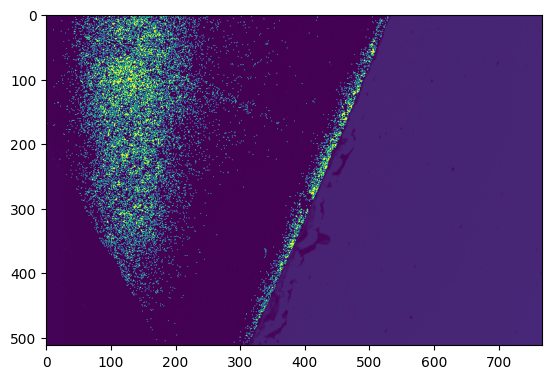

In [ ]:
plt.imshow(ims[manual_ignores[12]])

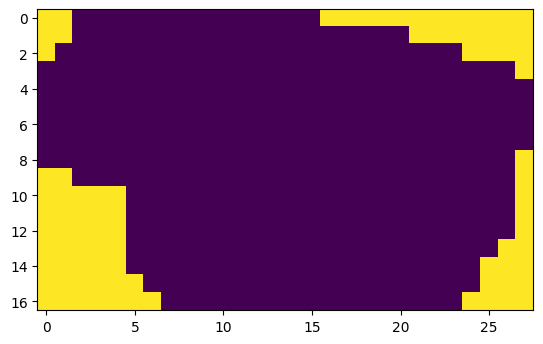

In [ ]:
plt.imshow(ignores_layout)

In [ ]:
geo_factor_brightness_tracker

array([[1.        , 1.        , 1.        , 1.05043103, 1.14444995,
        1.13282859, 1.11706068, 1.09908715, 1.08475644, 1.06800843,
        1.05472952, 1.04049889, 1.10328963, 1.11109482, 0.90709604,
        1.00087188, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.96427459, 1.23515186, 1.14702393, 1.14323931,
        1.12457677, 1.10901474, 1.09245673, 1.07631017, 1.06047508,
        1.04669513, 1.03538529, 1.02540982, 1.00199205, 0.99837947,
        1.09272282, 1.64959061, 1.02241959, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.17449152, 1.17136869, 1.15507051, 1.14018073,
        1.12065409, 1.10420912, 1.08801691, 1.07180898, 1.05631465,
        1.04218777, 1.0289348 , 1.01708743, 1.00498789, 0.99290861,
        0.97880227, 0.96669078, 0.95343735, 0.93749694, 1.03095611,
        1.37596206, 1.06491796, 1.        , 1.        ],
       [1.180

In [ ]:
plt.imshow(np.mean[ims_brightened[inboard_numbers], 0])

NameError: name 'plt' is not defined

In [ ]:
geo_factor_brightness_tracker*np.transpose(inboard_layout)*np.transpose(done_tracker_set[0])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.15227777, 0.75569198, 1.28684478,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.90909091, 1.26443687, 0.7130191 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.87131664, 1.        , 0.83622745, 1.43279417,
        0.59143105, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.15728789, 1.        , 1.20218906, 0.69819505,
        1.67069805, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.90909091, 1.        , 0.84862403, 1.44166209,
        0.62560405, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.90909091, 1.15558578, 0.

In [ ]:
np.array(done_tracker_set).shape

(161, 11, 19)

In [ ]:
checking_ims, checked_stit = make_synth_set(noise=0)

In [ ]:
looking_at_this = 3
print(checking_ims[looking_at_this]/ims[looking_at_this])

[[0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]
 [0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]
 [0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]
 ...
 [0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]
 [0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]
 [0.90909091 0.90909091 0.90909091 ... 0.90909091 0.90909091 0.90909091]]


In [ ]:
geo_factor_brightness_tracker_set.shape

NameError: name 'geo_factor_brightness_tracker_set' is not defined

In [ ]:
geo_factor_brightness_tracker_set[:, 1, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
get_brightness_factor(get_tile_point(12), get_tile_point(1))

1

In [ ]:
geo_factor_brightness_tracker_set[geo_factor_brightness_tracker_set>0]

array([1.06896836, 1.01054105, 0.97826339, ..., 1.0163952 , 1.014948  ,
       0.94306572])

In [ ]:
arith_factor_brightness_tracker = propagate_brightness_arith_factor(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)
offset_brightness_tracker = propagate_brightness_offset(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)

In [ ]:
arith_factor_brightness_tracker

In [ ]:
offset_brightness_tracker = propagate_brightness_offset(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 25)

In [ ]:
offset_brightness_tracker

In [ ]:
#iterative convergence checker
geo_tracker_set = []
geo_standard_deviation_list = []
ims = holy_ims.copy()
for k in range(10):
  geo_tracker_set.append(propagate_brightness_geo_factor(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 5))
  ims = ims_brightened

for i in range(len(geo_tracker_set)):
  geo_standard_deviation_list.append(np.std(geo_tracker_set[i]))
print(geo_standard_deviation_list)

Streaming output truncated to the last 5000 lines.
687 steps completed of  915  Current time: 11:16:58
688 steps completed of  915  Current time: 11:16:59
689 steps completed of  915  Current time: 11:16:59
690 steps completed of  915  Current time: 11:17:00
691 steps completed of  915  Current time: 11:17:01
692 steps completed of  915  Current time: 11:17:02
693 steps completed of  915  Current time: 11:17:03
694 steps completed of  915  Current time: 11:17:04
695 steps completed of  915  Current time: 11:17:04
696 steps completed of  915  Current time: 11:17:05
697 steps completed of  915  Current time: 11:17:06
698 steps completed of  915  Current time: 11:17:07
699 steps completed of  915  Current time: 11:17:08
700 steps completed of  915  Current time: 11:17:09
701 steps completed of  915  Current time: 11:17:10
702 steps completed of  915  Current time: 11:17:11
703 steps completed of  915  Current time: 11:17:12
704 steps completed of  915  Current time: 11:17:13
705 steps com

In [ ]:
total_tracker = np.prod(geo_tracker_set, 0)

In [ ]:
total_tracker

In [ ]:
#iterative convergence checker
arith_tracker_set = []
arith_standard_deviation_list = []
ims = holy_ims.copy()
for k in range(10):
  arith_tracker_set.append(propagate_brightness_arith_factor(acceptable_origins, acceptable_ignores, number_of_runs_to_average = 5))
  ims = ims_brightened

for i in range(len(arith_tracker_set)):
  arith_standard_deviation_list.append(np.std(arith_tracker_set[i]))
print(arith_standard_deviation_list)


Streaming output truncated to the last 5000 lines.
(377, 487) (391, 23)  Factor comparison has at least 1 no confidence brightness test
860 steps completed of  915  Current time: 10:38:26
Image number:  2  Comparison location: (377, 487)  Size:  376  x  23  Has 0 confidence
(377, 487) (391, 23)  Factor comparison has at least 1 no confidence brightness test
Image number:  2  Comparison location: (729, 256)  Size:  37  x  255  Has 0 confidence
(37, 256) (729, 256)  Factor comparison has at least 1 no confidence brightness test
861 steps completed of  915  Current time: 10:38:27
Image number:  2  Comparison location: (377, 487)  Size:  376  x  23  Has 0 confidence
(377, 487) (391, 23)  Factor comparison has at least 1 no confidence brightness test
Image number:  2  Comparison location: (729, 256)  Size:  37  x  255  Has 0 confidence
(37, 256) (729, 256)  Factor comparison has at least 1 no confidence brightness test
862 steps completed of  915  Current time: 10:38:28
Image number:  2  Co

In [ ]:
total_tracker = np.prod(geo_tracker_set, 0)

In [ ]:
total_tracker

In [ ]:
total_tracker = np.prod(arith_tracker_set, 0)

In [ ]:
total_tracker

array([[1.        , 1.        , 0.3152591 , 1.04121698, 1.04727222,
        1.05230517, 1.05149641, 1.05227829, 1.02827615, 1.07139073,
        1.43147905, 1.29298759, 2.06603308, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.13065362, 1.04415722, 1.04469057,
        1.04634188, 1.048544  , 1.04694888, 1.04178517, 1.03785609,
        1.02466448, 1.02130068, 1.04455568, 1.70790418, 1.15338597,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [1.20711604, 0.99921183, 1.0386869 , 1.03801416, 1.03910102,
        1.04156723, 1.04301862, 1.0434346 , 1.03866947, 1.03069116,
        1.02522393, 1.02071736, 1.01582248, 1.01316668, 1.00286256,
        2.70167317, 1.        , 1.        , 1.        , 1.        ,
        1.        ],
       [7.67005044, 1.03589895, 1.03569601, 1.03217564, 1.03316315,
        1.03411775, 1.0315071 , 1.03254624, 1.0313747

In [ ]:
geo_tracker_set

In [ ]:
arith_tracker_set

[array([[1.        , 1.        , 0.92282261, 1.02018047, 1.02901718,
         1.0283144 , 1.02220688, 1.01966311, 1.00597924, 1.0197856 ,
         1.03496338, 1.0265121 , 1.13191297, 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.01119334, 1.03271325, 1.02945605,
         1.02541783, 1.02206998, 1.01724664, 1.01441693, 1.01413443,
         1.00266328, 1.00319741, 1.01684126, 1.06054181, 1.03434677,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.01774436, 0.99444315, 1.03079089, 1.03207995, 1.02793149,
         1.02439202, 1.02025801, 1.01594993, 1.01370294, 1.01093153,
         1.00690129, 1.00309817, 1.00025418, 0.99965132, 1.00444369,
         1.15725658, 1.        , 1.        , 1.        , 1.        ,
         1.        ],
        [1.28130683, 1.03451107, 1.0356267 , 1.03163985, 1.02858418,
         1.02465307, 1.01985869, 1.01

In [ ]:
def verify_factor_brightnesses(brightness_tracker):
  brightness_tracker = np.transpose(brightness_tracker)
  for i in inboard_tile_numbers:
    ims_factors = []
    ims_factors.append(1/(get_brightness_factor(get_tile_point(i), get_tile_point(i-1))))
    ims_factors.append(1/(get_brightness_factor(get_tile_point(i), get_tile_point(i+1))))
    ims_factors.append(1/(get_brightness_factor(get_tile_point(i), get_tile_point(i-horizontal_number))))
    ims_factors.append(1/(get_brightness_factor(get_tile_point(i), get_tile_point(i+horizontal_number))))
    tracker_factors = []
    tracker_factors.append(brightness_tracker[get_tile_point(i)]/ brightness_tracker[get_tile_point(i-1)])
    tracker_factors.append(brightness_tracker[get_tile_point(i)]/ brightness_tracker[get_tile_point(i+11)])
    tracker_factors.append(brightness_tracker[get_tile_point(i)]/ brightness_tracker[get_tile_point(i-horizontal_number)])
    tracker_factors.append(brightness_tracker[get_tile_point(i)]/ brightness_tracker[get_tile_point(i+horizontal_number)])
    print(np.mean(ims_factors)-np.mean(tracker_factors))




In [ ]:
for i in range(len(tracker_set)):
  standard_deviation_list.append(np.std(tracker_set[i]))
print(standard_deviation_list)

[0.018205076954065643, 0.04819752676210581, 0.08482663912461906, 0.12327668971757826, 0.16276733472376329]


In [ ]:
np.mean(abs((tracker_set[0]**5)-tracker_set[4]))

0.10425703507973644

In [ ]:
get_brightness_factor(get_tile_point(15), get_tile_point(14))

(1.6068808735800324, 185.03242959005863)

In [ ]:
offset_brightness_tracker

array([[-0.02247553,  0.03499372,  0.07711404,  0.05924695,  0.0370277 ,
         0.00097262,  0.01164935,         nan,         nan,         nan,
                nan],
       [-0.0348341 ,  0.08037408,  0.07878862,  0.0640674 ,  0.05011515,
         0.03566052,  0.00189736,         nan,         nan,         nan,
                nan],
       [ 0.00825896,  0.08830489,  0.07412546,  0.06162268,  0.04537625,
         0.03254698,  0.00010474,  0.00205273,         nan,         nan,
                nan],
       [ 0.07395002,  0.08343102,  0.07081736,  0.05635407,  0.04013596,
         0.02614807,  0.01392574, -0.00664454,         nan,         nan,
                nan],
       [ 0.06803326,  0.07758157,  0.06498095,  0.05157069,  0.03730654,
         0.02090205,  0.01025436, -0.00042796,         nan,         nan,
                nan],
       [ 0.0251293 ,  0.07129131,  0.05746735,  0.04611701,  0.03239942,
         0.01669187,  0.00529948, -0.00585868, -0.00323145,         nan,
              

In [ ]:
inboard_layout

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
get_origins(inboard_layout)

NameError: name 'inboard_layout' is not defined

In [ ]:
!pwd()

/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
edge_layout+black_layout - inboard_layout

array([[ 1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
        -1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        -1., -1., -1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
         1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
        -1.,  1., -1.,  1.,  1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
         1.,  1.,  1., -1.,  1.,  1.],
       [ 1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
         1., -1., -1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
         1., -1.,  1., -1., -1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
         1.,  1.,  1.,  1.,  1.

In [ ]:
ims_brightened = ims.copy()

In [ ]:
type(ims[0].shape[1])

int

In [ ]:
#for i in range(300):
  #  print(ims[i].shape)

In [ ]:
def stitch(tileset, save_name, tuning_guides = 0):

    #Takes a set of tiles, a name for the saved file, optional guidelines and tile numbers for help during tuning, and optional automatic image opening for help during tuning
    #Returns a single stitched uint16 image


    global tile_height
    global tile_width
    global smallest_horizontal_offset
    global smallest_vertical_offset
    global horizontal_dont_wrap
    global vertical_dont_wrap

    tile_height = ims[0].shape[0]
    tile_width = ims[0].shape[1]
    smallest_horizontal_offset = np.min((np.min(horizontal_rowwise_tuning), np.min(horizontal_columnwise_tuning)))
    smallest_vertical_offset = np.min((np.min(vertical_rowwise_tuning), np.min(vertical_columnwise_tuning)))
    horizontal_dont_wrap = np.max(horizontal_rowwise_tuning) + np.max(horizontal_columnwise_tuning)
    vertical_dont_wrap = np.max(vertical_rowwise_tuning) + np.max(vertical_columnwise_tuning)
    total_width = (horizontal_number*ims[0].shape[1]) -(horizontal_number - 1)*horizontal_overlap + np.max((np.max(horizontal_rowwise_tuning), np.max(horizontal_columnwise_tuning)))-smallest_horizontal_offset+200
    total_height = (vertical_number*ims[0].shape[0]) -(vertical_number - 1)*vertical_overlap + np.max((np.max(vertical_rowwise_tuning), np.max(vertical_columnwise_tuning))) + 200

    if tuning_guides == 1:

        #Marks the outside edge of each tile and places labels in their centres with arrows telling you which number tuning value
        #corresponds to which overlapping region, helpful for avoiding losing count or confusing rows and columns
        #Supports up to 2 digit numbers for maximum 99x99 tile images

        tile_centre = [int(ims[0].shape[0]/2),int(ims[0].shape[1]/2)]
        for i in range(len(ims)):
            ims[i][::,0] = 1
            ims[i][0,::] = 1
            ims[i][::,(ims[0].shape[1]-1)] = 1
            ims[i][(ims[0].shape[0]-1),::] = 1
            tile_horizontal_position = get_tile_x(i)
            tile_vertical_position = get_tile_y(i)
            ims[i][tile_centre[0]-font_size:tile_centre[0], tile_centre[1]-font_size:tile_centre[1]] = number_labels_scaled[11]
            ims[i][tile_centre[0]:tile_centre[0]+font_size, tile_centre[1]-font_size:tile_centre[1]] = number_labels_scaled[10]
            ims[i][tile_centre[0]-font_size:tile_centre[0], tile_centre[1]:tile_centre[1]+font_size] = number_labels_scaled[np.floor_divide(tile_vertical_position+1, 10)]
            ims[i][tile_centre[0]:tile_centre[0]+font_size, tile_centre[1]:tile_centre[1]+font_size] = number_labels_scaled[np.floor_divide(tile_horizontal_position+1, 10)]
            ims[i][tile_centre[0]-font_size:tile_centre[0], tile_centre[1]+font_size:tile_centre[1]+2*font_size] = number_labels_scaled[np.mod(tile_vertical_position+1, 10)]
            ims[i][tile_centre[0]:tile_centre[0]+font_size, tile_centre[1]+font_size:tile_centre[1]+2*font_size] = number_labels_scaled[np.mod(tile_horizontal_position+1, 10)]

    global pixel_overwrite_counter #Likely helpful for debugging

    stitched = np.zeros((total_height, total_width)) #Initialise output image
    pixel_overwrite_counter = np.zeros((total_height, total_width)) #Array which counts how many times a pixel in the stitched image has been written to, facilitates correct taking of average brightness in regions with more than 2 tiles
    tile_origins = get_tile_origins() #List of positions of top left-hand corners of tiles, taking into account tuning, overlap, etc

    tiles = tileset.reshape(horizontal_number*vertical_number, tile_height, ims[0].shape[1]) #Reshape necessary for generality between raw imported ims and the layout shaped ims format

    for i in range(len(tile_origins)):

        #For each tile
            #Take slice of stitched image representing where the new tile will be placed
            #Take slice of same location of pixel overwrite counter
            #Brightness we want for each individual pixel is sum of all writes divided by number of all writes
            #Since we don't know in advance how many writes a pixel will get, we track how many there have been
            #Sum of all previous writes is the mean of all previous writes (which is just the pixel value before
            #the operation) multiplied by the number of previous writes
            #Add the new tile, then divide the whole thing by the new total number of writes
        #Doing this with slices represents a factor ~100 improvement to runtime over pixel by pixel approach

        y_slice = slice(tile_origins[i,0],tile_origins[i,0]+tile_height) #These two combined define the tile's
        x_slice = slice(tile_origins[i,1],tile_origins[i,1]+tile_width)  #location in whole image arrays
        stitched_slice = stitched[y_slice, x_slice]
        overwrite_counter_slice = pixel_overwrite_counter[y_slice, x_slice]
        weighted_sum = (stitched_slice*overwrite_counter_slice)+tiles[i]
        pixel_overwrite_counter[y_slice, x_slice] +=1
        stitched[y_slice, x_slice] = weighted_sum/overwrite_counter_slice

    #Save the stitched image
    stitched[stitched<0] = 0
    stitched = stitched*65535
    to_save = stitched.astype(np.uint16)
    stitched = 0
    to_save = to_save.astype(np.uint16)
    to_save = Image.fromarray(to_save)
    name = save_name
    to_save.save(name)
    to_save = 0





In [ ]:
def do_all_brightnesses(these_crystals):

    for i in these_crystals:
        init_crystal(i)
        savename = str('John'+str(i)+'_geo.png')
        tileset = apply_factor_brightness(geo_factor_brightness_tracker)
        stitch(tileset, savename)
        print(savename)
        tileset = 0
        savename = str('John'+str(i)+'_arith.png')
        tileset = apply_factor_brightness(arith_factor_brightness_tracker)
        stitch(tileset, savename)
        print(savename)
        tileset = 0
        savename = str('John'+str(i)+'_offset.png')
        tileset = apply_offset_brightness(offset_brightness_tracker)
        stitch(tileset, savename)
        print(savename)







In [ ]:
def do_raw_stitches():
    for k in range(9):
        i = k+1
        init_crystal(i)
        raw_tiles_path = "C:/Users/rwfbl/Tilesets/John"+str(i)+"/Downscaled/*.png"
        tileset = np.array([plt.imread(path) for path in glob.glob(raw_tiles_path)])
        savename = str('John'+str(i)+'_raw.png')
        stitch(tileset, savename)
        print(savename)

In [ ]:
inst_vertical_rowwise_tuning[0:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
guidelines = 0
horizontal_size = ims[0].shape[1]
vertical_size = ims[0].shape[0]
starting_row = 0
smallest_horizontal_offset = np.min((np.min(horizontal_rowwise_tuning), np.min(horizontal_columnwise_tuning)))
smallest_vertical_offset = np.min((np.min(vertical_rowwise_tuning), np.min(vertical_columnwise_tuning)))
horizontal_dont_wrap = np.max(horizontal_rowwise_tuning) + np.max(horizontal_columnwise_tuning)
vertical_dont_wrap = np.max(vertical_rowwise_tuning) + np.max(vertical_columnwise_tuning)
total_width = (horizontal_number*ims[0].shape[1]) -(horizontal_number - 1)*horizontal_overlap + np.max((np.max(horizontal_rowwise_tuning), np.max(horizontal_columnwise_tuning)))-smallest_horizontal_offset+1000
total_height = (vertical_number*ims[0].shape[0]) -(vertical_number - 1)*vertical_overlap + np.max((np.max(vertical_rowwise_tuning), np.max(vertical_columnwise_tuning))) + 1000

NameError: name 'ims' is not defined

In [ ]:
#New, better stitcher merged over from jupyter version

stitched = np.zeros((total_height, total_width))
pixel_overwrite_counter = np.zeros((total_height, total_width))
tile_origins = get_tile_origins()
#tiles = geo_mean_ims.reshape(209, 512, 768)
#tiles = arith_mean_ims.reshape(209, 512, 768)
tiles = ims
for i in range(len(tile_origins)):
#for i in range(1):

    stitched_slice = stitched[tile_origins[i,0]:tile_origins[i,0]+512, tile_origins[i,1]:tile_origins[i,1]+768]
    #print(stitched_slice.shape)
    overwrite_counter_slice = pixel_overwrite_counter[tile_origins[i,0]:tile_origins[i,0]+512, tile_origins[i,1]:tile_origins[i,1]+768]
    #print(overwrite_counter_slice.shape)
    weighted_sum = (stitched_slice*overwrite_counter_slice)+tiles[i]
    #print(weighted_sum.shape)
    pixel_overwrite_counter[tile_origins[i,0]:tile_origins[i,0]+512, tile_origins[i,1]:tile_origins[i,1]+768] +=1
    stitched[tile_origins[i,0]:tile_origins[i,0]+512, tile_origins[i,1]:tile_origins[i,1]+768] = weighted_sum/overwrite_counter_slice
    #print(i)


stitched_boosted = stitched*65535
to_save = stitched_boosted.astype(np.uint16)
to_save = to_save.astype(np.uint16)
#plt.imshow(stitched)
to_save = Image.fromarray(to_save)
name = 'multiple_geo_runs.png'
to_save.save(name)
os.system("start "+name)

32512

In [ ]:
def make_synth_set(noise = 0):
  tile_origins = get_tile_origins()
  synth_tileset = np.zeros(ims.shape)
  baseline = np.linspace(np.linspace(10,0,total_width),np.linspace(0,20,total_width),total_height)
  synth_stitched = (np.sin(baseline)/4)+0.75
  for i in range(len(ims)):
    synth_tileset[i] = synth_stitched[tile_origins[i,0]:tile_origins[i,0]+512, tile_origins[i,1]:tile_origins[i,1]+768] + np.random.normal(0, noise, (512,768))
  return synth_tileset, synth_stitched
  plt.imshow(synth_stitched)

In [ ]:
synth_tiles, synth_stit = make_synth_set()

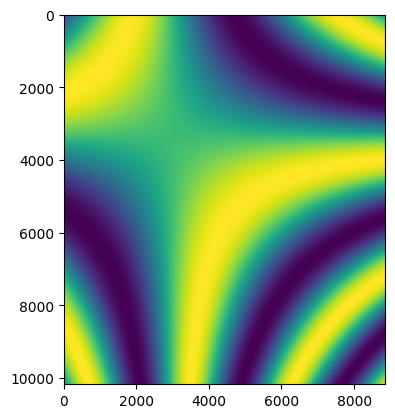

In [ ]:
plt.imshow(synth_stit)

In [ ]:
np.max(synth_stit)

0.9999999999999911

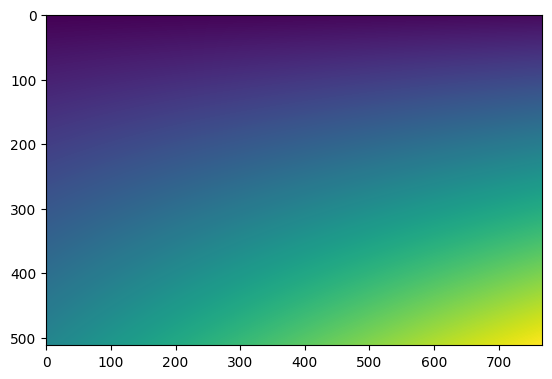

In [ ]:
plt.imshow(synth_tiles[82])

In [ ]:
def get_tile_origins():
    origins_list = []
    for k in range(horizontal_number*(vertical_number-starting_row)): #index switching here is to cope with non-zero starting row
        i = (horizontal_number*starting_row)+k
        tile_horizontal_position = get_tile_x(i)
        tile_vertical_position = get_tile_y(i)
        #print(tile_vertical_position, tile_horizontal_position)
        target_pixel_horizontal_position = (((tile_horizontal_position*(horizontal_size-horizontal_overlap))) - horizontal_rowwise_tuning[tile_vertical_position]) - horizontal_columnwise_tuning[tile_horizontal_position] - smallest_horizontal_offset+horizontal_dont_wrap
        target_pixel_vertical_position = (tile_vertical_position*(vertical_size-vertical_overlap)) - vertical_rowwise_tuning[tile_vertical_position] - vertical_columnwise_tuning[tile_horizontal_position] - smallest_vertical_offset+vertical_dont_wrap
        #print("(",target_pixel_vertical_position,",", target_pixel_horizontal_position, "),")
        origins_list.append((target_pixel_vertical_position,target_pixel_horizontal_position))
    return np.array(origins_list)

In [ ]:
get_tile_origins()

NameError: name 'get_tile_origins' is not defined

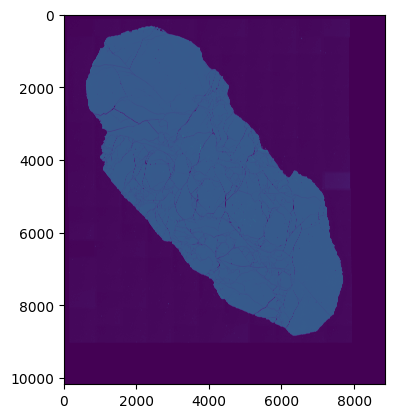

In [ ]:
stitched_boosted = stitched*65535
to_save = stitched_boosted.astype(np.uint16)
plt.imshow(stitched)
to_save = Image.fromarray(to_save)
to_save.save('edge_sep_plain.tif')
files.download('edge_sep_plain.tif')

In [ ]:
np.ceil(1)

1.0

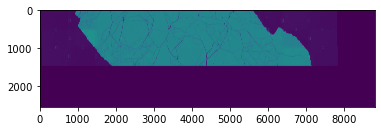

In [ ]:
plt.imshow(stitched_boosted)

In [ ]:
np.min(stitched_boosted)

0.0

In [ ]:
full_set

0          0.292536
1          0.382247
2          0.422059
3          0.437021
4          0.452318
             ...   
7441744    0.262236
7441745    0.364000
7441746    0.427220
7441747    0.434818
7441748    0.407054
Length: 7441749, dtype: float64

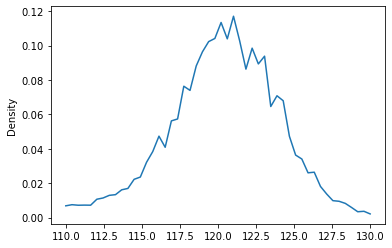

In [ ]:
are_you_sure = 1
if are_you_sure == 1:
    full_set = pd.Series((stitched.flatten()[stitched.flatten()>(50/256)])*256)

evaluate_at = np.linspace(110, 130, 50)
ax = full_set.plot.kde(bw_method = 0.0001, ind=evaluate_at)

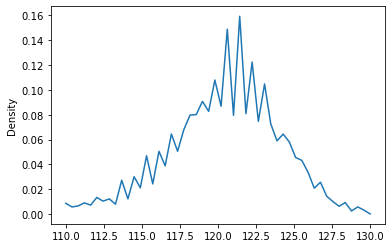

In [ ]:
are_you_sure = 1
if are_you_sure == 1:
    full_set = pd.Series((ims_brightened_overall[1,4].flatten()[ims_brightened_overall[1,4].flatten()>(50/256)])*256)
evaluate_at = np.linspace(110, 130, 50)
ax = full_set.plot.kde(bw_method = 0.00015, ind=evaluate_at)

In [ ]:
lower_threshold = 115*256
upper_threshold = 128*256
testing_thresholding = stitched_boosted.copy()
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
testing_thresholding = (testing_thresholding -(lower_threshold))*(256*256/(upper_threshold-lower_threshold))
testing_thresholding_image = testing_thresholding.astype(np.uint16)
testing_thresholding_image = Image.fromarray(testing_thresholding_image)
testing_thresholding_image.save('edge_sep_thresholded.tif')
files.download('edge_sep_thresholded.tif')

In [ ]:
plt.imshow(testing_thresholding)

NameError: name 'plt' is not defined

In [ ]:
get_tile_point(17)

(6, 1)

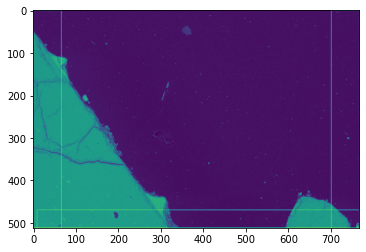

In [ ]:
plt.imshow(ims_brightened[8])

In [ ]:
np.min(testing_thresholding-lower_threshold)

0.0

In [ ]:
testing_thresholding

array([[25600., 25600., 25600., ..., 25600., 25600., 25600.],
       [25600., 25600., 25600., ..., 25600., 25600., 25600.],
       [25600., 25600., 25600., ..., 25600., 25600., 25600.],
       ...,
       [25600., 25600., 25600., ..., 25600., 25600., 25600.],
       [25600., 25600., 25600., ..., 25600., 25600., 25600.],
       [25600., 25600., 25600., ..., 25600., 25600., 25600.]])

In [ ]:
print(overall_brightness_tracker)